# This is the notebook to submit and view

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as m
import seaborn as sns
import os
import vaderSentiment.vaderSentiment as vaderSentiment
import datetime
import sklearn

In [87]:
print(m.__version__)
# checking the version

3.6.3


# Stock Market

In [88]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
pwd = os.getcwd()
filepath_aapl = os.path.join(pwd, 'AAPL.csv')
print(filepath_aapl)
filepath_amzn = os.path.join(pwd, 'AMZN.csv')
print(filepath_amzn)
filepath_goog = os.path.join(pwd, 'GOOG.csv')
print(filepath_goog)
filepath_googl = os.path.join(pwd, 'GOOGL.csv')
print(filepath_googl)
filepath_tsla = os.path.join(pwd, 'TSLA.csv')
print(filepath_tsla)
aapl = pd.read_csv(filepath_aapl, index_col='Date')
amzn = pd.read_csv(filepath_amzn, index_col='Date')
goog = pd.read_csv(filepath_goog, index_col='Date')
googl = pd.read_csv(filepath_googl, index_col='Date')
tsla = pd.read_csv(filepath_tsla, index_col='Date')

c:\Users\harsh\OneDrive\Desktop\Using Tweets to predict Stock Movement\AAPL.csv
c:\Users\harsh\OneDrive\Desktop\Using Tweets to predict Stock Movement\AMZN.csv
c:\Users\harsh\OneDrive\Desktop\Using Tweets to predict Stock Movement\GOOG.csv
c:\Users\harsh\OneDrive\Desktop\Using Tweets to predict Stock Movement\GOOGL.csv
c:\Users\harsh\OneDrive\Desktop\Using Tweets to predict Stock Movement\TSLA.csv


### Feature Engineering

In [89]:
aapl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1510 entries, 2015-01-02 to 2020-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1510 non-null   float64
 1   High       1510 non-null   float64
 2   Low        1510 non-null   float64
 3   Close      1510 non-null   float64
 4   Adj Close  1510 non-null   float64
 5   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.6+ KB


<AxesSubplot: >

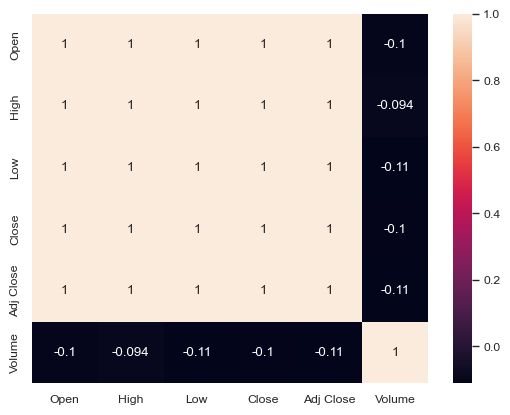

In [90]:
sns.heatmap(aapl.corr(), annot=True)

<AxesSubplot: >

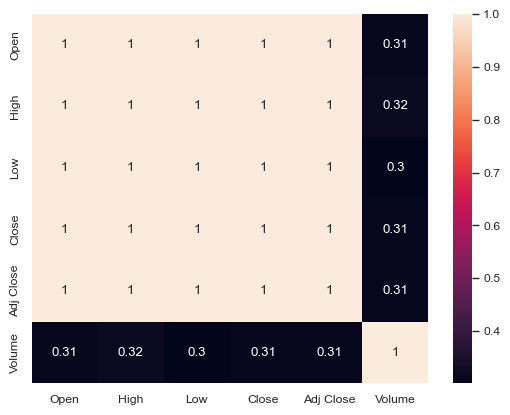

In [91]:
sns.heatmap(tsla.corr(), annot=True)

<AxesSubplot: >

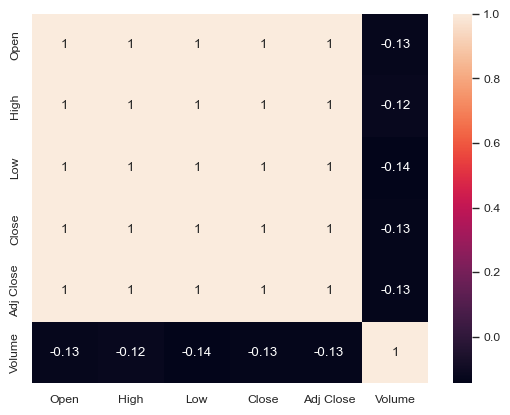

In [92]:
sns.heatmap(goog.corr(), annot=True)

<AxesSubplot: >

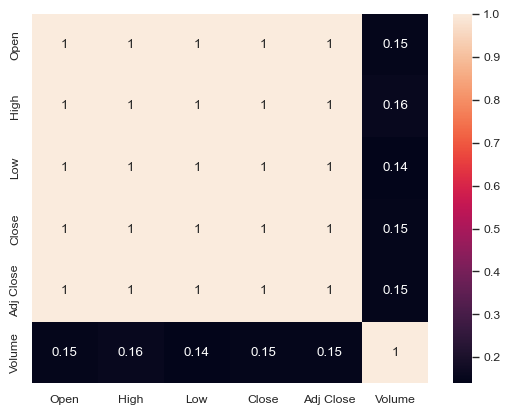

In [93]:
sns.heatmap(amzn.corr(), annot=True)

<AxesSubplot: >

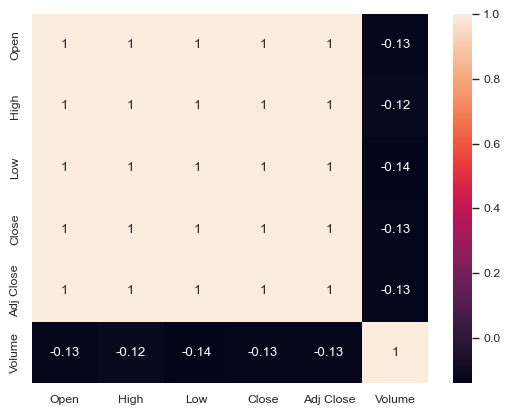

In [94]:
sns.heatmap(googl.corr(), annot=True)

In [95]:
# aapl.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
# amzn.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
# goog.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
# googl.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
# tsla.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)

# aapl.drop(columns=['Close', 'Volume'], axis=1, inplace=True)
# amzn.drop(columns=['Close', 'Volume'], axis=1, inplace=True)
# goog.drop(columns=['Close', 'Volume'], axis=1, inplace=True)
# googl.drop(columns=['Close', 'Volume'], axis=1, inplace=True)
# tsla.drop(columns=['Close', 'Volume'], axis=1, inplace=True)

In [96]:
aapl.head()

Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.746000  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  24.048864  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  24.051125  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.388378  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  25.325432  237458000

In [97]:
def changeMaker(data):
    x = []
    data["prevClose"] = data['Adj Close'].shift(1)
    data['change'] = data[['prevClose','Adj Close']].pct_change(axis=1)['Adj Close'] 
    return data

def upDown(data):
    x = []
    for i in data:
        if i > 0:
            x.append("Positive")
        elif i < 0:
            x.append("Negative")
        else:
            x.append("Negative")
    return x


aapl= changeMaker(aapl)
aapl['upDown'] = upDown(aapl['change'])
amzn= changeMaker(amzn)
amzn['upDown'] = upDown(amzn['change'])
goog= changeMaker(goog)
goog['upDown'] = upDown(goog['change'])
googl= changeMaker(googl)
googl['upDown'] = upDown(googl['change'])
tsla= changeMaker(tsla)
tsla['upDown'] = upDown(tsla['change'])

In [98]:
aapl.head()

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.746000  212818400   
2015-01-05  27.072500  27.162500  26.352501  26.562500  24.048864  257142000   
2015-01-06  26.635000  26.857500  26.157499  26.565001  24.051125  263188400   
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.388378  160423600   
2015-01-08  27.307501  28.037500  27.174999  27.972500  25.325432  237458000   

            prevClose    change    upDown  
Date                                       
2015-01-02        NaN       NaN  Negative  
2015-01-05  24.746000 -0.028172  Negative  
2015-01-06  24.048864  0.000094  Positive  
2015-01-07  24.051125  0.014022  Positive  
2015-01-08  24.388378  0.038422  Positive

In [99]:
tsla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1509 entries, 2015-01-05 to 2020-12-30
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1509 non-null   float64
 1   High       1509 non-null   float64
 2   Low        1509 non-null   float64
 3   Close      1509 non-null   float64
 4   Adj Close  1509 non-null   float64
 5   Volume     1509 non-null   int64  
 6   prevClose  1508 non-null   float64
 7   change     1508 non-null   float64
 8   upDown     1509 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 117.9+ KB


Plotting the Adj Close price over time 

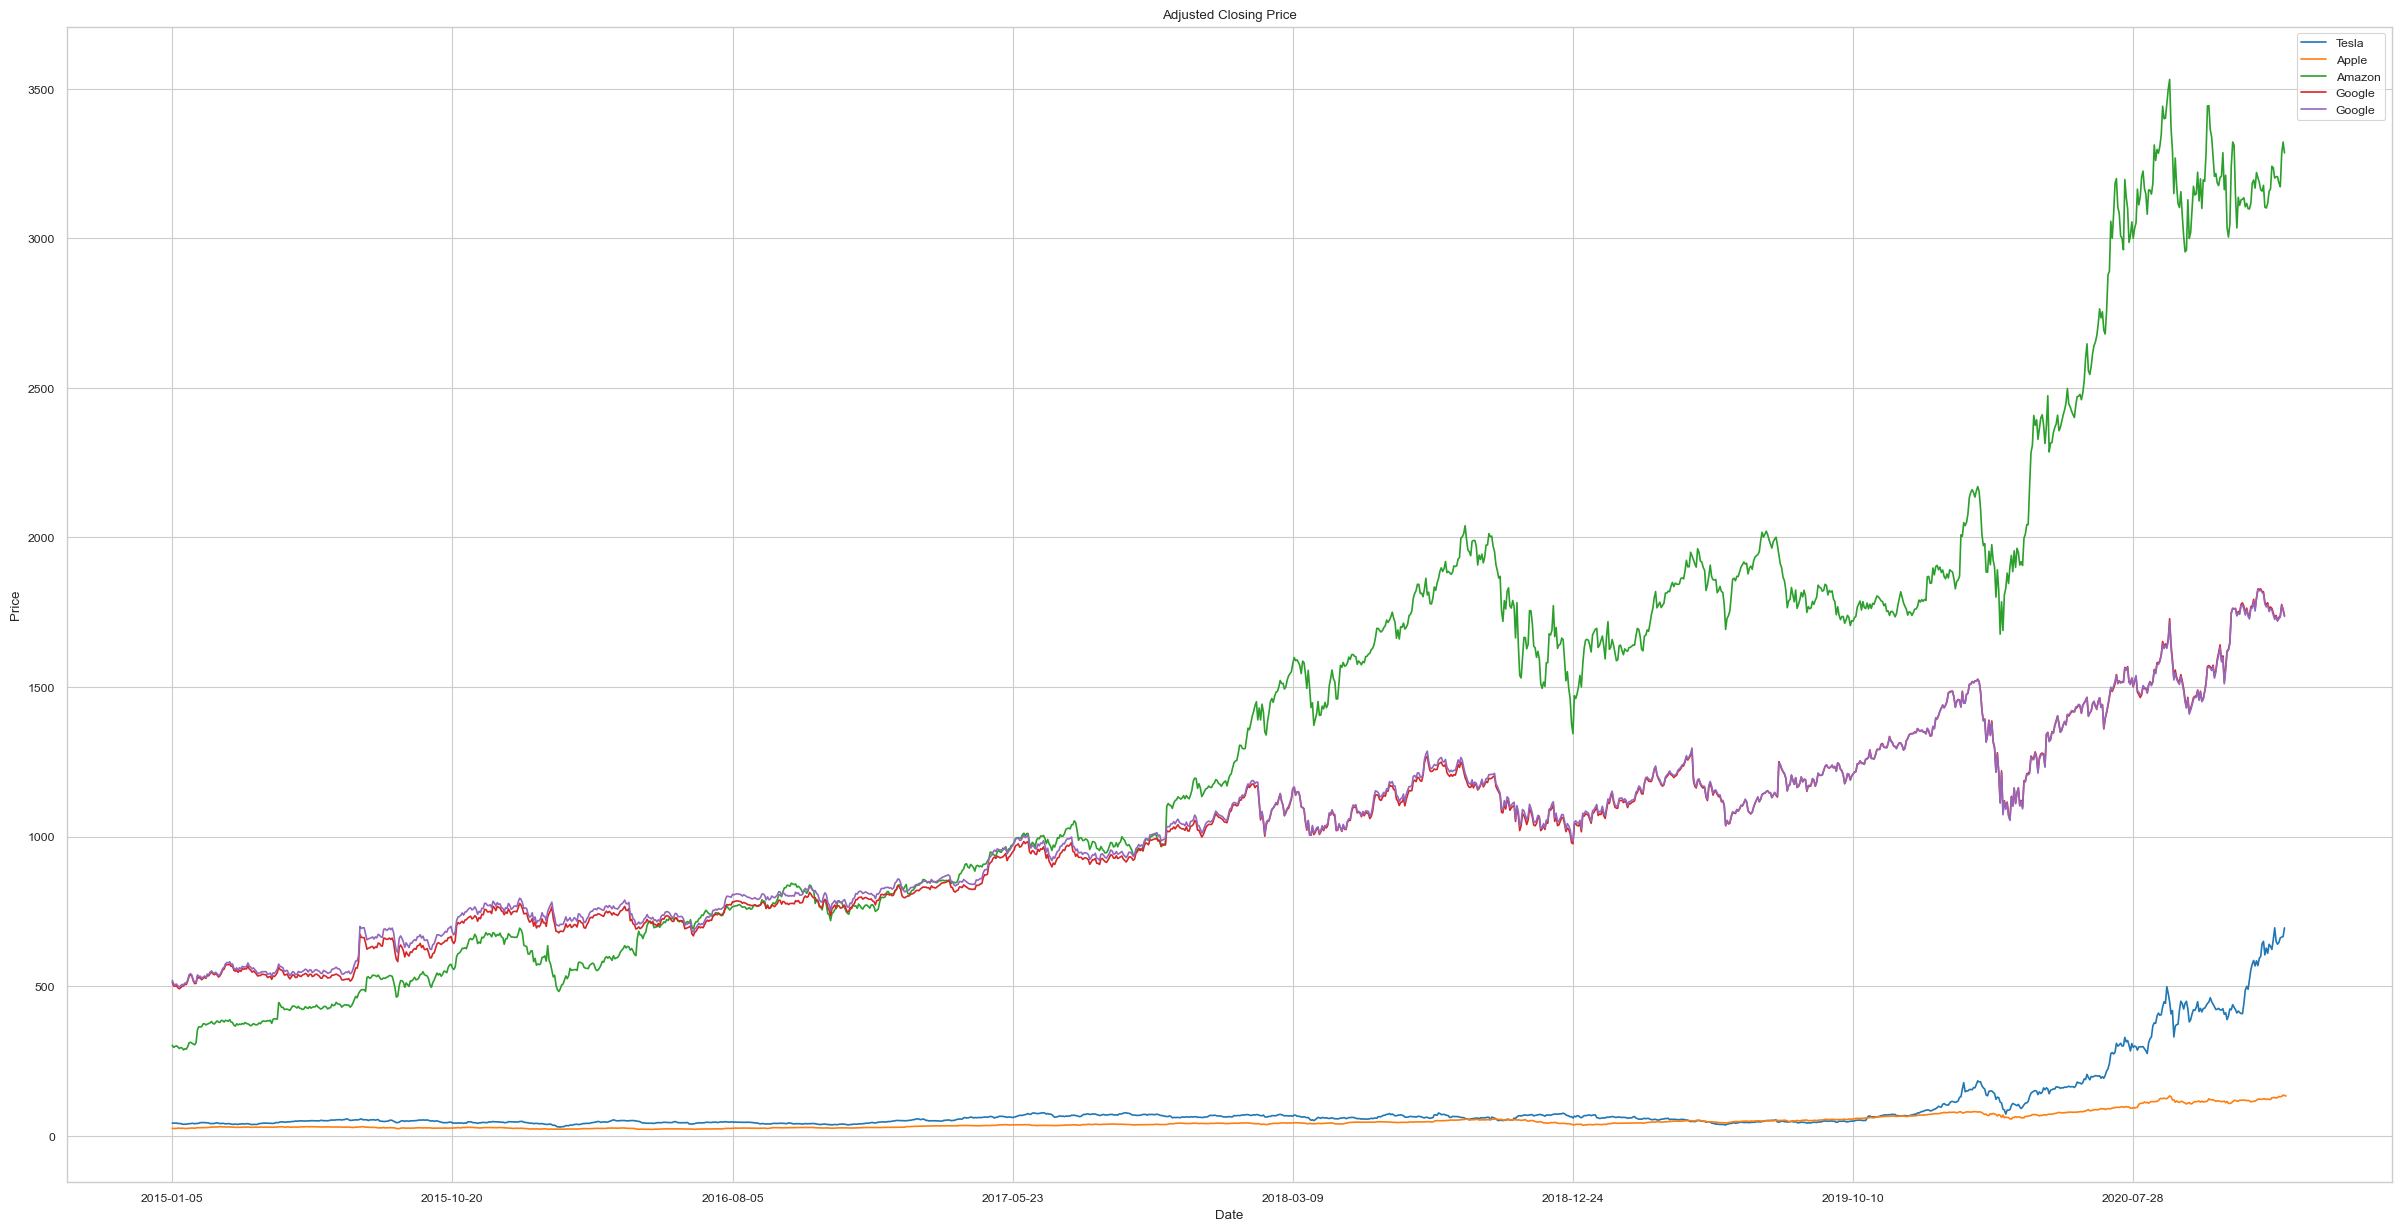

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline
tsla['Adj Close'].plot(label='Tesla',figsize=(30,15), title='Adjusted Closing Price')
aapl['Adj Close'].plot(label='Apple')
amzn['Adj Close'].plot(label='Amazon')
goog['Adj Close'].plot(label='Google')
googl['Adj Close'].plot(label='Google')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

#### Resetting Index and Changing the data type of the date feature

In [101]:
def resetIndex_and_changeDateType(df):
    temp = df.copy()
    temp.reset_index(inplace=True)
    temp['Date'] = pd.to_datetime(temp['Date'])
    return temp


In [102]:
aapl = resetIndex_and_changeDateType(aapl)
tsla = resetIndex_and_changeDateType(tsla)
amzn = resetIndex_and_changeDateType(amzn)
goog = resetIndex_and_changeDateType(goog)
googl = resetIndex_and_changeDateType(googl)


In [103]:
aapl.head()

Date       Open       High        Low      Close  Adj Close  \
0 2015-01-02  27.847500  27.860001  26.837500  27.332500  24.746000   
1 2015-01-05  27.072500  27.162500  26.352501  26.562500  24.048864   
2 2015-01-06  26.635000  26.857500  26.157499  26.565001  24.051125   
3 2015-01-07  26.799999  27.049999  26.674999  26.937500  24.388378   
4 2015-01-08  27.307501  28.037500  27.174999  27.972500  25.325432   

      Volume  prevClose    change    upDown  
0  212818400        NaN       NaN  Negative  
1  257142000  24.746000 -0.028172  Negative  
2  263188400  24.048864  0.000094  Positive  
3  160423600  24.051125  0.014022  Positive  
4  237458000  24.388378  0.038422  Positive

Making countplots for UpDown feature

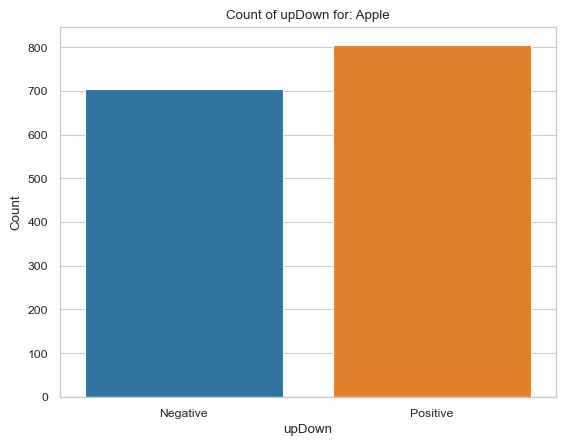

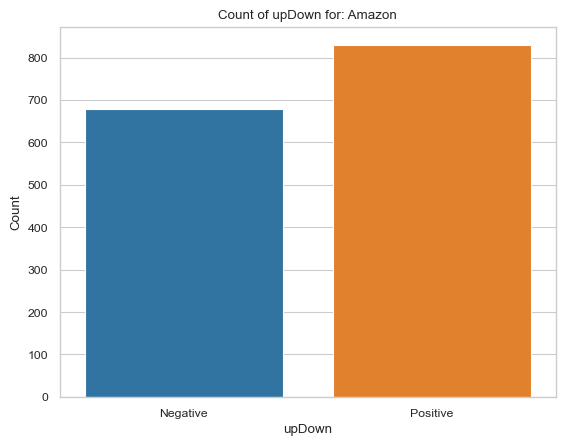

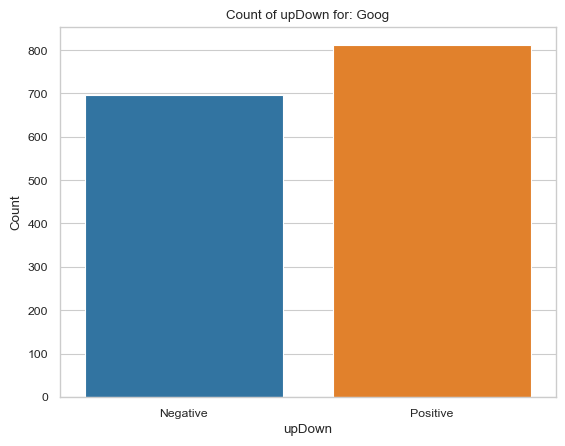

In [104]:
def countplot_for_upDown(df, name):
    sns.set_style('whitegrid')
    sns.set_context('paper')
    sns.countplot(x='upDown', data=df)
    plt.ylabel('Count')
    plt.title('Count of upDown for: ' + name)
    plt.show()
    
countplot_for_upDown(aapl, 'Apple')
countplot_for_upDown(tsla, 'Tesla')
countplot_for_upDown(amzn, 'Amazon')
countplot_for_upDown(goog, 'Goog')
countplot_for_upDown(googl, 'Googl')


## Machine Learning 

## Data prep

In [105]:
basic_features = ['Adj Close']
complex_features = ['Adj Close', 'Open', 'High', 'Low']

In [106]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

def preprocess_inputs(df, scaler, wanted_features):
    df = df.copy()

    # Split df into X and y
    y = df['upDown'].copy()
    X = df.drop(columns=['upDown', 'Date'], axis=1).copy()
    
    # Scale and make my dataset
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    X = X[wanted_features]
    return X, y
    

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Basic Features
X_applb, y_applb = preprocess_inputs(aapl, MinMaxScaler(), basic_features)
X_tslab, y_tslab = preprocess_inputs(tsla, MinMaxScaler(), basic_features)
X_amznb, y_amznb = preprocess_inputs(amzn, MinMaxScaler(), basic_features)
X_googb, y_googb = preprocess_inputs(goog, MinMaxScaler(), basic_features)
X_googlb, y_googlb = preprocess_inputs(googl, MinMaxScaler(), basic_features)

# Complex Features
X_appl, y_appl = preprocess_inputs(aapl, MinMaxScaler(), complex_features)
X_tsla, y_tsla = preprocess_inputs(tsla, MinMaxScaler(), complex_features)
X_amzn, y_amzn = preprocess_inputs(amzn, MinMaxScaler(), complex_features)
X_goog, y_goog = preprocess_inputs(goog, MinMaxScaler(), complex_features)
X_googl, y_googl = preprocess_inputs(googl, MinMaxScaler(), complex_features)

#Different feature range

# # Basic Features
# X_applb, y_applb = preprocess_inputs(aapl, MinMaxScaler(feature_range=(0,2)), basic_features)
# X_tslab, y_tslab = preprocess_inputs(tsla, MinMaxScaler(feature_range=(0,2)), basic_features)
# X_amznb, y_amznb = preprocess_inputs(amzn, MinMaxScaler(feature_range=(0,2)), basic_features)
# X_googb, y_googb = preprocess_inputs(goog, MinMaxScaler(feature_range=(0,2)), basic_features)
# X_googlb, y_googlb = preprocess_inputs(googl, MinMaxScaler(feature_range=(0,2)), basic_features)

# # Complex Features
# X_appl, y_appl = preprocess_inputs(aapl, MinMaxScaler(feature_range=(0,2)), complex_features)
# X_tsla, y_tsla = preprocess_inputs(tsla, MinMaxScaler(feature_range=(0,2)), complex_features)
# X_amzn, y_amzn = preprocess_inputs(amzn, MinMaxScaler(feature_range=(0,2)), complex_features)
# X_goog, y_goog = preprocess_inputs(goog, MinMaxScaler(feature_range=(0,2)), complex_features)
# X_googl, y_googl = preprocess_inputs(googl, MinMaxScaler(feature_range=(0,2)), complex_features)

#Different Scaler   

# # Basic Features
# X_applb, y_applb = preprocess_inputs(aapl, StandardScaler(), basic_features)
# X_tslab, y_tslab = preprocess_inputs(tsla, StandardScaler(), basic_features)
# X_amznb, y_amznb = preprocess_inputs(amzn, StandardScaler(), basic_features)
# X_googb, y_googb = preprocess_inputs(goog, StandardScaler(), basic_features)
# X_googlb, y_googlb = preprocess_inputs(googl, StandardScaler(), basic_features)

# # Complex Features
# X_appl, y_appl = preprocess_inputs(aapl, StandardScaler(), complex_features)
# X_tsla, y_tsla = preprocess_inputs(tsla, StandardScaler(), complex_features)
# X_amzn, y_amzn = preprocess_inputs(amzn, StandardScaler(), complex_features)
# X_goog, y_goog = preprocess_inputs(goog, StandardScaler(), complex_features)
# X_googl, y_googl = preprocess_inputs(googl, StandardScaler(), complex_features)

In [107]:
X_appl.head()

Adj Close      Open      High       Low
0   0.032310  0.046279  0.042655  0.039921
1   0.026238  0.039572  0.036635  0.035589
2   0.026258  0.035785  0.034003  0.033848
3   0.029195  0.037213  0.035664  0.038469
4   0.037357  0.041605  0.044187  0.042935

In [108]:
from sklearn.model_selection import train_test_split

# splitting my data into test and train data 
def split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42)

    return X_train, X_test, y_train, y_test

#Basic Features
X_train_applb, X_test_applb, y_train_applb, y_test_applb = split(X_applb, y_applb)
X_train_tslab, X_test_tslab, y_train_tslab, y_test_tslab = split(X_tslab, y_tslab)
X_train_amznb, X_test_amznb, y_train_amznb, y_test_amznb = split(X_amznb, y_amznb)
X_train_googb, X_test_googb, y_train_googb, y_test_googb = split(X_googb, y_googb)
X_train_googlb, X_test_googlb, y_train_googlb, y_test_googlb = split(X_googlb, y_googlb)

#Complex Features
X_train_applc, X_test_applc, y_train_applc, y_test_applc = split(X_appl, y_appl)
X_train_tslac, X_test_tslac, y_train_tslac, y_test_tslac = split(X_tsla, y_tsla)
X_train_amznc, X_test_amznc, y_train_amznc, y_test_amznc = split(X_amzn, y_amzn)
X_train_googc, X_test_googc, y_train_googc, y_test_googc = split(X_goog, y_goog)
X_train_googlc, X_test_googlc, y_train_googlc, y_test_googlc = split(X_googl, y_googl)

## Conventional ML Alg

#### Alg Implementation

In [109]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict, cross_val_score

def alg(X, y, X_train, X_test, y_train, y_test, alg):

    #using the model to predict
    y_pred = alg.fit(X_train, y_train).predict(X_test)

    y_train_pred = cross_val_predict(alg, X_train, y_train, cv=3)
    # creating the confusion matrix to analyse our data
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Sensitivity of our data
    sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])
    print('Sensitivity : ', 100*sensitivity )

    # Specificity of our data
    specificity = conf_matrix[1,1]/(conf_matrix[1,1]+conf_matrix[0,1])
    print('Specificity : ', 100*specificity)

    # Getting the precision, recall, accuracy and f1 scores of our data
    precision = 100*precision_score(y_train, y_train_pred, pos_label='Positive')
    recall = 100*recall_score(y_train, y_train_pred, pos_label='Positive')
    accuracy = 100*accuracy_score(y_train, y_train_pred)
    f1 = 100*f1_score(y_train, y_train_pred, pos_label='Positive')

    print('Accuracy Score: ', 100*accuracy_score(y_train, y_train_pred)) 
    print('\n')
    print(classification_report(y_train, y_train_pred))

    cv_accuracy = cross_val_score(alg, X, y, cv=10, scoring = 'accuracy')
    #print("CV accuracy", cv_accuracy)
    cross_val_accuracy_avg = sum(cv_accuracy)/len(cv_accuracy)
    print('')
    print('')
    print('Average of 10 cross validation of the accuracy score: ' , 100*cross_val_accuracy_avg)

    #Plotting the confusion matrix
    sns.heatmap(conf_matrix, annot=True)
    plt.show()

    #Plotting ROC curve
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = alg.predict_proba(X_test)[: ,0], pos_label='Negative')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Negative Rate")
    plt.ylabel("True Negative Rate (Recall)")
    print('Negative AUC: ',auc(fpr,tpr))
    fpr, tpr, thresholds = roc_curve(y_true = y_test, y_score = alg.predict_proba(X_test)[: ,1], pos_label='Positive')
    plt.plot(fpr, tpr, linewidth=2)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.show()
    print('Positive AUC: ', auc(fpr,tpr))

    return accuracy


### Algorithms

#### Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

##### Apple

Just Adj Close Feature
Sensitivity :  nan
Specificity :  55.026455026455025
Accuracy Score:  51.41342756183745


              precision    recall  f1-score   support

    Negative       0.47      0.21      0.29       535
    Positive       0.53      0.79      0.63       597

    accuracy                           0.51      1132
   macro avg       0.50      0.50      0.46      1132
weighted avg       0.50      0.51      0.47      1132



Average of 10 cross validation of the accuracy score:  51.19205298013245


C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4058824074.py:16: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])


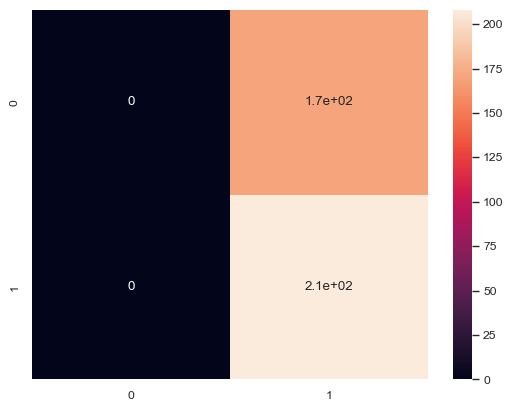

Negative AUC:  0.502658371040724


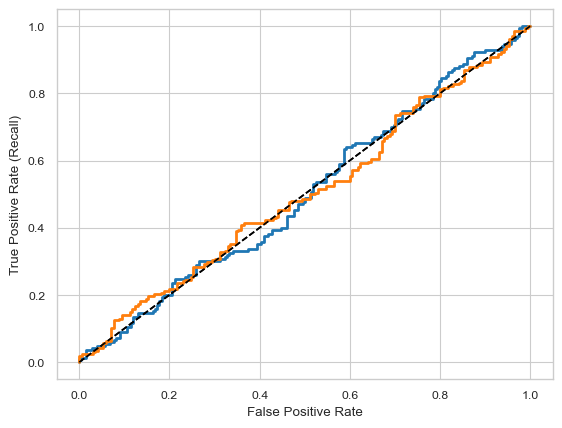

Positive AUC:  0.502658371040724

Adj Close, Open, High, Low Features
Sensitivity :  42.58064516129032
Specificity :  53.36322869955157
Accuracy Score:  49.381625441696116


              precision    recall  f1-score   support

    Negative       0.46      0.46      0.46       535
    Positive       0.52      0.52      0.52       597

    accuracy                           0.49      1132
   macro avg       0.49      0.49      0.49      1132
weighted avg       0.49      0.49      0.49      1132



Average of 10 cross validation of the accuracy score:  51.19205298013245


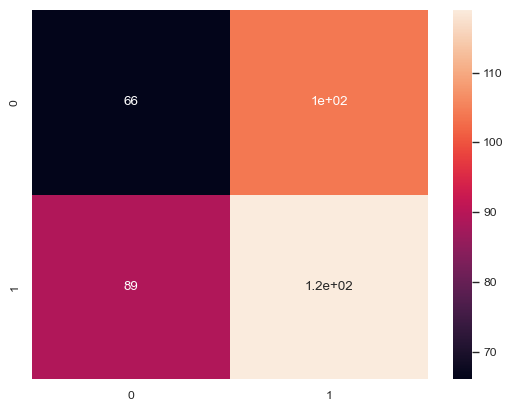

Negative AUC:  0.497341628959276


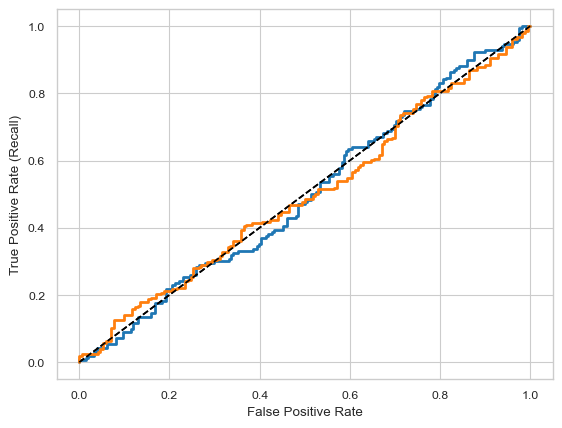

Positive AUC:  0.497341628959276


In [111]:
print('Just Adj Close Feature')
x = alg(X_appl, y_appl, X_train_applb, X_test_applb, y_train_applb, y_test_applb, gnb)
print()
print('Adj Close, Open, High, Low Features')
y = alg(X_appl, y_appl, X_train_applc, X_test_applc, y_train_applc, y_test_applc, gnb)


##### Tesla

Just Adj Close Feature
Sensitivity :  46.726190476190474
Specificity :  50.0
Accuracy Score:  51.5473032714412


              precision    recall  f1-score   support

    Negative       0.50      0.91      0.65       551
    Positive       0.62      0.14      0.23       580

    accuracy                           0.52      1131
   macro avg       0.56      0.53      0.44      1131
weighted avg       0.56      0.52      0.43      1131



Average of 10 cross validation of the accuracy score:  49.5046357615894


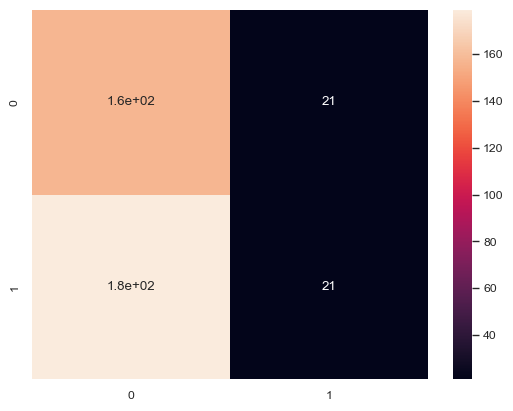

Negative AUC:  0.48492977528089887


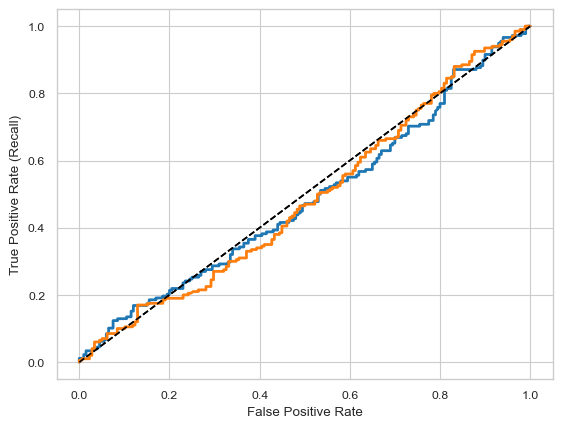

Positive AUC:  0.4849297752808988

Adj Close, Open, High, Low Features
Sensitivity :  47.1976401179941
Specificity :  53.84615384615385
Accuracy Score:  51.01679929266136


              precision    recall  f1-score   support

    Negative       0.50      0.92      0.65       551
    Positive       0.61      0.12      0.20       580

    accuracy                           0.51      1131
   macro avg       0.56      0.52      0.42      1131
weighted avg       0.56      0.51      0.42      1131



Average of 10 cross validation of the accuracy score:  49.5046357615894


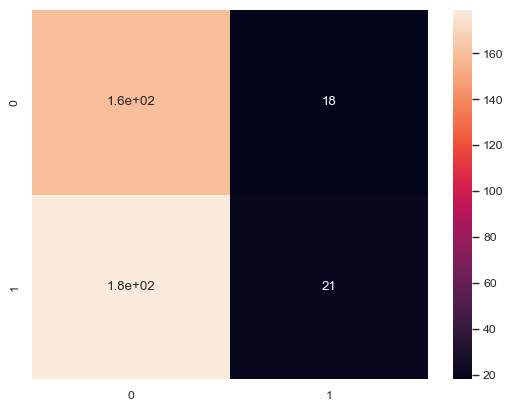

Negative AUC:  0.4869101123595506


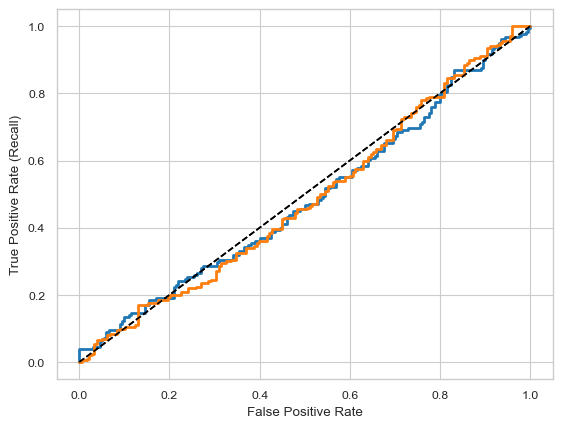

Positive AUC:  0.4869101123595506


51.01679929266136

In [112]:
print('Just Adj Close Feature')
alg(X_tsla, y_tsla, X_train_tslab, X_test_tslab, y_train_tslab, y_test_tslab, gnb)
print()
print('Adj Close, Open, High, Low Features')
alg(X_tsla, y_tsla, X_train_tslac, X_test_tslac, y_train_tslac, y_test_tslac, gnb)


##### Amazon

Just Adj Close Feature
Sensitivity :  nan
Specificity :  55.026455026455025
Accuracy Score:  54.28824049513705


              precision    recall  f1-score   support

    Negative       0.44      0.06      0.10       509
    Positive       0.55      0.94      0.69       622

    accuracy                           0.54      1131
   macro avg       0.49      0.50      0.40      1131
weighted avg       0.50      0.54      0.43      1131



Average of 10 cross validation of the accuracy score:  55.13598233995586


C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4058824074.py:16: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])


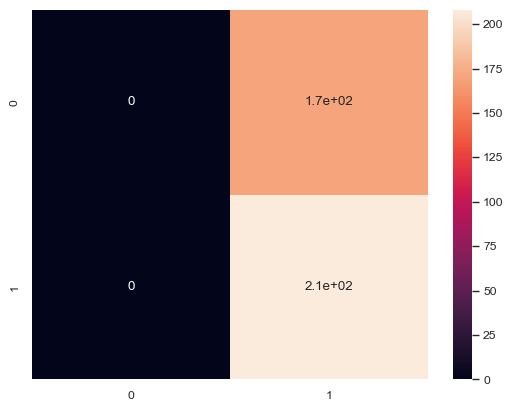

Negative AUC:  0.49827488687782806


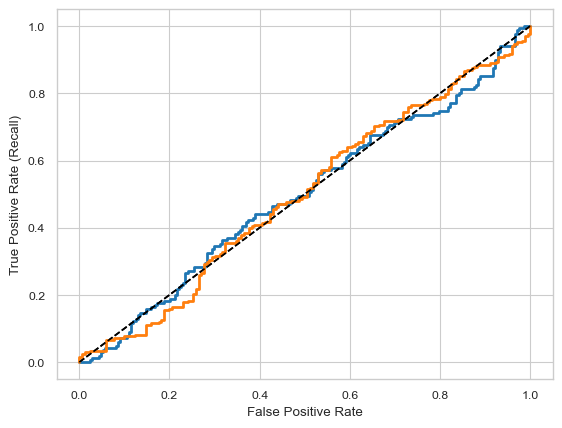

Positive AUC:  0.49827488687782806

Adj Close, Open, High, Low Features
Sensitivity :  38.46153846153847
Specificity :  54.27728613569322
Accuracy Score:  51.724137931034484


              precision    recall  f1-score   support

    Negative       0.42      0.18      0.25       509
    Positive       0.54      0.79      0.64       622

    accuracy                           0.52      1131
   macro avg       0.48      0.49      0.45      1131
weighted avg       0.48      0.52      0.47      1131



Average of 10 cross validation of the accuracy score:  55.13598233995586


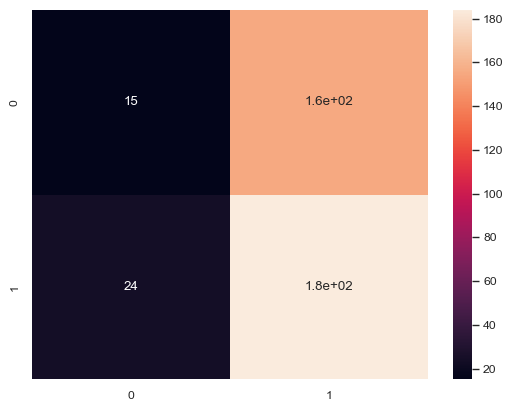

Negative AUC:  0.5087952488687782


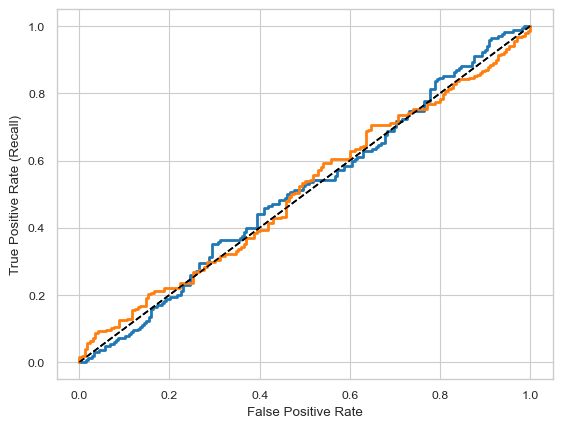

Positive AUC:  0.5087952488687784


51.724137931034484

In [113]:
print('Just Adj Close Feature')
alg(X_amzn, y_amzn, X_train_amznb, X_test_amznb, y_train_amznb, y_test_amznb, gnb)
print()
print('Adj Close, Open, High, Low Features')
alg(X_amzn, y_amzn, X_train_amznc, X_test_amznc, y_train_amznc, y_test_amznc, gnb)


##### Goog

Just Adj Close Feature
Sensitivity :  nan
Specificity :  56.34920634920635
Accuracy Score:  52.696728558797524


              precision    recall  f1-score   support

    Negative       0.46      0.03      0.06       532
    Positive       0.53      0.97      0.68       599

    accuracy                           0.53      1131
   macro avg       0.49      0.50      0.37      1131
weighted avg       0.50      0.53      0.39      1131



Average of 10 cross validation of the accuracy score:  51.956291390728474


C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4058824074.py:16: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])


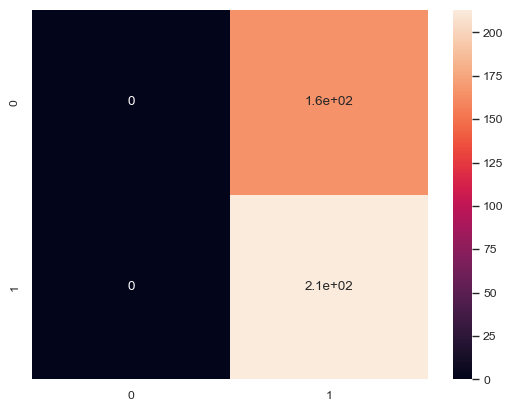

Negative AUC:  0.5615023474178403


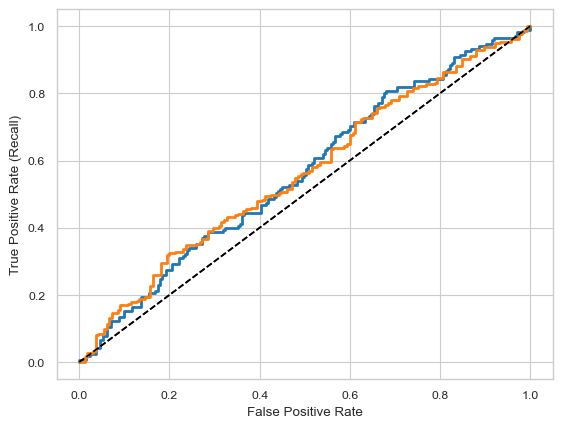

Positive AUC:  0.5615023474178404

Adj Close, Open, High, Low Features
Sensitivity :  50.0
Specificity :  57.89473684210527
Accuracy Score:  52.16622458001768


              precision    recall  f1-score   support

    Negative       0.48      0.26      0.34       532
    Positive       0.53      0.75      0.63       599

    accuracy                           0.52      1131
   macro avg       0.51      0.51      0.48      1131
weighted avg       0.51      0.52      0.49      1131



Average of 10 cross validation of the accuracy score:  51.956291390728474


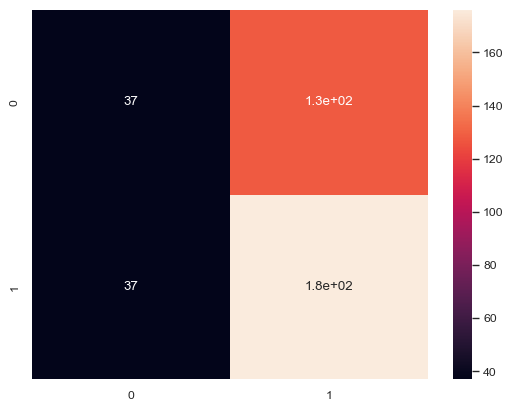

Negative AUC:  0.5574619433774364


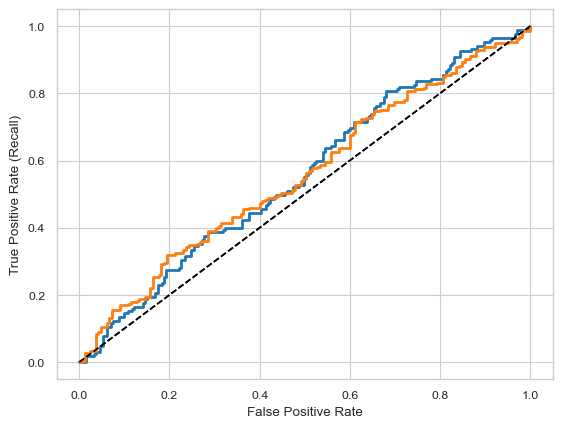

Positive AUC:  0.5574619433774364


52.16622458001768

In [114]:
print('Just Adj Close Feature')
alg(X_goog, y_goog, X_train_googb, X_test_googb, y_train_googb, y_test_googb, gnb)
print()
print('Adj Close, Open, High, Low Features')
alg(X_goog, y_goog, X_train_googc, X_test_googc, y_train_googc, y_test_googc, gnb)

##### Googl

Just Adj Close Feature
Sensitivity :  nan
Specificity :  55.29100529100529
Accuracy Score:  52.96198054818745


              precision    recall  f1-score   support

    Negative       0.50      0.00      0.00       532
    Positive       0.53      1.00      0.69       599

    accuracy                           0.53      1131
   macro avg       0.51      0.50      0.35      1131
weighted avg       0.52      0.53      0.37      1131



Average of 10 cross validation of the accuracy score:  51.426048565121405


C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4058824074.py:16: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])


Negative AUC:  0.5442088276096373


Positive AUC:  0.5442088276096373

Adj Close, Open, High, Low Features
Sensitivity :  nan
Specificity :  55.29100529100529
Accuracy Score:  51.5473032714412


              precision    recall  f1-score   support

    Negative       0.33      0.03      0.05       532
    Positive       0.52      0.95      0.67       599

    accuracy                           0.52      1131
   macro avg       0.42      0.49      0.36      1131
weighted avg       0.43      0.52      0.38      1131



Average of 10 cross validation of the accuracy score:  51.426048565121405


C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4058824074.py:16: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])


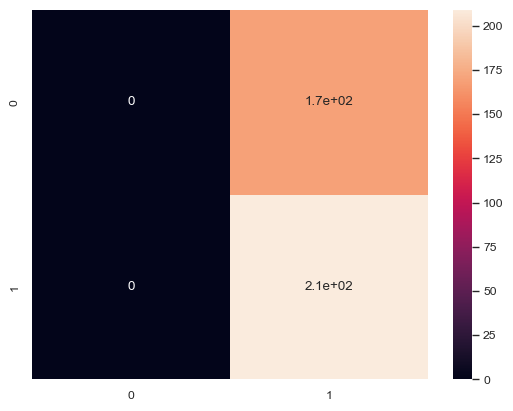

Negative AUC:  0.5613091362079217


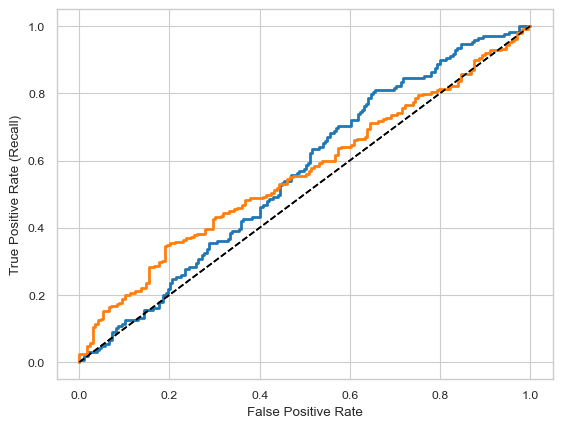

Positive AUC:  0.5613091362079217


51.5473032714412

In [115]:
print('Just Adj Close Feature')
alg(X_googl, y_googl, X_train_googlb, X_test_googlb, y_train_googlb, y_test_googlb, gnb)
print()
print('Adj Close, Open, High, Low Features')
alg(X_googl, y_googl, X_train_googlc, X_test_googlc, y_train_googlc, y_test_googlc, gnb)


#### Decision Trees

In [116]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
dt = DecisionTreeClassifier(random_state=42)

##### Apple

Just Adj Close Feature
Sensitivity :  44.16243654822335
Specificity :  54.14364640883977
Accuracy Score:  48.851590106007066


              precision    recall  f1-score   support

    Negative       0.46      0.48      0.47       535
    Positive       0.52      0.50      0.51       597

    accuracy                           0.49      1132
   macro avg       0.49      0.49      0.49      1132
weighted avg       0.49      0.49      0.49      1132



Average of 10 cross validation of the accuracy score:  50.463576158940405


Negative AUC:  0.492689479638009


Positive AUC:  0.49268947963800896

Adj Close, Open, High, Low Features
Sensitivity :  58.57988165680473
Specificity :  66.02870813397129
Accuracy Score:  61.74911660777384


              precision    recall  f1-score   support

    Negative       0.60      0.57      0.59       535
    Positive       0.63      0.66      0.64       597

    accuracy                           0.62      1132
   macro avg       0.62      0.62      0.62      1132
weighted avg       0.62      0.62      0.62      1132



Average of 10 cross validation of the accuracy score:  50.463576158940405


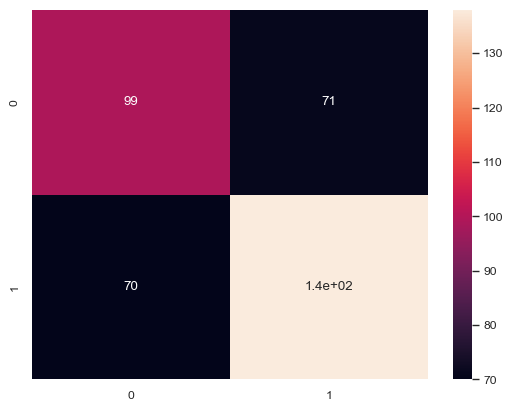

Negative AUC:  0.6229072398190045


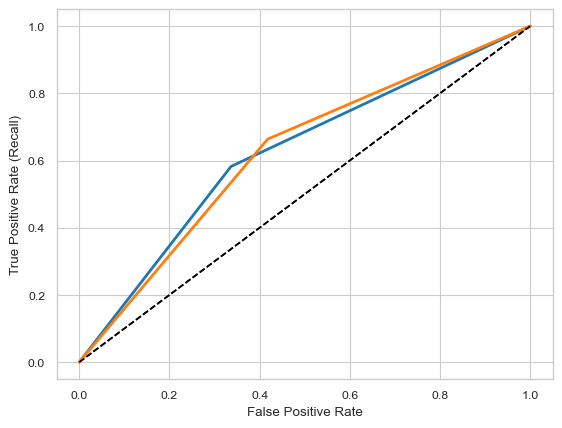

Positive AUC:  0.6229072398190044


61.74911660777384

In [117]:
print('Just Adj Close Feature')
alg(X_appl, y_appl, X_train_applb, X_test_applb, y_train_applb, y_test_applb, dt)
print()
print('Adj Close, Open, High, Low Features')
alg(X_appl, y_appl, X_train_applc, X_test_applc, y_train_applc, y_test_applc, dt)

##### Tesla

Just Adj Close Feature
Sensitivity :  47.28260869565217
Specificity :  53.09278350515464
Accuracy Score:  47.83377541998232


              precision    recall  f1-score   support

    Negative       0.46      0.46      0.46       551
    Positive       0.49      0.49      0.49       580

    accuracy                           0.48      1131
   macro avg       0.48      0.48      0.48      1131
weighted avg       0.48      0.48      0.48      1131



Average of 10 cross validation of the accuracy score:  67.12229580573951


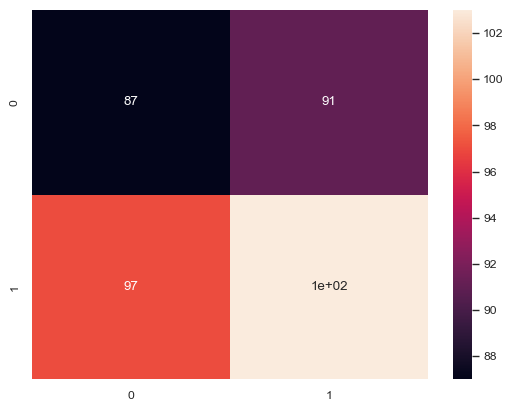

Negative AUC:  0.5000983146067416


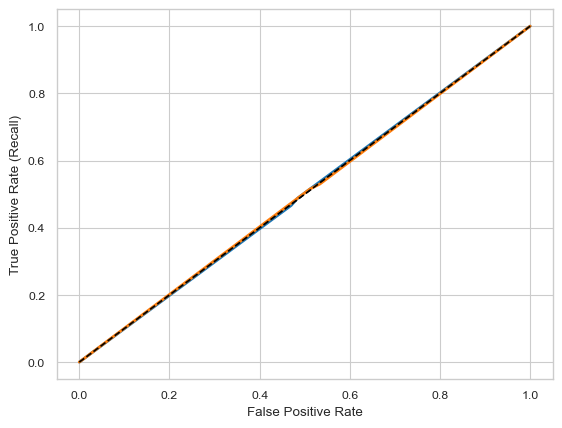

Positive AUC:  0.5000983146067416

Adj Close, Open, High, Low Features
Sensitivity :  66.85082872928176
Specificity :  71.06598984771574
Accuracy Score:  68.87709991158268


              precision    recall  f1-score   support

    Negative       0.68      0.69      0.68       551
    Positive       0.70      0.68      0.69       580

    accuracy                           0.69      1131
   macro avg       0.69      0.69      0.69      1131
weighted avg       0.69      0.69      0.69      1131



Average of 10 cross validation of the accuracy score:  67.12229580573951


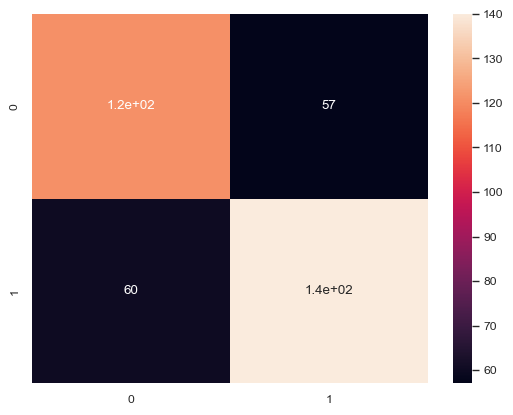

Negative AUC:  0.6898876404494382


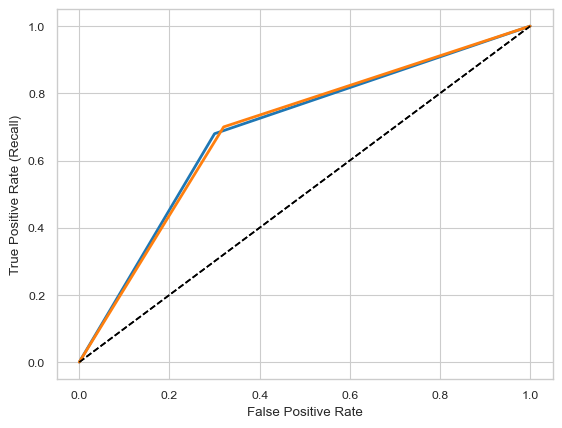

Positive AUC:  0.6898876404494382


68.87709991158268

In [118]:
print('Just Adj Close Feature')
alg(X_tsla, y_tsla, X_train_tslab, X_test_tslab, y_train_tslab, y_test_tslab, dt)
print()
print('Adj Close, Open, High, Low Features')
alg(X_tsla, y_tsla, X_train_tslac, X_test_tslac, y_train_tslac, y_test_tslac, dt)


##### Amazon

Just Adj Close Feature
Sensitivity :  44.44444444444444
Specificity :  54.629629629629626
Accuracy Score:  50.221043324491596


              precision    recall  f1-score   support

    Negative       0.45      0.48      0.47       509
    Positive       0.55      0.52      0.53       622

    accuracy                           0.50      1131
   macro avg       0.50      0.50      0.50      1131
weighted avg       0.51      0.50      0.50      1131



Average of 10 cross validation of the accuracy score:  57.850772626931565


Negative AUC:  0.49287330316742084


Positive AUC:  0.4928733031674208

Adj Close, Open, High, Low Features
Sensitivity :  63.85542168674698
Specificity :  69.81132075471697
Accuracy Score:  63.2183908045977


              precision    recall  f1-score   support

    Negative       0.59      0.61      0.60       509
    Positive       0.67      0.65      0.66       622

    accuracy                           0.63      1131
   macro avg       0.63      0.63      0.63      1131
weighted avg       0.63      0.63      0.63      1131



Average of 10 cross validation of the accuracy score:  57.850772626931565


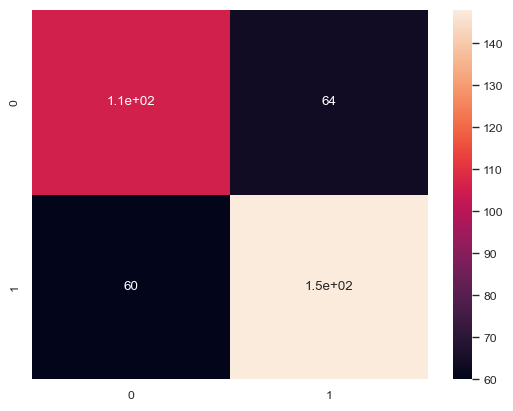

Negative AUC:  0.6675339366515838


Positive AUC:  0.6675339366515837


63.2183908045977

In [119]:
print('Just Adj Close Feature')
alg(X_amzn, y_amzn, X_train_amznb, X_test_amznb, y_train_amznb, y_test_amznb, dt)
print()
print('Adj Close, Open, High, Low Features')
alg(X_amzn, y_amzn, X_train_amznc, X_test_amznc, y_train_amznc, y_test_amznc, dt)


##### Goog

Just Adj Close Feature
Sensitivity :  43.93063583815029
Specificity :  56.58536585365853
Accuracy Score:  50.57471264367817


              precision    recall  f1-score   support

    Negative       0.47      0.48      0.48       532
    Positive       0.53      0.53      0.53       599

    accuracy                           0.51      1131
   macro avg       0.50      0.50      0.50      1131
weighted avg       0.51      0.51      0.51      1131



Average of 10 cross validation of the accuracy score:  64.07814569536424


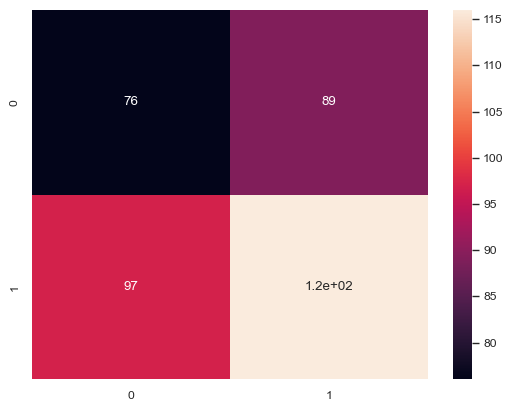

Negative AUC:  0.5058472044387538


Positive AUC:  0.5058472044387536

Adj Close, Open, High, Low Features
Sensitivity :  61.19402985074627
Specificity :  76.27118644067797
Accuracy Score:  68.0813439434129


              precision    recall  f1-score   support

    Negative       0.67      0.65      0.66       532
    Positive       0.69      0.71      0.70       599

    accuracy                           0.68      1131
   macro avg       0.68      0.68      0.68      1131
weighted avg       0.68      0.68      0.68      1131



Average of 10 cross validation of the accuracy score:  64.07814569536424


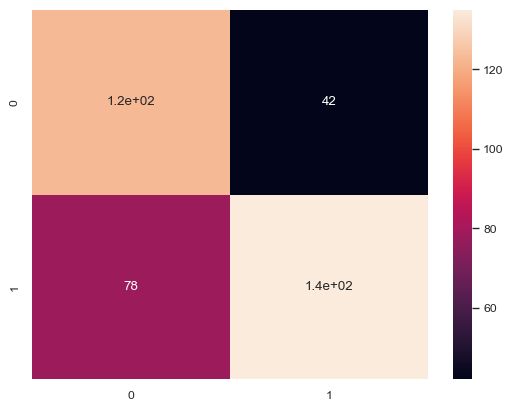

Negative AUC:  0.689628681177977


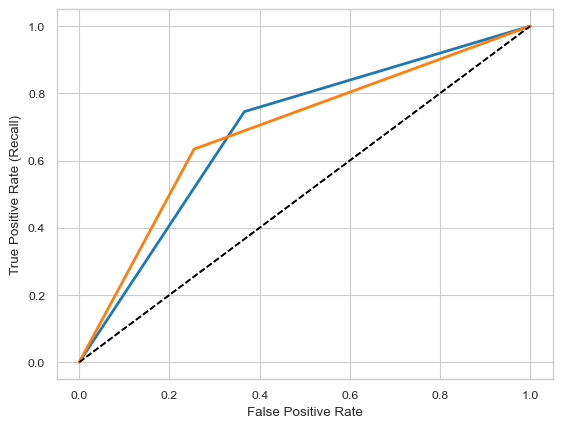

Positive AUC:  0.689628681177977


68.0813439434129

In [120]:
print('Just Adj Close Feature')
alg(X_goog, y_goog, X_train_googb, X_test_googb, y_train_googb, y_test_googb, dt)
print()
print('Adj Close, Open, High, Low Features')
alg(X_goog, y_goog, X_train_googc, X_test_googc, y_train_googc, y_test_googc, dt)

##### Googl

Just Adj Close Feature
Sensitivity :  47.31182795698925
Specificity :  57.8125
Accuracy Score:  48.4526967285588


              precision    recall  f1-score   support

    Negative       0.45      0.45      0.45       532
    Positive       0.51      0.52      0.52       599

    accuracy                           0.48      1131
   macro avg       0.48      0.48      0.48      1131
weighted avg       0.48      0.48      0.48      1131



Average of 10 cross validation of the accuracy score:  63.81236203090508


Negative AUC:  0.5245179921293281


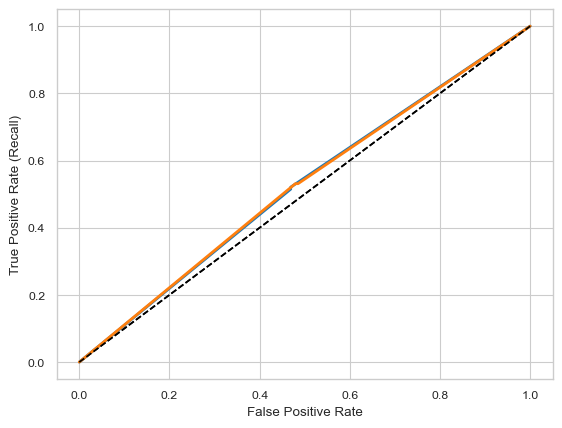

Positive AUC:  0.5245179921293281

Adj Close, Open, High, Low Features
Sensitivity :  65.96858638743456
Specificity :  77.00534759358288
Accuracy Score:  68.34659593280283


              precision    recall  f1-score   support

    Negative       0.67      0.64      0.65       532
    Positive       0.69      0.72      0.71       599

    accuracy                           0.68      1131
   macro avg       0.68      0.68      0.68      1131
weighted avg       0.68      0.68      0.68      1131



Average of 10 cross validation of the accuracy score:  63.81236203090508


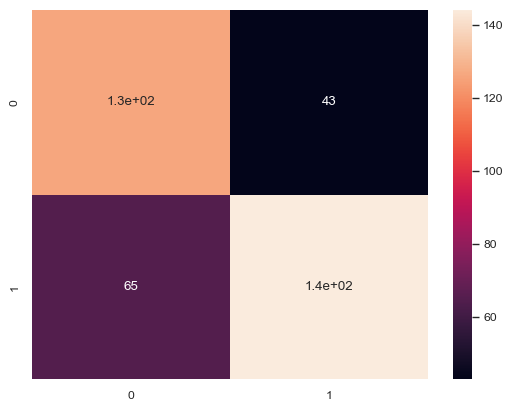

Negative AUC:  0.7172786727442598


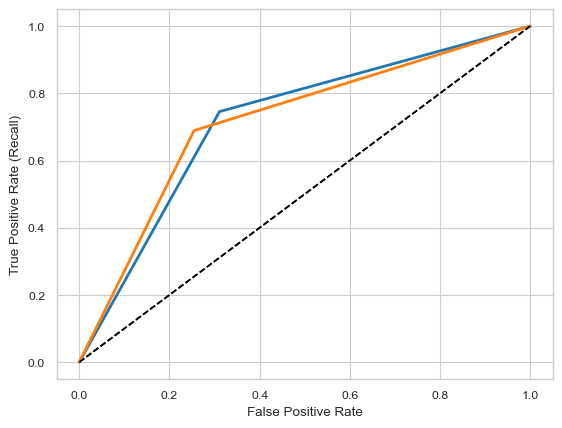

Positive AUC:  0.7172786727442598


68.34659593280283

In [121]:
print('Just Adj Close Feature')
alg(X_googl, y_googl, X_train_googlb, X_test_googlb, y_train_googlb, y_test_googlb, dt)
print()
print('Adj Close, Open, High, Low Features')
alg(X_googl, y_googl, X_train_googlc, X_test_googlc, y_train_googlc, y_test_googlc, dt)


#### Support Vector Machines

In [122]:
from sklearn import svm

svm = svm.SVC(probability=True)

##### Apple

Just Adj Close Feature
Sensitivity :  44.0
Specificity :  54.54545454545454
Accuracy Score:  52.65017667844523


              precision    recall  f1-score   support

    Negative       0.50      0.24      0.32       535
    Positive       0.53      0.79      0.64       597

    accuracy                           0.53      1132
   macro avg       0.52      0.51      0.48      1132
weighted avg       0.52      0.53      0.49      1132



Average of 10 cross validation of the accuracy score:  53.31125827814569


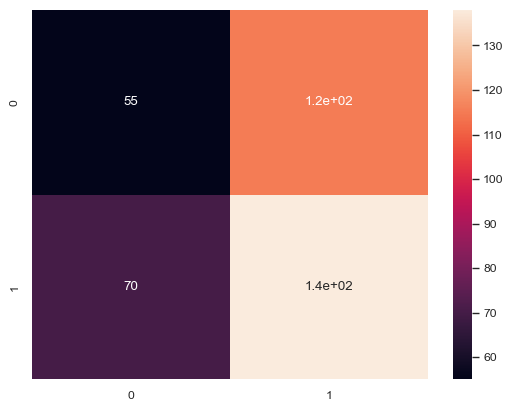

Negative AUC:  0.5155260180995475


Positive AUC:  0.5155260180995476

Adj Close, Open, High, Low Features


C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4058824074.py:16: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])


Sensitivity :  nan
Specificity :  55.026455026455025
Accuracy Score:  52.65017667844523


              precision    recall  f1-score   support

    Negative       0.50      0.24      0.32       535
    Positive       0.53      0.79      0.64       597

    accuracy                           0.53      1132
   macro avg       0.52      0.51      0.48      1132
weighted avg       0.52      0.53      0.49      1132



Average of 10 cross validation of the accuracy score:  53.31125827814569


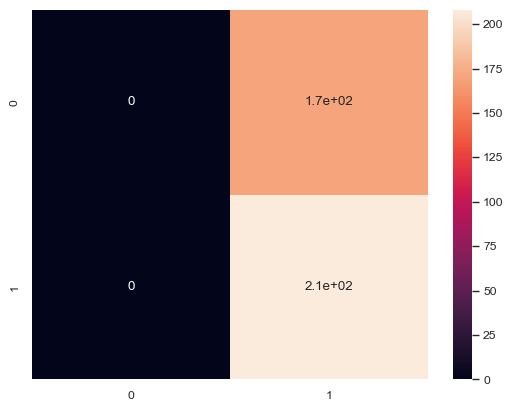

Negative AUC:  0.5800904977375565


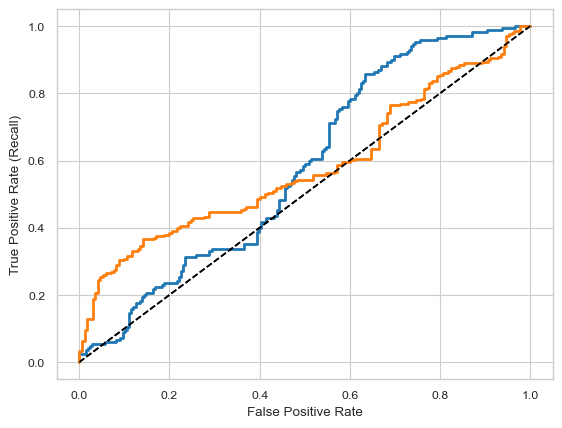

Positive AUC:  0.5800904977375565


52.65017667844523

In [123]:
print('Just Adj Close Feature')
alg(X_appl, y_appl, X_train_applb, X_test_applb, y_train_applb, y_test_applb, svm)
print()
print('Adj Close, Open, High, Low Features')
alg(X_appl, y_appl, X_train_applc, X_test_applc, y_train_applc, y_test_applc, svm)

##### Tesla

Just Adj Close Feature
Sensitivity :  49.642857142857146
Specificity :  60.204081632653065
Accuracy Score:  51.105216622458


              precision    recall  f1-score   support

    Negative       0.50      0.51      0.50       551
    Positive       0.52      0.52      0.52       580

    accuracy                           0.51      1131
   macro avg       0.51      0.51      0.51      1131
weighted avg       0.51      0.51      0.51      1131



Average of 10 cross validation of the accuracy score:  49.968211920529804


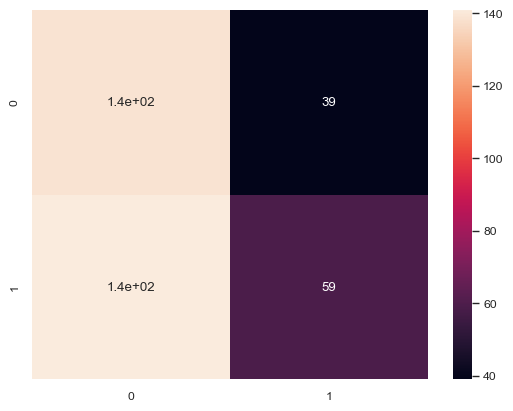

Negative AUC:  0.5497752808988764


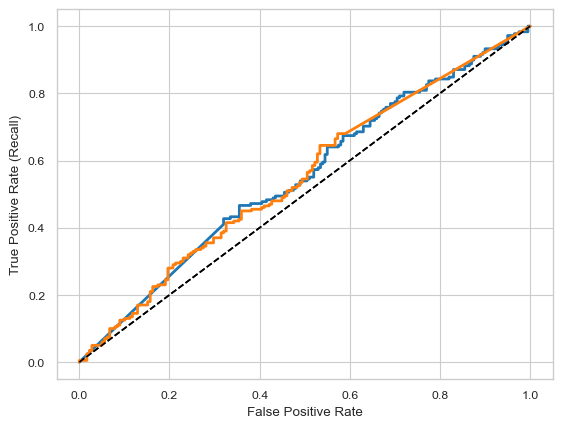

Positive AUC:  0.5497752808988765

Adj Close, Open, High, Low Features
Sensitivity :  50.53763440860215
Specificity :  56.25
Accuracy Score:  50.30946065428824


              precision    recall  f1-score   support

    Negative       0.48      0.30      0.37       551
    Positive       0.51      0.69      0.59       580

    accuracy                           0.50      1131
   macro avg       0.50      0.50      0.48      1131
weighted avg       0.50      0.50      0.48      1131



Average of 10 cross validation of the accuracy score:  49.968211920529804


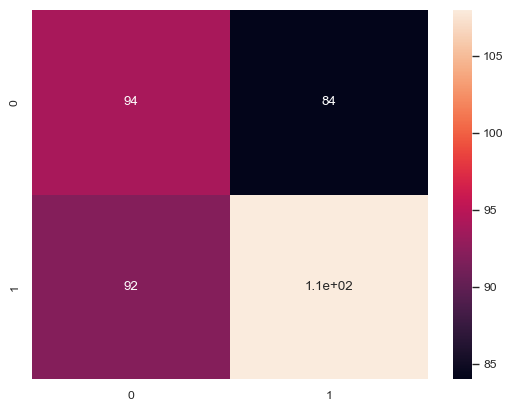

Negative AUC:  0.40426966292134825


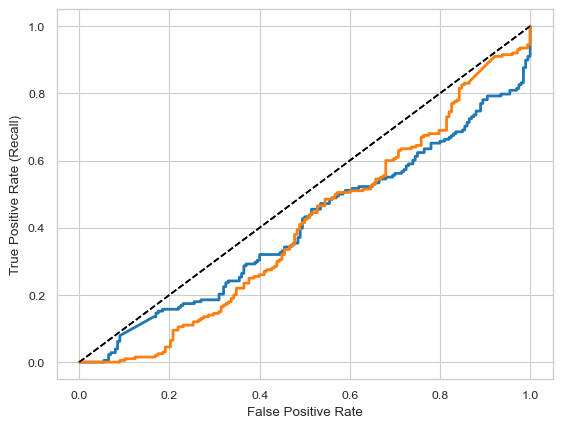

Positive AUC:  0.4042696629213483


50.30946065428824

In [124]:
print('Just Adj Close Feature')
alg(X_tsla, y_tsla, X_train_tslab, X_test_tslab, y_train_tslab, y_test_tslab, svm)
print()
print('Adj Close, Open, High, Low Features')
alg(X_tsla, y_tsla, X_train_tslac, X_test_tslac, y_train_tslac, y_test_tslac, svm)


##### Amazon

Just Adj Close Feature


C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4058824074.py:16: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])


Sensitivity :  nan
Specificity :  55.026455026455025
Accuracy Score:  54.46507515473032


              precision    recall  f1-score   support

    Negative       0.45      0.06      0.10       509
    Positive       0.55      0.94      0.69       622

    accuracy                           0.54      1131
   macro avg       0.50      0.50      0.40      1131
weighted avg       0.51      0.54      0.43      1131



Average of 10 cross validation of the accuracy score:  55.003532008830035


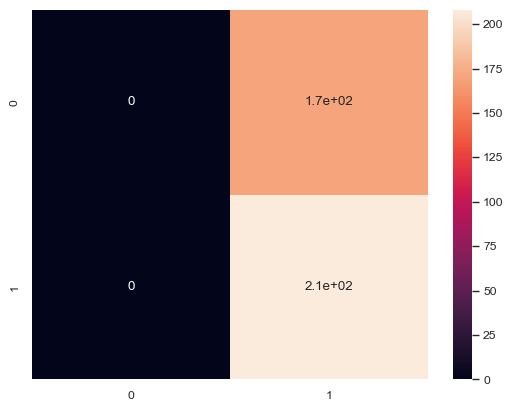

Negative AUC:  0.5195984162895928


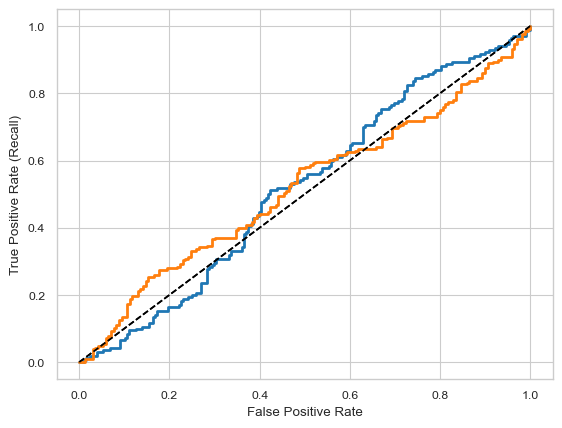

Positive AUC:  0.5195984162895928

Adj Close, Open, High, Low Features
Sensitivity :  37.5
Specificity :  54.33526011560693
Accuracy Score:  54.73032714412025


              precision    recall  f1-score   support

    Negative       0.48      0.06      0.10       509
    Positive       0.55      0.95      0.70       622

    accuracy                           0.55      1131
   macro avg       0.51      0.50      0.40      1131
weighted avg       0.52      0.55      0.43      1131



Average of 10 cross validation of the accuracy score:  55.003532008830035


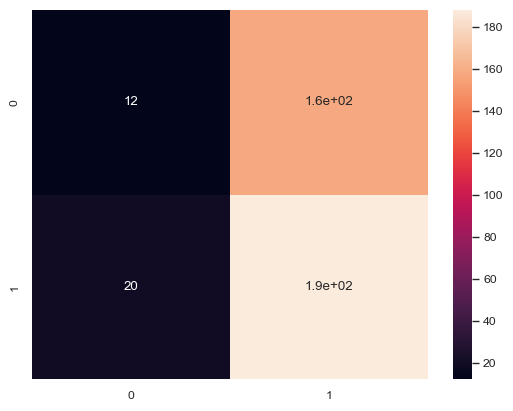

Negative AUC:  0.7152432126696833


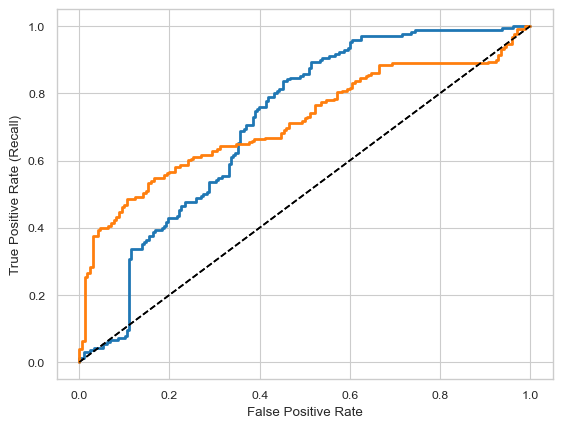

Positive AUC:  0.7152432126696833


54.73032714412025

In [125]:
print('Just Adj Close Feature')
alg(X_amzn, y_amzn, X_train_amznb, X_test_amznb, y_train_amznb, y_test_amznb, svm)
print()
print('Adj Close, Open, High, Low Features')
alg(X_amzn, y_amzn, X_train_amznc, X_test_amznc, y_train_amznc, y_test_amznc, svm)


##### Goog

Just Adj Close Feature


C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4058824074.py:16: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])


Sensitivity :  nan
Specificity :  56.34920634920635
Accuracy Score:  52.43147656940761


              precision    recall  f1-score   support

    Negative       0.43      0.03      0.06       532
    Positive       0.53      0.96      0.68       599

    accuracy                           0.52      1131
   macro avg       0.48      0.50      0.37      1131
weighted avg       0.48      0.52      0.39      1131



Average of 10 cross validation of the accuracy score:  53.21456953642384


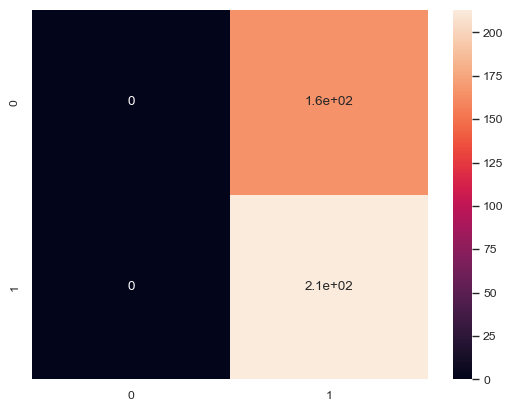

Negative AUC:  0.46626831697254234


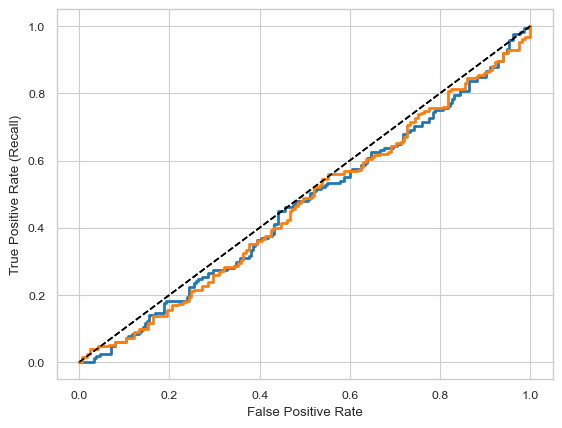

Positive AUC:  0.46626831697254234

Adj Close, Open, High, Low Features
Sensitivity :  50.0
Specificity :  56.557377049180324
Accuracy Score:  52.51989389920424


              precision    recall  f1-score   support

    Negative       0.45      0.04      0.08       532
    Positive       0.53      0.95      0.68       599

    accuracy                           0.53      1131
   macro avg       0.49      0.50      0.38      1131
weighted avg       0.49      0.53      0.40      1131



Average of 10 cross validation of the accuracy score:  53.21456953642384


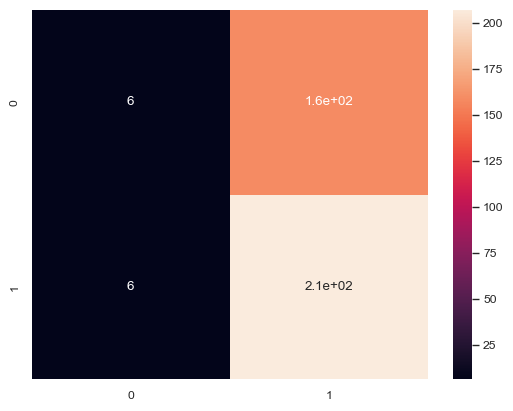

Negative AUC:  0.7339024043249396


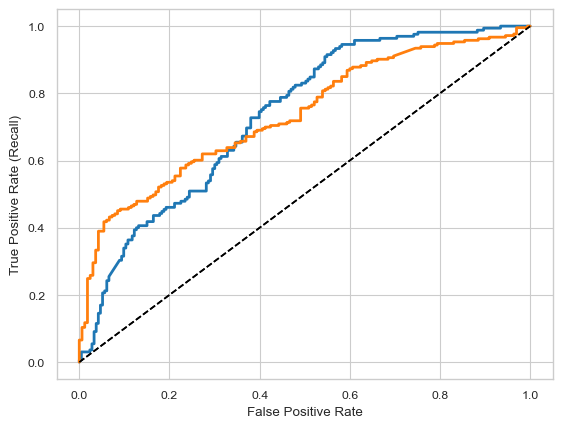

Positive AUC:  0.7339024043249396


52.51989389920424

In [126]:
print('Just Adj Close Feature')
alg(X_goog, y_goog, X_train_googb, X_test_googb, y_train_googb, y_test_googb, svm)
print()
print('Adj Close, Open, High, Low Features')
alg(X_goog, y_goog, X_train_googc, X_test_googc, y_train_googc, y_test_googc, svm)

##### Googl

Just Adj Close Feature


C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4058824074.py:16: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])


Sensitivity :  nan
Specificity :  55.29100529100529
Accuracy Score:  52.60831122900088


              precision    recall  f1-score   support

    Negative       0.43      0.02      0.04       532
    Positive       0.53      0.97      0.69       599

    accuracy                           0.53      1131
   macro avg       0.48      0.50      0.36      1131
weighted avg       0.48      0.53      0.38      1131



Average of 10 cross validation of the accuracy score:  53.8101545253863


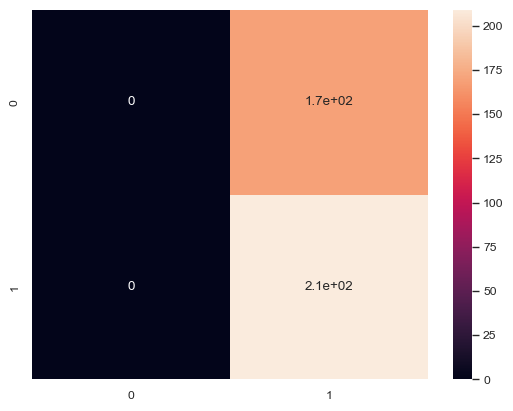

Negative AUC:  0.4566688372356389


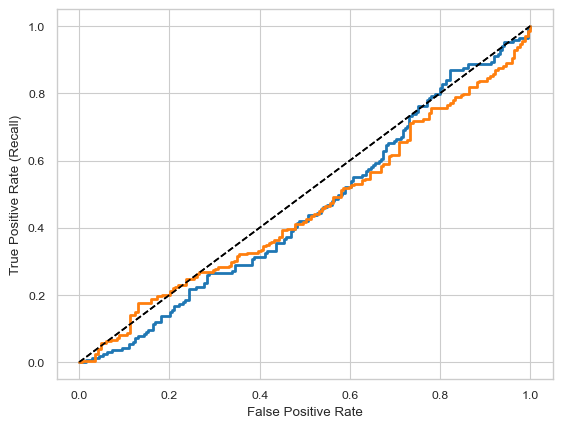

Positive AUC:  0.4566688372356389

Adj Close, Open, High, Low Features
Sensitivity :  100.0
Specificity :  55.437665782493376
Accuracy Score:  52.96198054818745


              precision    recall  f1-score   support

    Negative       0.50      0.01      0.01       532
    Positive       0.53      0.99      0.69       599

    accuracy                           0.53      1131
   macro avg       0.51      0.50      0.35      1131
weighted avg       0.52      0.53      0.37      1131



Average of 10 cross validation of the accuracy score:  53.8101545253863


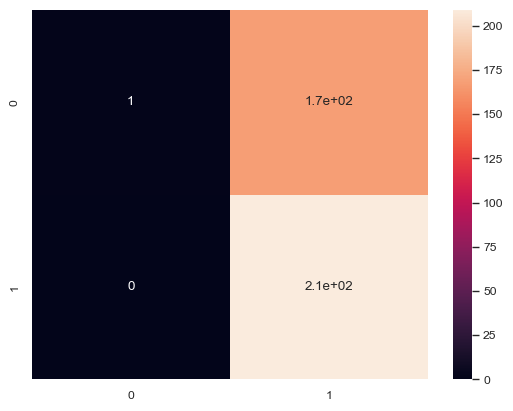

Negative AUC:  0.7398289969140173


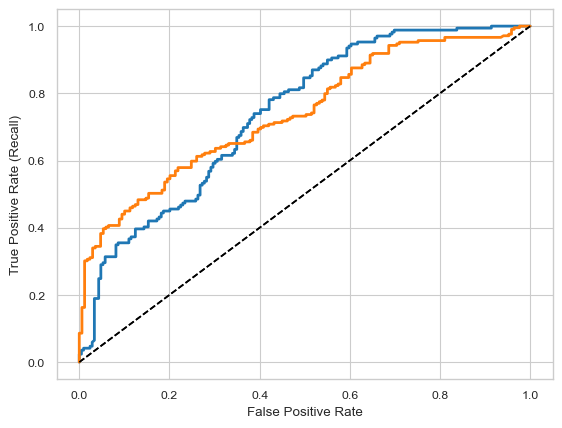

Positive AUC:  0.739828996914017


52.96198054818745

In [127]:
print('Just Adj Close Feature')
alg(X_googl, y_googl, X_train_googlb, X_test_googlb, y_train_googlb, y_test_googlb, svm)
print()
print('Adj Close, Open, High, Low Features')
alg(X_googl, y_googl, X_train_googlc, X_test_googlc, y_train_googlc, y_test_googlc, svm)


#### Gradient Boosting Classifier

In [128]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=5, learning_rate=1.0, max_depth=1, random_state=0)


##### Apple

Just Adj Close Feature
Sensitivity :  40.0
Specificity :  54.95978552278821
Accuracy Score:  51.14840989399293


              precision    recall  f1-score   support

    Negative       0.47      0.25      0.32       535
    Positive       0.53      0.75      0.62       597

    accuracy                           0.51      1132
   macro avg       0.50      0.50      0.47      1132
weighted avg       0.50      0.51      0.48      1132



Average of 10 cross validation of the accuracy score:  49.40397350993378


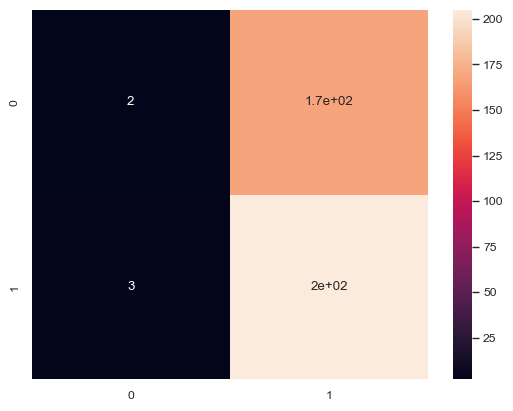

Negative AUC:  0.49785067873303174


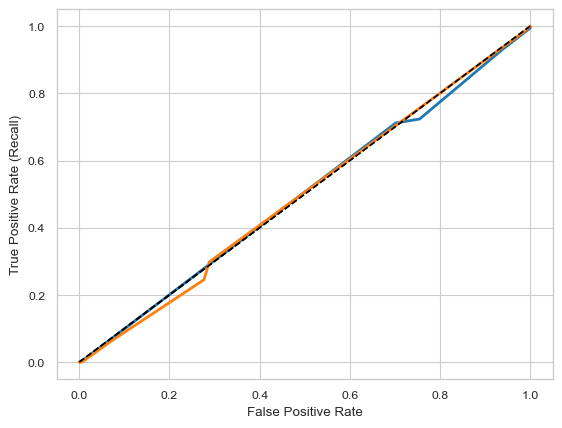

Positive AUC:  0.4978506787330317

Adj Close, Open, High, Low Features
Sensitivity :  62.5
Specificity :  55.4054054054054
Accuracy Score:  53.003533568904594


              precision    recall  f1-score   support

    Negative       0.53      0.04      0.08       535
    Positive       0.53      0.96      0.68       597

    accuracy                           0.53      1132
   macro avg       0.53      0.50      0.38      1132
weighted avg       0.53      0.53      0.40      1132



Average of 10 cross validation of the accuracy score:  49.40397350993378


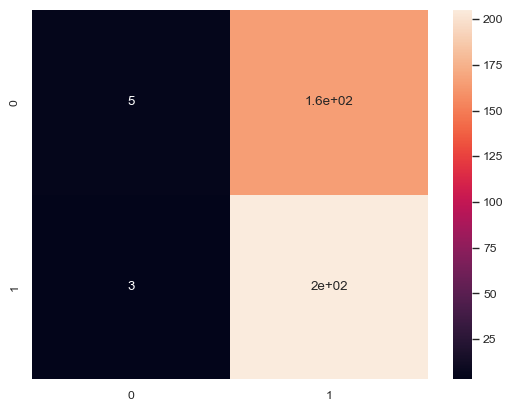

Negative AUC:  0.5152714932126696


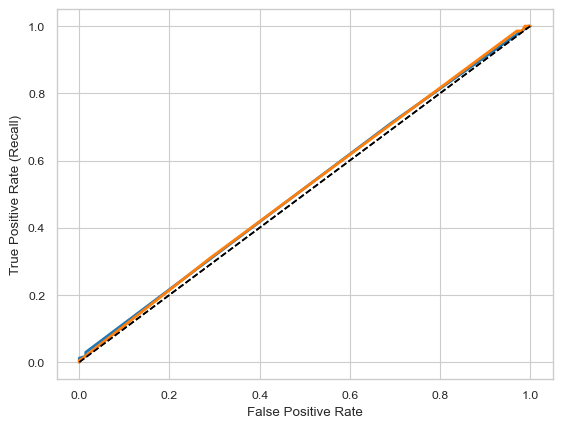

Positive AUC:  0.5152714932126697


53.003533568904594

In [129]:
print('Just Adj Close Feature')
alg(X_appl, y_appl, X_train_applb, X_test_applb, y_train_applb, y_test_applb, gbc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_appl, y_appl, X_train_applc, X_test_applc, y_train_applc, y_test_applc, gbc)

##### Tesla

Just Adj Close Feature
Sensitivity :  50.54945054945055
Specificity :  54.00696864111498
Accuracy Score:  52.87356321839081


              precision    recall  f1-score   support

    Negative       0.51      0.64      0.57       551
    Positive       0.55      0.42      0.48       580

    accuracy                           0.53      1131
   macro avg       0.53      0.53      0.52      1131
weighted avg       0.53      0.53      0.52      1131



Average of 10 cross validation of the accuracy score:  49.968211920529804


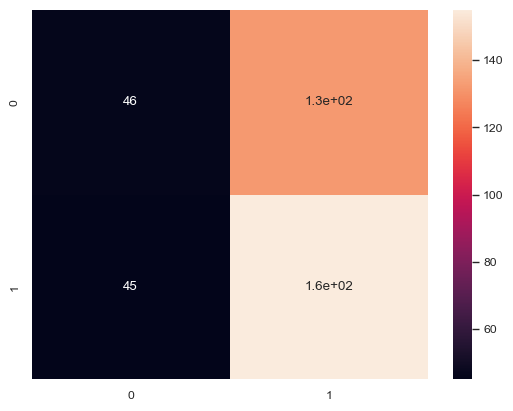

Negative AUC:  0.5320224719101124


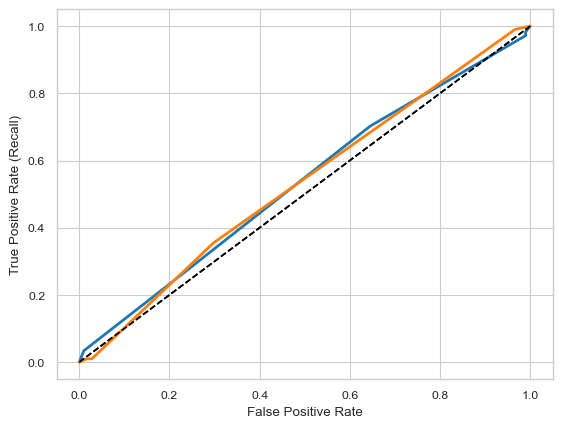

Positive AUC:  0.5320224719101123

Adj Close, Open, High, Low Features
Sensitivity :  60.0
Specificity :  55.10835913312694
Accuracy Score:  54.46507515473032


              precision    recall  f1-score   support

    Negative       0.56      0.32      0.41       551
    Positive       0.54      0.75      0.63       580

    accuracy                           0.54      1131
   macro avg       0.55      0.54      0.52      1131
weighted avg       0.55      0.54      0.52      1131



Average of 10 cross validation of the accuracy score:  49.968211920529804


Negative AUC:  0.5363202247191012


Positive AUC:  0.5363202247191011


54.46507515473032

In [130]:
print('Just Adj Close Feature')
alg(X_tsla, y_tsla, X_train_tslab, X_test_tslab, y_train_tslab, y_test_tslab, gbc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_tsla, y_tsla, X_train_tslac, X_test_tslac, y_train_tslac, y_test_tslac, gbc)


##### Amazon

Just Adj Close Feature
Sensitivity :  41.17647058823529
Specificity :  54.84764542936288
Accuracy Score:  53.40406719717065


              precision    recall  f1-score   support

    Negative       0.45      0.15      0.23       509
    Positive       0.55      0.85      0.67       622

    accuracy                           0.53      1131
   macro avg       0.50      0.50      0.45      1131
weighted avg       0.50      0.53      0.47      1131



Average of 10 cross validation of the accuracy score:  53.4075055187638


Negative AUC:  0.4965780542986425


Positive AUC:  0.4965780542986425

Adj Close, Open, High, Low Features
Sensitivity :  38.70967741935484
Specificity :  53.79746835443038
Accuracy Score:  54.818744473916894


              precision    recall  f1-score   support

    Negative       0.49      0.14      0.21       509
    Positive       0.56      0.89      0.68       622

    accuracy                           0.55      1131
   macro avg       0.52      0.51      0.45      1131
weighted avg       0.53      0.55      0.47      1131



Average of 10 cross validation of the accuracy score:  53.4075055187638


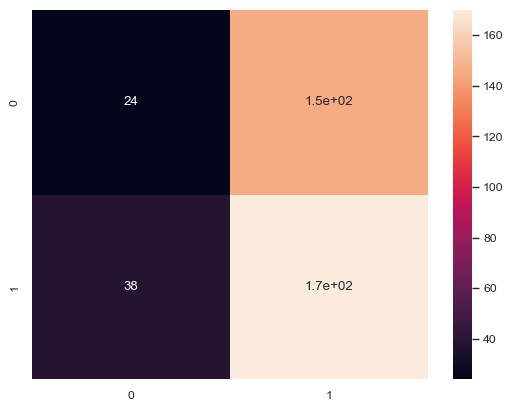

Negative AUC:  0.4816035067873303


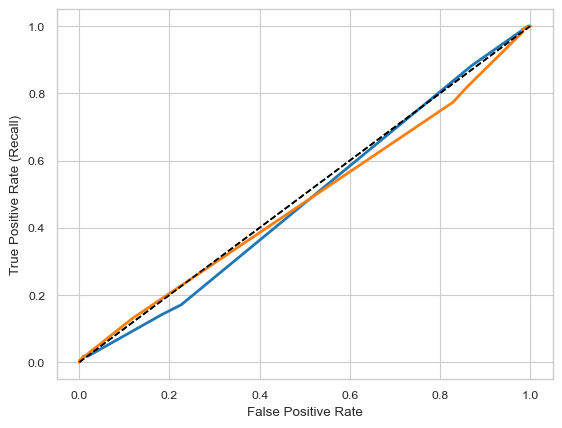

Positive AUC:  0.4816035067873303


54.818744473916894

In [131]:
print('Just Adj Close Feature')
alg(X_amzn, y_amzn, X_train_amznb, X_test_amznb, y_train_amznb, y_test_amznb, gbc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_amzn, y_amzn, X_train_amznc, X_test_amznc, y_train_amznc, y_test_amznc, gbc)


##### Goog

Just Adj Close Feature
Sensitivity :  36.36363636363637
Specificity :  56.13079019073569
Accuracy Score:  53.40406719717065


              precision    recall  f1-score   support

    Negative       0.53      0.09      0.15       532
    Positive       0.53      0.93      0.68       599

    accuracy                           0.53      1131
   macro avg       0.53      0.51      0.42      1131
weighted avg       0.53      0.53      0.43      1131



Average of 10 cross validation of the accuracy score:  53.148344370860926


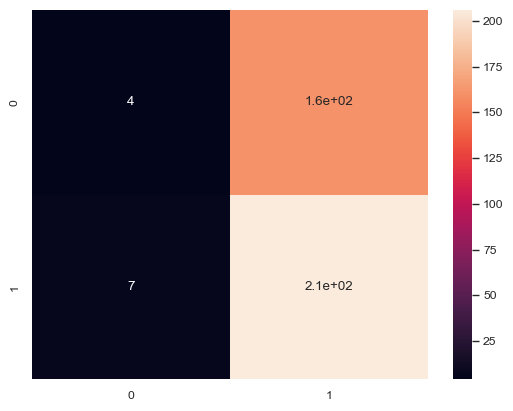

Negative AUC:  0.4766823161189358


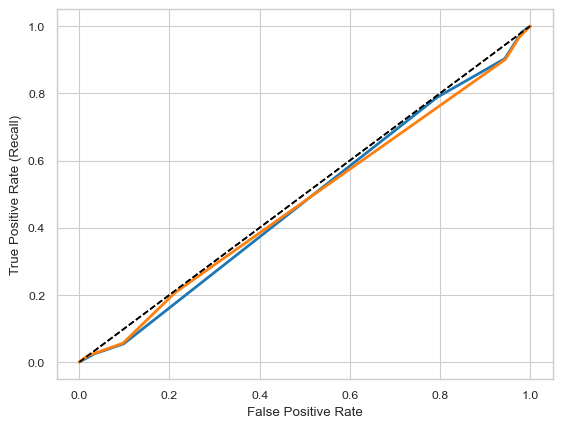

Positive AUC:  0.4766823161189358

Adj Close, Open, High, Low Features
Sensitivity :  58.333333333333336
Specificity :  56.830601092896174
Accuracy Score:  53.49248452696729


              precision    recall  f1-score   support

    Negative       0.53      0.10      0.17       532
    Positive       0.54      0.92      0.68       599

    accuracy                           0.53      1131
   macro avg       0.53      0.51      0.42      1131
weighted avg       0.53      0.53      0.44      1131



Average of 10 cross validation of the accuracy score:  53.148344370860926


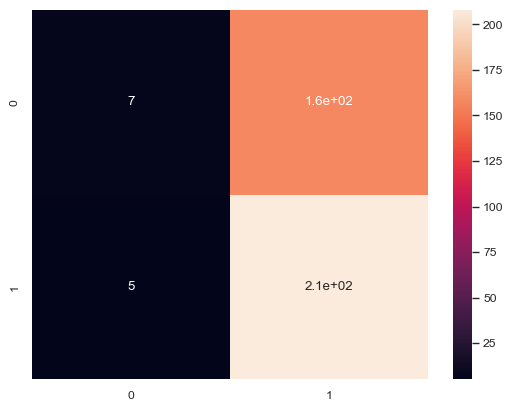

Negative AUC:  0.5161047090624555


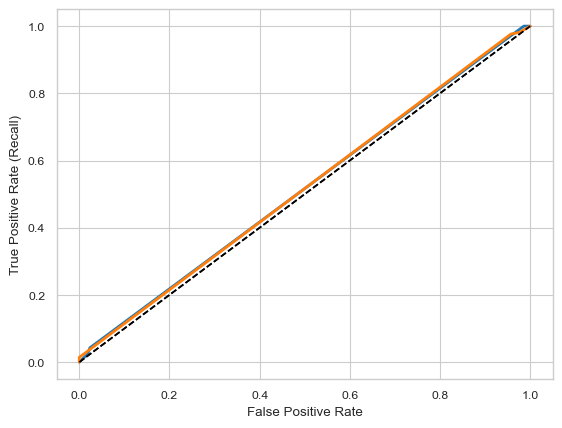

Positive AUC:  0.5161047090624555


53.49248452696729

In [132]:
print('Just Adj Close Feature')
alg(X_goog, y_goog, X_train_googb, X_test_googb, y_train_googb, y_test_googb, gbc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_goog, y_goog, X_train_googc, X_test_googc, y_train_googc, y_test_googc, gbc)

##### Googl

Just Adj Close Feature
Sensitivity :  47.368421052631575
Specificity :  55.58823529411765
Accuracy Score:  53.315649867374006


              precision    recall  f1-score   support

    Negative       0.52      0.08      0.14       532
    Positive       0.53      0.93      0.68       599

    accuracy                           0.53      1131
   macro avg       0.53      0.51      0.41      1131
weighted avg       0.53      0.53      0.43      1131



Average of 10 cross validation of the accuracy score:  53.346578366445904


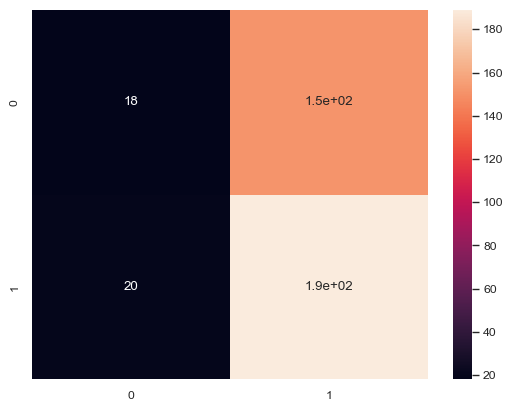

Negative AUC:  0.5290761869709238


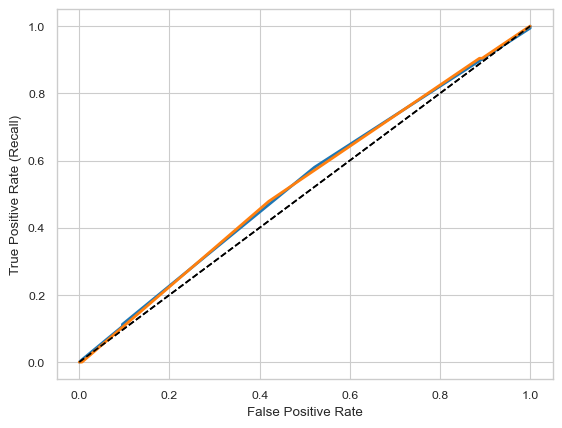

Positive AUC:  0.5290761869709238

Adj Close, Open, High, Low Features
Sensitivity :  61.53846153846154
Specificity :  55.89041095890411
Accuracy Score:  53.315649867374006


              precision    recall  f1-score   support

    Negative       0.53      0.07      0.13       532
    Positive       0.53      0.94      0.68       599

    accuracy                           0.53      1131
   macro avg       0.53      0.51      0.40      1131
weighted avg       0.53      0.53      0.42      1131



Average of 10 cross validation of the accuracy score:  53.346578366445904


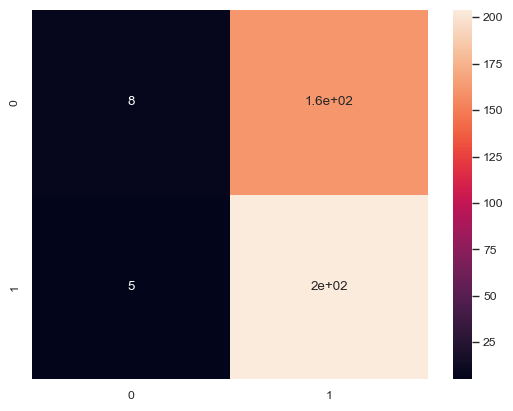

Negative AUC:  0.5166756320602474


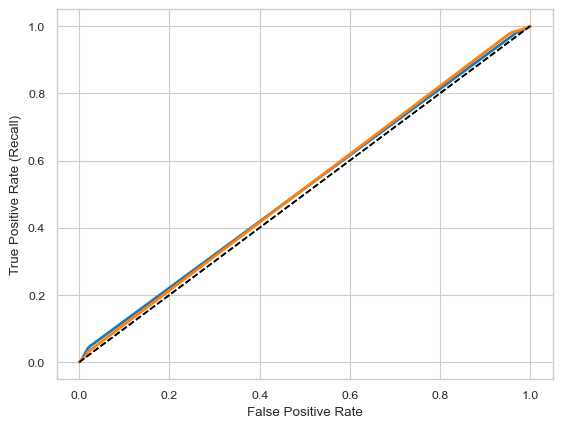

Positive AUC:  0.5166756320602475


53.315649867374006

In [133]:
print('Just Adj Close Feature')
alg(X_googl, y_googl, X_train_googlb, X_test_googlb, y_train_googlb, y_test_googlb, gbc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_googl, y_googl, X_train_googlc, X_test_googlc, y_train_googlc, y_test_googlc, gbc)


#### Random Forest Classifier

In [134]:
rfc = RandomForestClassifier(n_estimators=3, random_state=0)

##### Apple

Just Adj Close Feature
Sensitivity :  44.94949494949495
Specificity :  55.00000000000001
Accuracy Score:  49.46996466431096


              precision    recall  f1-score   support

    Negative       0.46      0.45      0.46       535
    Positive       0.52      0.53      0.53       597

    accuracy                           0.49      1132
   macro avg       0.49      0.49      0.49      1132
weighted avg       0.49      0.49      0.49      1132



Average of 10 cross validation of the accuracy score:  48.60927152317881


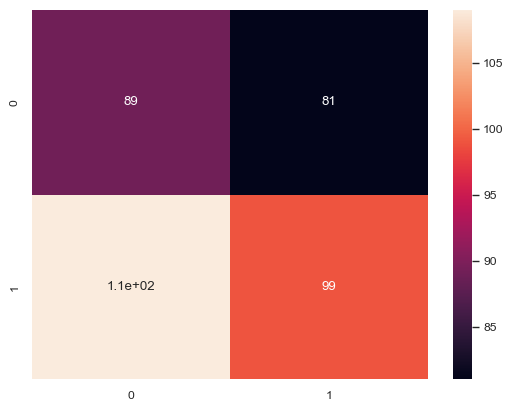

Negative AUC:  0.5195701357466063


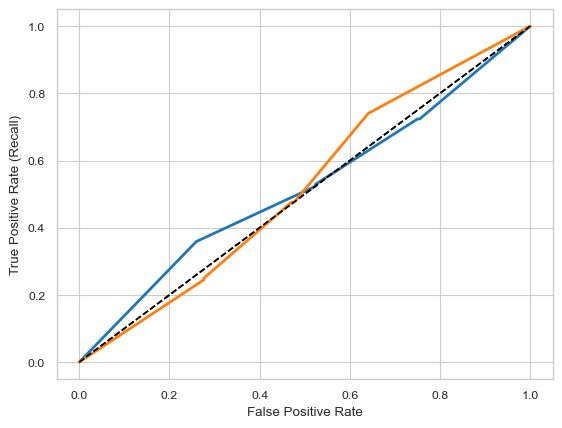

Positive AUC:  0.5195701357466063

Adj Close, Open, High, Low Features
Sensitivity :  57.14285714285714
Specificity :  65.51724137931035
Accuracy Score:  56.09540636042403


              precision    recall  f1-score   support

    Negative       0.54      0.51      0.52       535
    Positive       0.58      0.61      0.59       597

    accuracy                           0.56      1132
   macro avg       0.56      0.56      0.56      1132
weighted avg       0.56      0.56      0.56      1132



Average of 10 cross validation of the accuracy score:  48.60927152317881


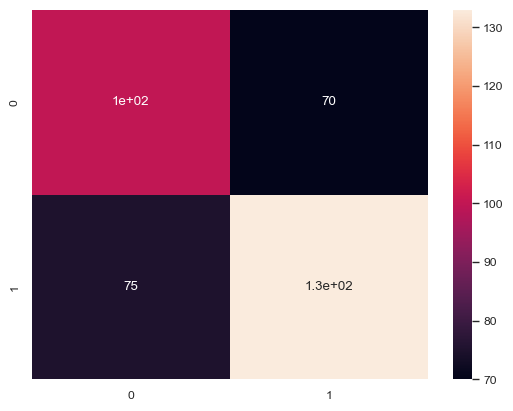

Negative AUC:  0.6506504524886878


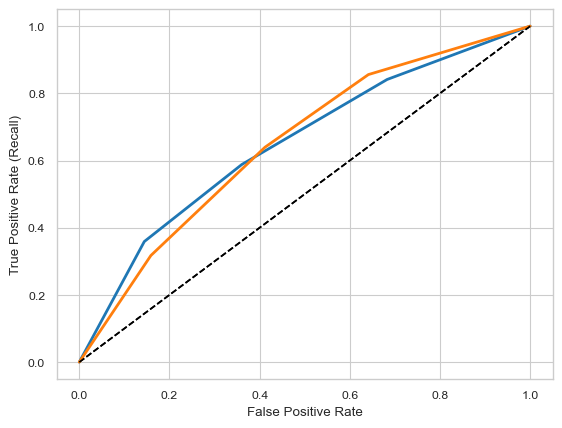

Positive AUC:  0.6506504524886878


56.09540636042403

In [135]:
print('Just Adj Close Feature')
alg(X_appl, y_appl, X_train_applb, X_test_applb, y_train_applb, y_test_applb, rfc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_appl, y_appl, X_train_applc, X_test_applc, y_train_applc, y_test_applc, rfc)

##### Tesla

Just Adj Close Feature
Sensitivity :  46.285714285714285
Specificity :  52.21674876847291
Accuracy Score:  47.03801945181256


              precision    recall  f1-score   support

    Negative       0.46      0.46      0.46       551
    Positive       0.48      0.48      0.48       580

    accuracy                           0.47      1131
   macro avg       0.47      0.47      0.47      1131
weighted avg       0.47      0.47      0.47      1131



Average of 10 cross validation of the accuracy score:  67.7841059602649


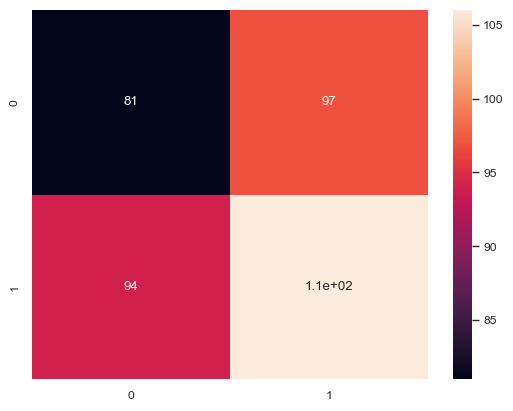

Negative AUC:  0.47835674157303365


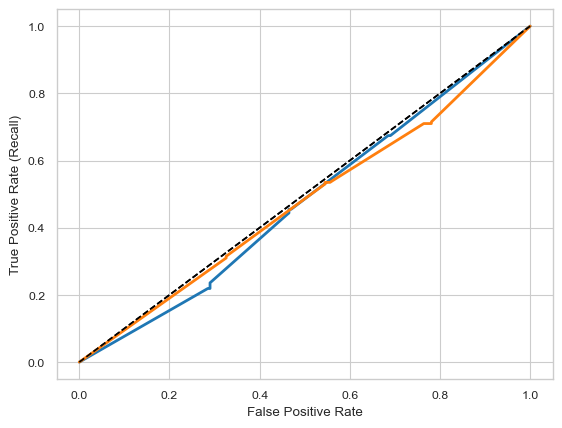

Positive AUC:  0.47835674157303365

Adj Close, Open, High, Low Features
Sensitivity :  66.31016042780749
Specificity :  71.72774869109948
Accuracy Score:  67.46242263483643


              precision    recall  f1-score   support

    Negative       0.67      0.65      0.66       551
    Positive       0.68      0.69      0.69       580

    accuracy                           0.67      1131
   macro avg       0.67      0.67      0.67      1131
weighted avg       0.67      0.67      0.67      1131



Average of 10 cross validation of the accuracy score:  67.7841059602649


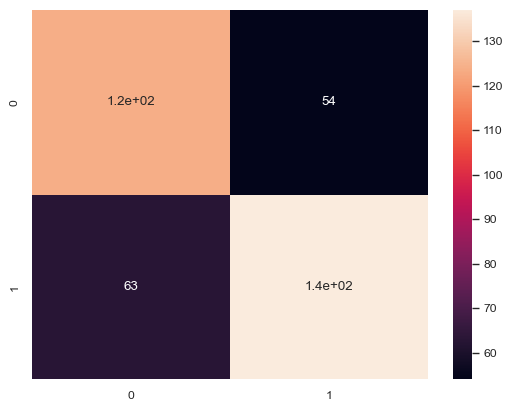

Negative AUC:  0.7285112359550563


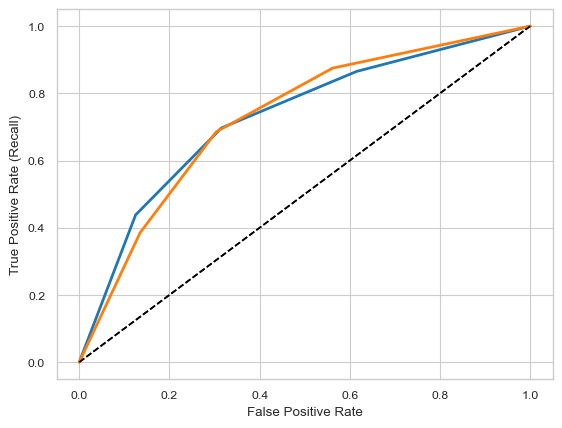

Positive AUC:  0.7285112359550562


67.46242263483643

In [136]:
print('Just Adj Close Feature')
alg(X_tsla, y_tsla, X_train_tslab, X_test_tslab, y_train_tslab, y_test_tslab, rfc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_tsla, y_tsla, X_train_tslac, X_test_tslac, y_train_tslac, y_test_tslac, rfc)


##### Amazon

Just Adj Close Feature
Sensitivity :  44.65408805031446
Specificity :  54.794520547945204
Accuracy Score:  51.90097259062776


              precision    recall  f1-score   support

    Negative       0.47      0.48      0.47       509
    Positive       0.56      0.55      0.56       622

    accuracy                           0.52      1131
   macro avg       0.52      0.52      0.52      1131
weighted avg       0.52      0.52      0.52      1131



Average of 10 cross validation of the accuracy score:  54.87019867549668


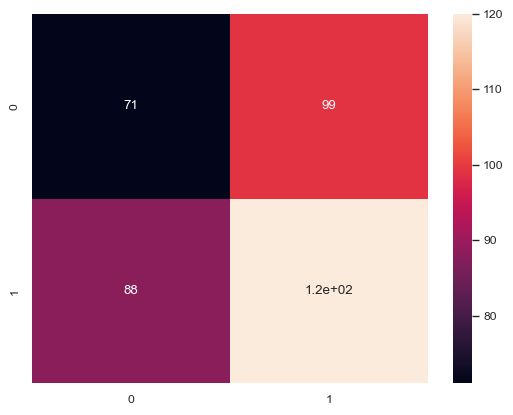

Negative AUC:  0.47936934389140273


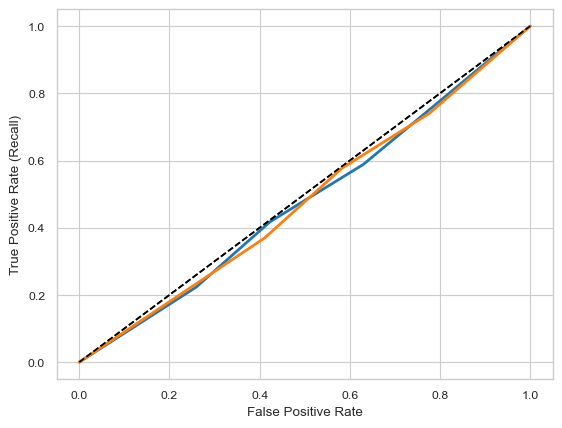

Positive AUC:  0.47936934389140273

Adj Close, Open, High, Low Features
Sensitivity :  62.913907284768214
Specificity :  66.96035242290749
Accuracy Score:  61.98054818744474


              precision    recall  f1-score   support

    Negative       0.58      0.57      0.57       509
    Positive       0.65      0.66      0.66       622

    accuracy                           0.62      1131
   macro avg       0.62      0.62      0.62      1131
weighted avg       0.62      0.62      0.62      1131



Average of 10 cross validation of the accuracy score:  54.87019867549668


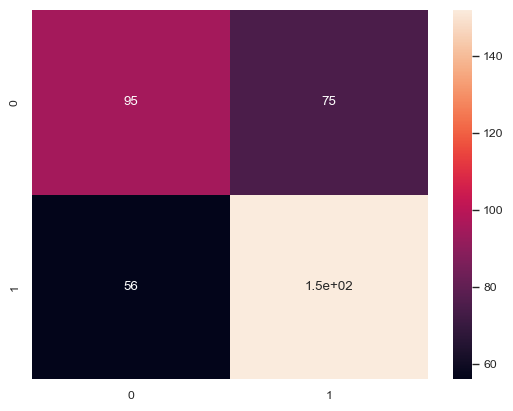

Negative AUC:  0.6750141402714933


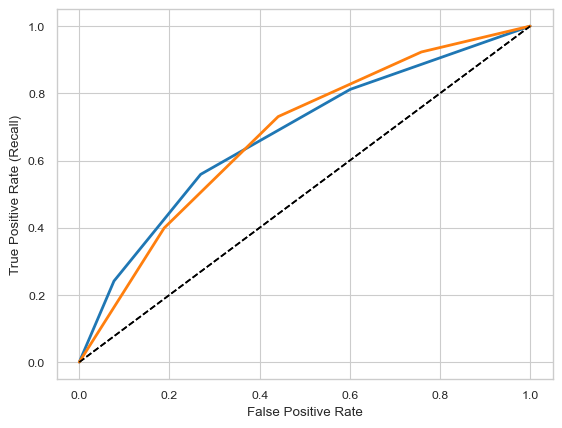

Positive AUC:  0.6750141402714932


61.98054818744474

In [137]:
print('Just Adj Close Feature')
alg(X_amzn, y_amzn, X_train_amznb, X_test_amznb, y_train_amznb, y_test_amznb, rfc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_amzn, y_amzn, X_train_amznc, X_test_amznc, y_train_amznc, y_test_amznc, rfc)


##### Goog

Just Adj Close Feature
Sensitivity :  46.58385093167702
Specificity :  58.525345622119815
Accuracy Score:  49.07161803713528


              precision    recall  f1-score   support

    Negative       0.46      0.45      0.45       532
    Positive       0.52      0.53      0.52       599

    accuracy                           0.49      1131
   macro avg       0.49      0.49      0.49      1131
weighted avg       0.49      0.49      0.49      1131



Average of 10 cross validation of the accuracy score:  62.35761589403973


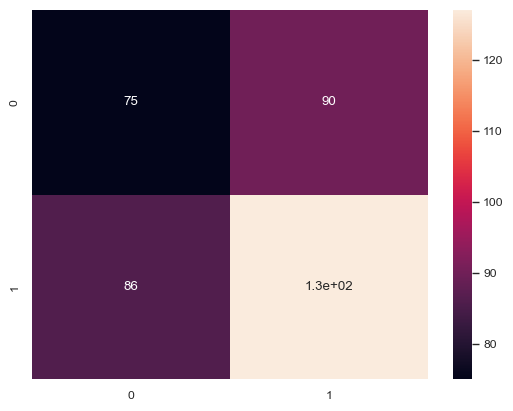

Negative AUC:  0.5367477592829706


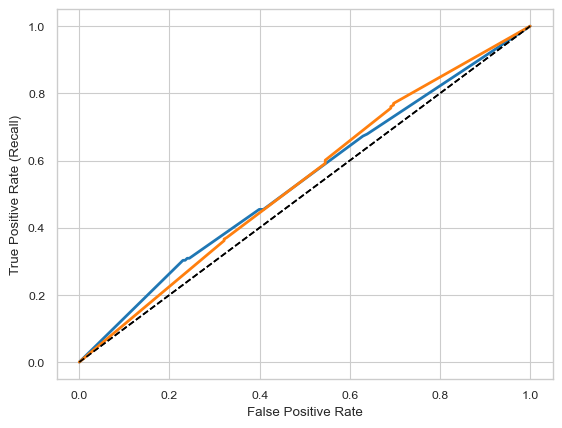

Positive AUC:  0.5367619860577607

Adj Close, Open, High, Low Features
Sensitivity :  59.2391304347826
Specificity :  71.1340206185567
Accuracy Score:  65.25198938992042


              precision    recall  f1-score   support

    Negative       0.63      0.63      0.63       532
    Positive       0.67      0.67      0.67       599

    accuracy                           0.65      1131
   macro avg       0.65      0.65      0.65      1131
weighted avg       0.65      0.65      0.65      1131



Average of 10 cross validation of the accuracy score:  62.35761589403973


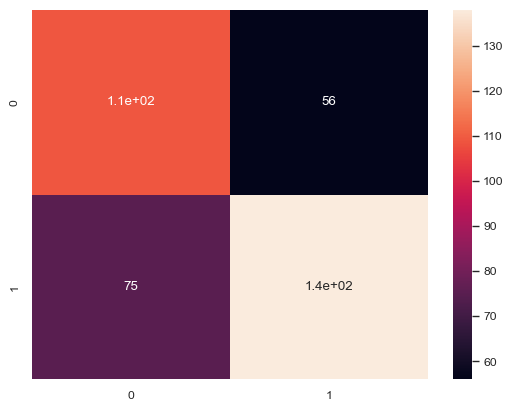

Negative AUC:  0.7020913358941528


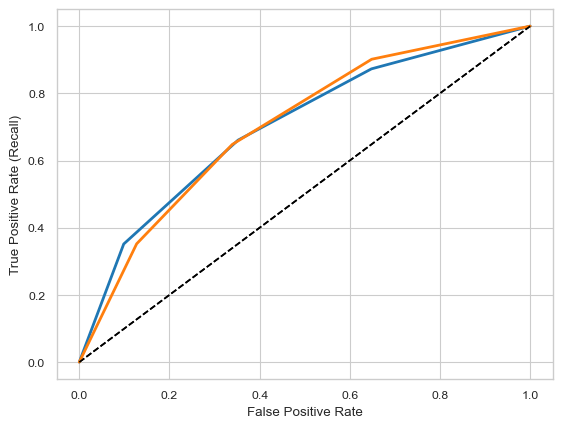

Positive AUC:  0.702091335894153


65.25198938992042

In [138]:
print('Just Adj Close Feature')
alg(X_goog, y_goog, X_train_googb, X_test_googb, y_train_googb, y_test_googb, rfc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_goog, y_goog, X_train_googc, X_test_googc, y_train_googc, y_test_googc, rfc)

##### Googl


Just Adj Close Feature
Sensitivity :  45.94594594594595
Specificity :  56.476683937823836
Accuracy Score:  48.894783377542


              precision    recall  f1-score   support

    Negative       0.46      0.46      0.46       532
    Positive       0.52      0.51      0.51       599

    accuracy                           0.49      1131
   macro avg       0.49      0.49      0.49      1131
weighted avg       0.49      0.49      0.49      1131



Average of 10 cross validation of the accuracy score:  63.54790286975718


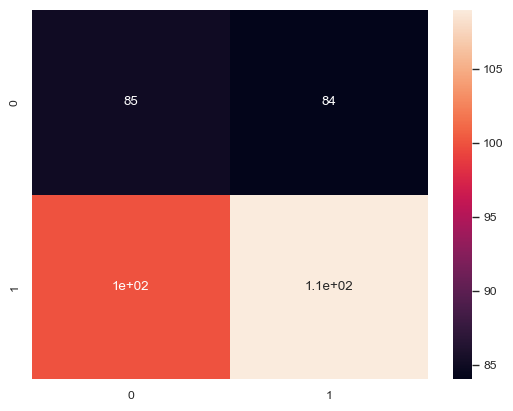

Negative AUC:  0.491520625123864


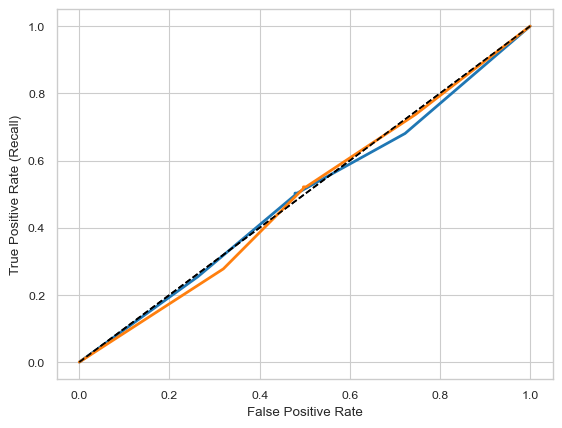

Positive AUC:  0.49152062512386396

Adj Close, Open, High, Low Features
Sensitivity :  61.904761904761905
Specificity :  69.04761904761905
Accuracy Score:  65.60565870910699


              precision    recall  f1-score   support

    Negative       0.64      0.63      0.63       532
    Positive       0.67      0.68      0.68       599

    accuracy                           0.66      1131
   macro avg       0.65      0.65      0.65      1131
weighted avg       0.66      0.66      0.66      1131



Average of 10 cross validation of the accuracy score:  63.54790286975718


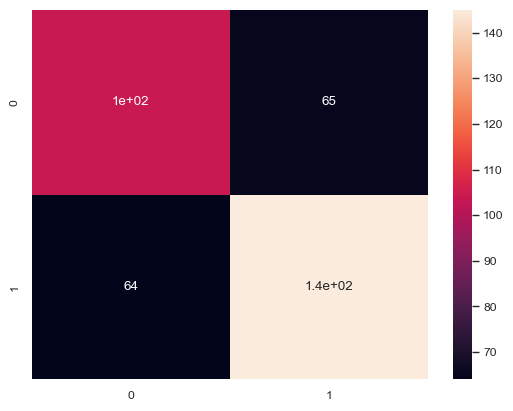

Negative AUC:  0.6665015146796524


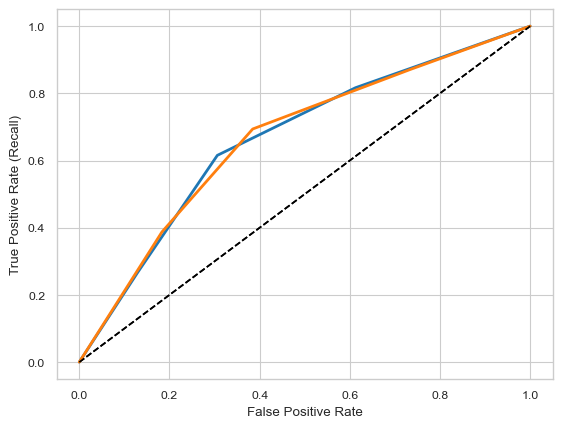

Positive AUC:  0.6665015146796524


65.60565870910699

In [139]:
print('Just Adj Close Feature')
alg(X_googl, y_googl, X_train_googlb, X_test_googlb, y_train_googlb, y_test_googlb, rfc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_googl, y_googl, X_train_googlc, X_test_googlc, y_train_googlc, y_test_googlc, rfc)


# Twitter and Sentiment Analysis

## EDA

In [140]:
filepath_companytweets = os.path.join(pwd, 'Company_Tweet.csv')
print(filepath_companytweets)
filepath_company = os.path.join(pwd, 'Company.csv')
print(filepath_company)
filepath_Tweet = os.path.join(pwd, 'Tweet.csv')
print(filepath_Tweet)

df_companytweets = pd.read_csv(filepath_companytweets)
df_company = pd.read_csv(filepath_company)
df_tweet = pd.read_csv(filepath_Tweet)

c:\Users\harsh\OneDrive\Desktop\Using Tweets to predict Stock Movement\Company_Tweet.csv
c:\Users\harsh\OneDrive\Desktop\Using Tweets to predict Stock Movement\Company.csv
c:\Users\harsh\OneDrive\Desktop\Using Tweets to predict Stock Movement\Tweet.csv


In [141]:
tweets = pd.merge(df_companytweets, df_tweet, on='tweet_id', how='inner')
tweets.head()

tweet_id ticker_symbol      writer   post_date  \
0  550803612197457920          AAPL  SentiQuant  1420156789   
1  550803612197457920          AMZN  SentiQuant  1420156789   
2  550803610825928706          AAPL  SentiQuant  1420156788   
3  550803610825928706         GOOGL  SentiQuant  1420156788   
4  550803610825928706          AMZN  SentiQuant  1420156788   

                                                body  comment_num  \
0  #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
1  #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
2  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
3  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
4  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   

   retweet_num  like_num  
0            0         1  
1            0         1  
2            0         1  
3            0         1  
4            0         1

In [142]:
tweets.describe()

tweet_id     post_date   comment_num   retweet_num      like_num
count  4.336445e+06  4.336445e+06  4.336445e+06  4.336445e+06  4.336445e+06
mean   8.834282e+17  1.499461e+09  2.923863e-01  6.347647e-01  2.103625e+00
std    1.927735e+17  4.596080e+07  1.885788e+00  6.986371e+00  1.371744e+01
min    5.504415e+17  1.420070e+09  0.000000e+00  0.000000e+00  0.000000e+00
25%    7.185450e+17  1.460149e+09  0.000000e+00  0.000000e+00  0.000000e+00
50%    8.825934e+17  1.499262e+09  0.000000e+00  0.000000e+00  0.000000e+00
75%    1.054776e+18  1.540313e+09  0.000000e+00  0.000000e+00  1.000000e+00
max    1.212160e+18  1.577837e+09  6.310000e+02  9.990000e+02  9.990000e+02

In [143]:
tweets.shape

(4336445, 8)

In [144]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 8 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   tweet_id       int64 
 1   ticker_symbol  object
 2   writer         object
 3   post_date      int64 
 4   body           object
 5   comment_num    int64 
 6   retweet_num    int64 
 7   like_num       int64 
dtypes: int64(5), object(3)
memory usage: 297.8+ MB


In [145]:
tweets.dtypes

tweet_id          int64
ticker_symbol    object
writer           object
post_date         int64
body             object
comment_num       int64
retweet_num       int64
like_num          int64
dtype: object

In [146]:
tweets.isnull().sum()

tweet_id             0
ticker_symbol        0
writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
dtype: int64

In [147]:
tweets.columns

Index(['tweet_id', 'ticker_symbol', 'writer', 'post_date', 'body',
       'comment_num', 'retweet_num', 'like_num'],
      dtype='object')

In [148]:
tweets['Date'] = pd.to_datetime(tweets['post_date'], unit='s').dt.strftime('%Y-%m-%d')
tweets = tweets.drop(columns=['post_date'], axis=1)

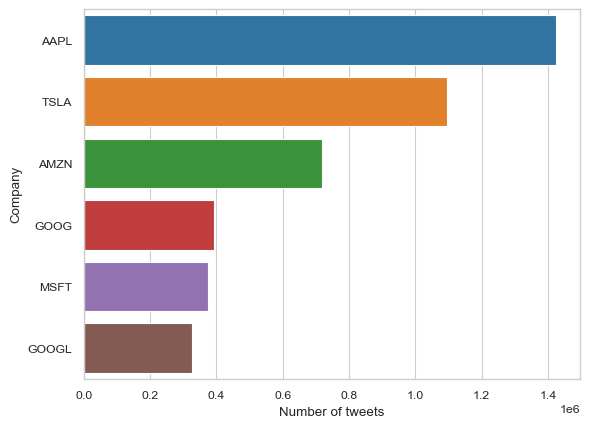

In [149]:
tweets_for_each_company = tweets['ticker_symbol'].value_counts()

sns.barplot(y=tweets_for_each_company.index, x=tweets_for_each_company.values)
plt.xlabel('Number of tweets')
plt.ylabel('Company')
plt.show()

In [150]:
influenceval = 100
tweets['engagement'] = tweets['comment_num'] + tweets['retweet_num'] + tweets['like_num']
engaged_tweets = tweets.copy()

## Sentiment Analysis

### Performing sentiment analysis

In [151]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def getSentiment(body):
    assert body is not None
    vs = analyzer.polarity_scores(body)
    score = vs['compound']
    return score

engaged_tweets['Sentiment'] = engaged_tweets['body'].apply(lambda x: getSentiment(x))

In [152]:
engaged_tweets.head()

tweet_id ticker_symbol      writer  \
0  550803612197457920          AAPL  SentiQuant   
1  550803612197457920          AMZN  SentiQuant   
2  550803610825928706          AAPL  SentiQuant   
3  550803610825928706         GOOGL  SentiQuant   
4  550803610825928706          AMZN  SentiQuant   

                                                body  comment_num  \
0  #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
1  #TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...            0   
2  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
3  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   
4  #SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...            0   

   retweet_num  like_num        Date  engagement  Sentiment  
0            0         1  2015-01-01           1        0.0  
1            0         1  2015-01-01           1        0.0  
2            0         1  2015-01-01           1        0.0  
3            0         1  2015-01-01           1        0.0  
4            0         1  2015-01-01           1        0.0

In [153]:
engaged_tweets = engaged_tweets.drop(columns=['comment_num', 'retweet_num', 'like_num',  'writer', 'tweet_id', 'body'], axis=1)
engaged_tweets.head()

ticker_symbol        Date  engagement  Sentiment
0          AAPL  2015-01-01           1        0.0
1          AMZN  2015-01-01           1        0.0
2          AAPL  2015-01-01           1        0.0
3         GOOGL  2015-01-01           1        0.0
4          AMZN  2015-01-01           1        0.0

### Seperating tweets into smaller databases based on their ticker symbol

In [154]:
ticker_symbols = engaged_tweets['ticker_symbol'].unique()

In [155]:
engaged_tweets['Date'] = pd.to_datetime(engaged_tweets['Date'])

In [156]:
symbols = engaged_tweets.groupby(['ticker_symbol'])
tesla_tweets = symbols.get_group('TSLA')
appl_tweets = symbols.get_group('AAPL')
amzn_tweets = symbols.get_group('AMZN')
googl_tweets = symbols.get_group('GOOGL')
goog_tweets = symbols.get_group('GOOG')

### Calculating average and total sentiment and engagement

In [157]:
# calculating the average sentiment and engagment as well as the total 
# for the both for each day
def avg_and_total_sent_and_eng(df):
    df['avg_day_sent'] = (df['Sentiment'].groupby(df['Date']).transform('sum'))/df['Sentiment'].groupby(df['Date']).transform(len)
    df['total_sent'] = df['Sentiment'].groupby(df['Date']).transform('sum')
    df['avg_eng'] = (df['engagement'].groupby(df['Date']).transform('sum'))/df['engagement'].groupby(df['Date']).transform(len)
    df['total_eng'] = df['engagement'].groupby(df['Date']).transform('sum')
    return df

In [158]:
appl_tweets = avg_and_total_sent_and_eng(appl_tweets)
tesla_tweets = avg_and_total_sent_and_eng(tesla_tweets)
amzn_tweets = avg_and_total_sent_and_eng(amzn_tweets)
googl_tweets = avg_and_total_sent_and_eng(googl_tweets)
goog_tweets = avg_and_total_sent_and_eng(goog_tweets)

C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\3578465947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg_day_sent'] = (df['Sentiment'].groupby(df['Date']).transform('sum'))/df['Sentiment'].groupby(df['Date']).transform(len)
C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\3578465947.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sent'] = df['Sentiment'].groupby(df['Date']).transform('sum')
C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\3578465947.py:6: SettingWithCopyWarni

### Removing duplicate dates

In [159]:
def remove_duplicate_dates(df):
    tweets_copy = df.copy()
    tweets_copy['Date'] = pd.to_datetime(tweets_copy["Date"])
    tweets_copy = tweets_copy.drop_duplicates('Date')
    tweets_copy.set_index('Date', inplace=True)
    tweets_copy = tweets_copy.drop(columns=['engagement', 'Sentiment'], axis=1)
    return tweets_copy

In [160]:
appl_tweets_copy = remove_duplicate_dates(appl_tweets)
tesla_tweets_copy = remove_duplicate_dates(tesla_tweets)
amzn_tweets_copy = remove_duplicate_dates(amzn_tweets)
googl_tweets_copy = remove_duplicate_dates(googl_tweets)
goog_tweets_copy = remove_duplicate_dates(goog_tweets)

In [161]:
appl_tweets_copy.head()

ticker_symbol  avg_day_sent  total_sent   avg_eng  total_eng
Date                                                                   
2015-01-01          AAPL      0.137738     41.1838  5.682274       1699
2015-01-02          AAPL      0.086860     75.3080  2.737024       2373
2015-01-03          AAPL      0.235195     81.3773  0.809249        280
2015-01-04          AAPL      0.225879     91.7067  1.766010        717
2015-01-05          AAPL      0.143393    164.4715  1.003487       1151

### Classification of the sentiment

In [162]:
def classifySentiment(score):
    if score > 0.1:
        return 'positive'
    else:
        return 'negative'

    return score

def get_sentiment_class(df):
    df['sent_class'] = df['avg_day_sent'].apply(lambda x: classifySentiment(x))
    return df

appl_tweets = get_sentiment_class(appl_tweets_copy)
tesla_tweets = get_sentiment_class(tesla_tweets_copy)
amzn_tweets = get_sentiment_class(amzn_tweets_copy)
googl_tweets = get_sentiment_class(googl_tweets_copy)
goog_tweets = get_sentiment_class(goog_tweets_copy)

##### Counting the amount of positive, negative and neutral tweets there are

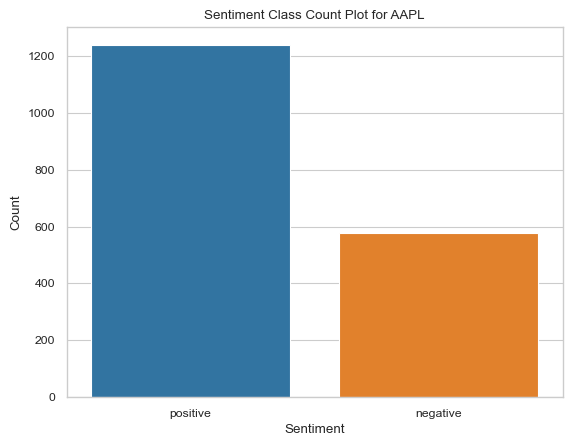

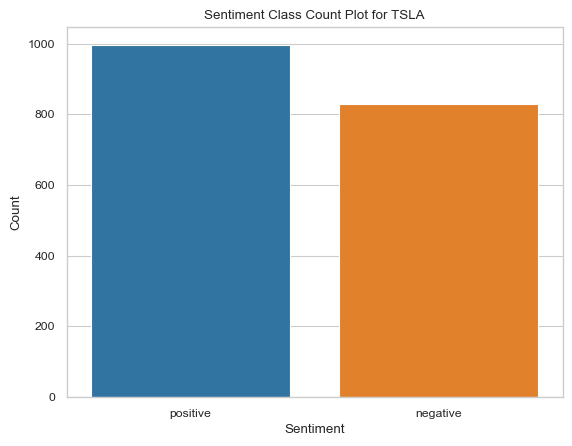

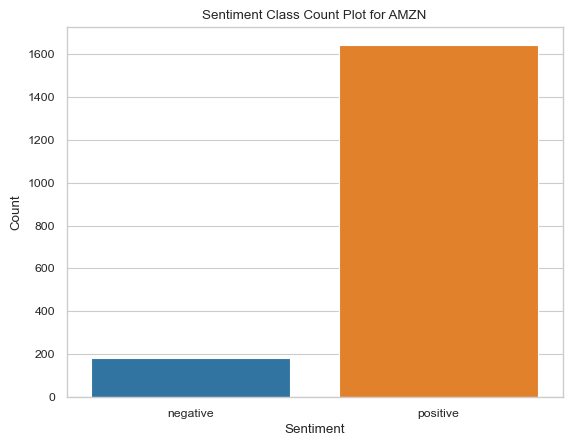

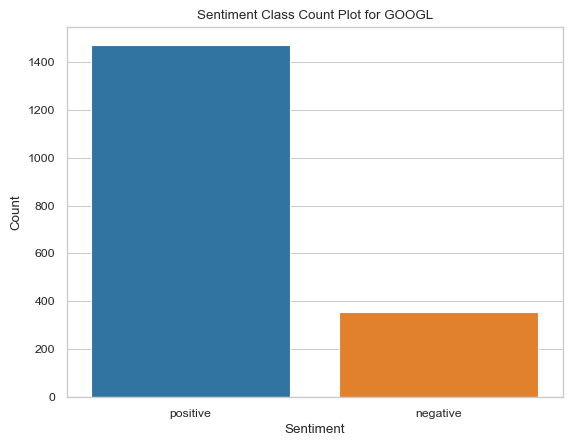

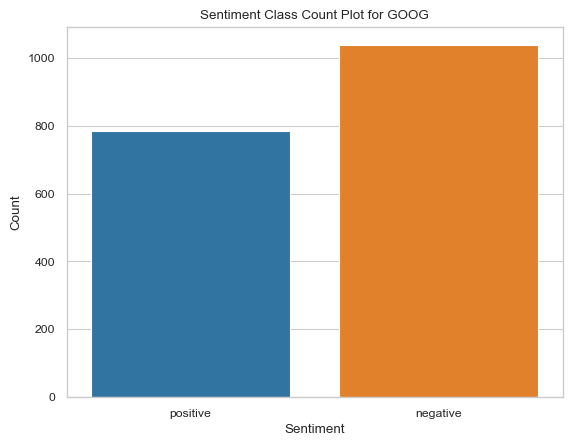

In [163]:
# make a count plot for the amount of positive, negative and neutral tweets
def countplot_for_sentclass(df):
    sns.set_style('whitegrid')
    sns.set_context('paper')
    sns.countplot(x='sent_class', data=df)
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Sentiment Class Count Plot for ' + df['ticker_symbol'].unique()[0])
    plt.show()

countplot_for_sentclass(appl_tweets)
countplot_for_sentclass(tesla_tweets)
countplot_for_sentclass(amzn_tweets)
countplot_for_sentclass(googl_tweets)
countplot_for_sentclass(goog_tweets)


### Total and Average Engagement

In [164]:
import plotly.express as px

def total_sent_chart(df):
    plt.figure(figsize=(30,10))
    df['total_sent'].plot()
    plt.title('Total sentiment over time for ' + df['ticker_symbol'].unique()[0], fontdict={'fontsize': '20'})
    plt.show()

def avg_sent_chart(df):
    plt.figure(figsize=(30,10))
    df['avg_day_sent'].plot()
    plt.title('Average sentiment over time for ' + df['ticker_symbol'].unique()[0], fontdict={'fontsize': '20'})
    plt.show()

def total_eng_chart(df):
    plt.figure(figsize=(30,10))
    df['total_eng'].plot()
    plt.title('Total engagement over time for ' + df['ticker_symbol'].unique()[0], fontdict={'fontsize': '20'})
    plt.show()

def avg_eng_chart(df):
    plt.figure(figsize=(30,10))
    df['avg_eng'].plot()
    plt.title('Average engagement over time for ' + df['ticker_symbol'].unique()[0], fontdict={'fontsize': '20'})
    plt.show()

#### Apple

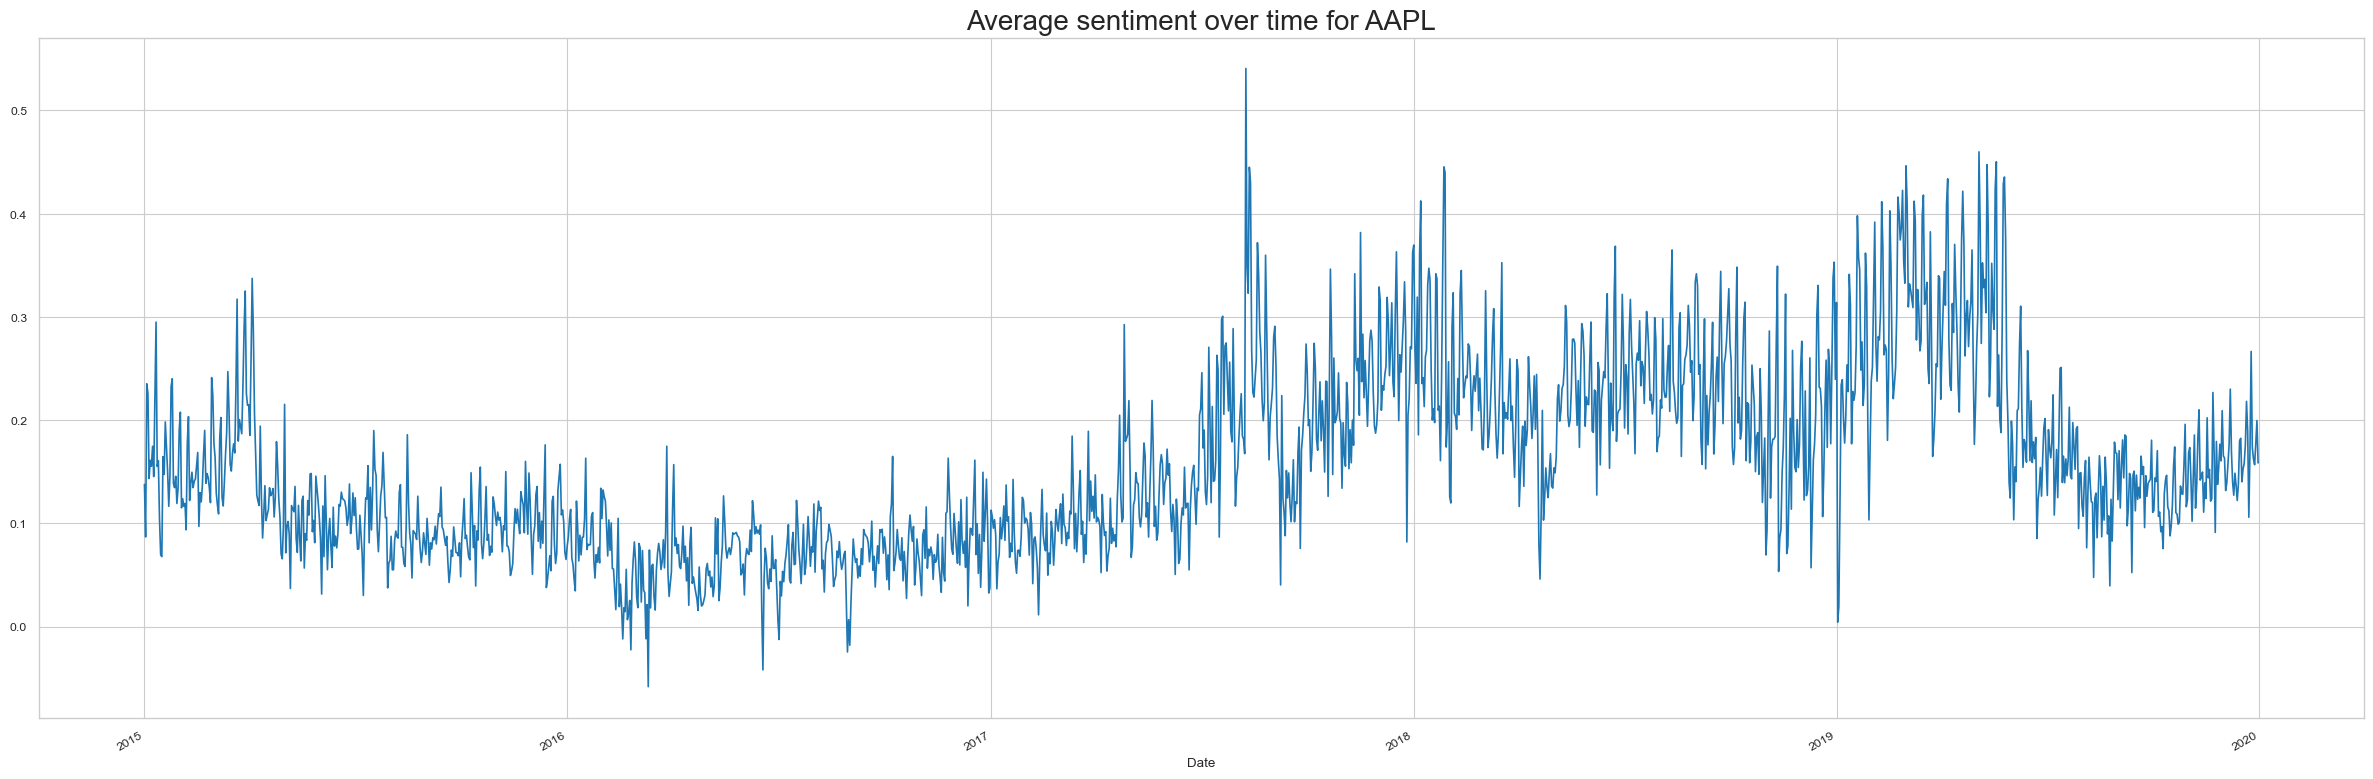

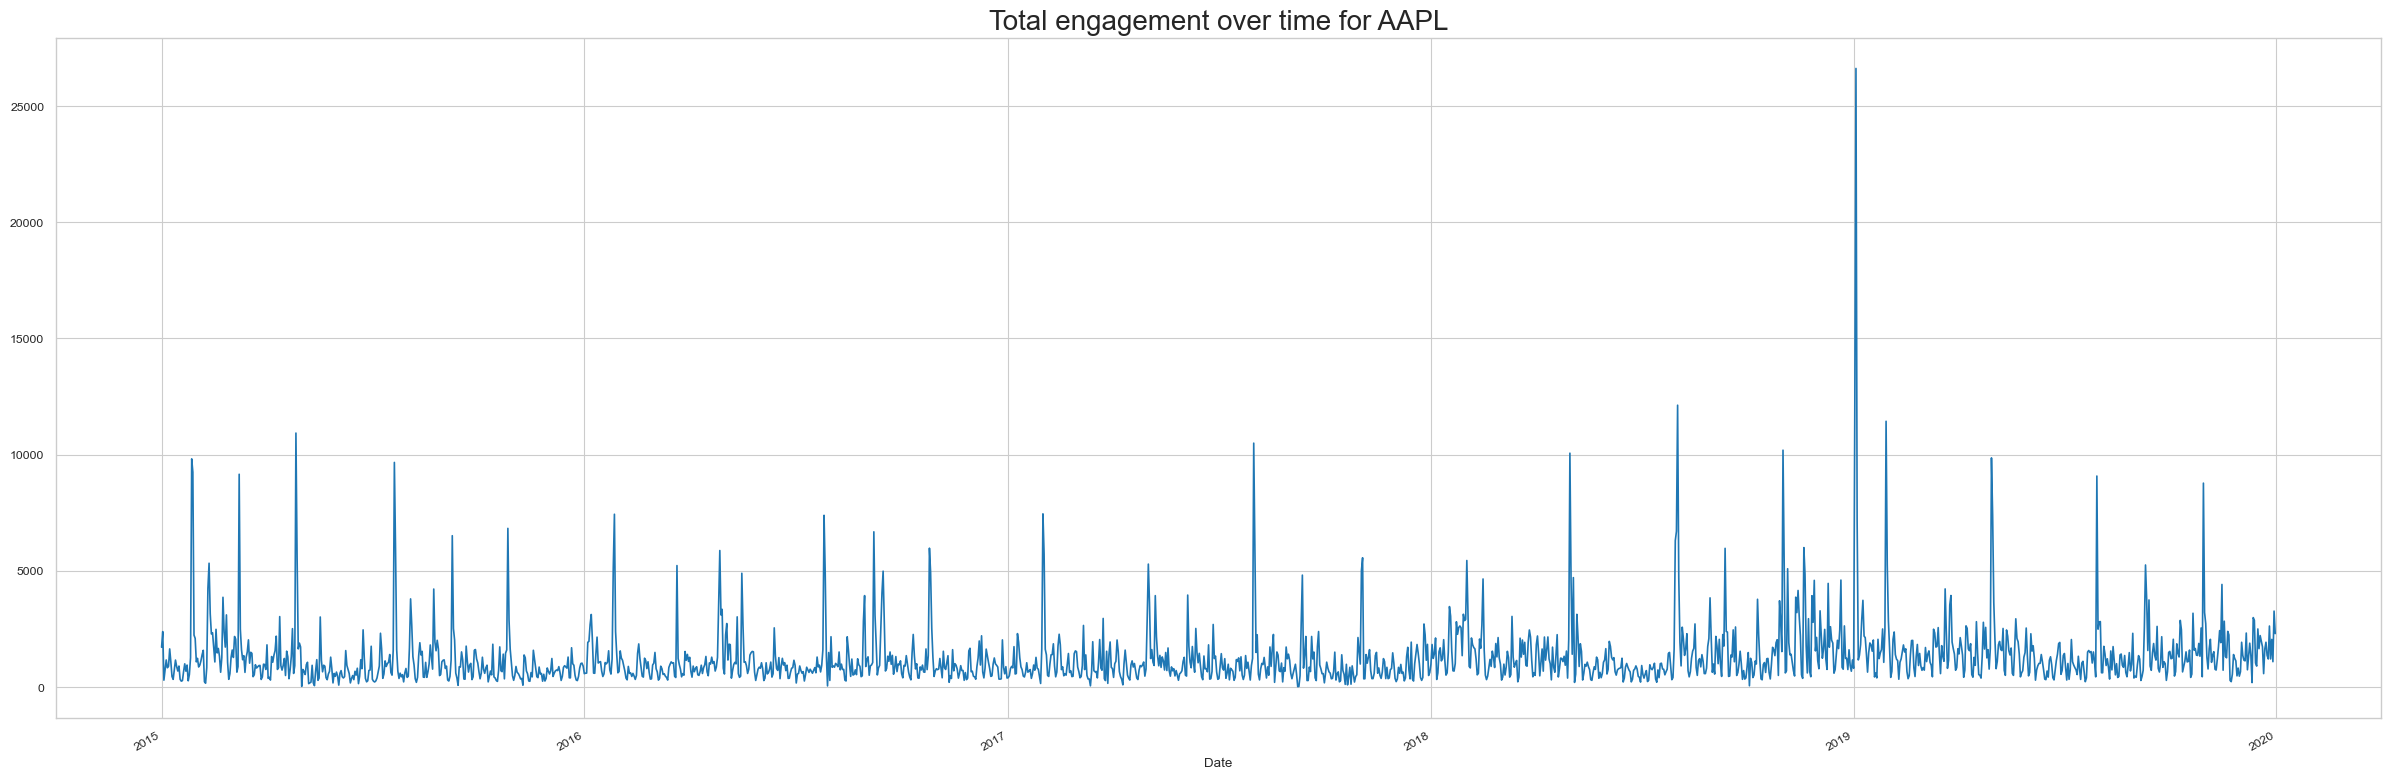

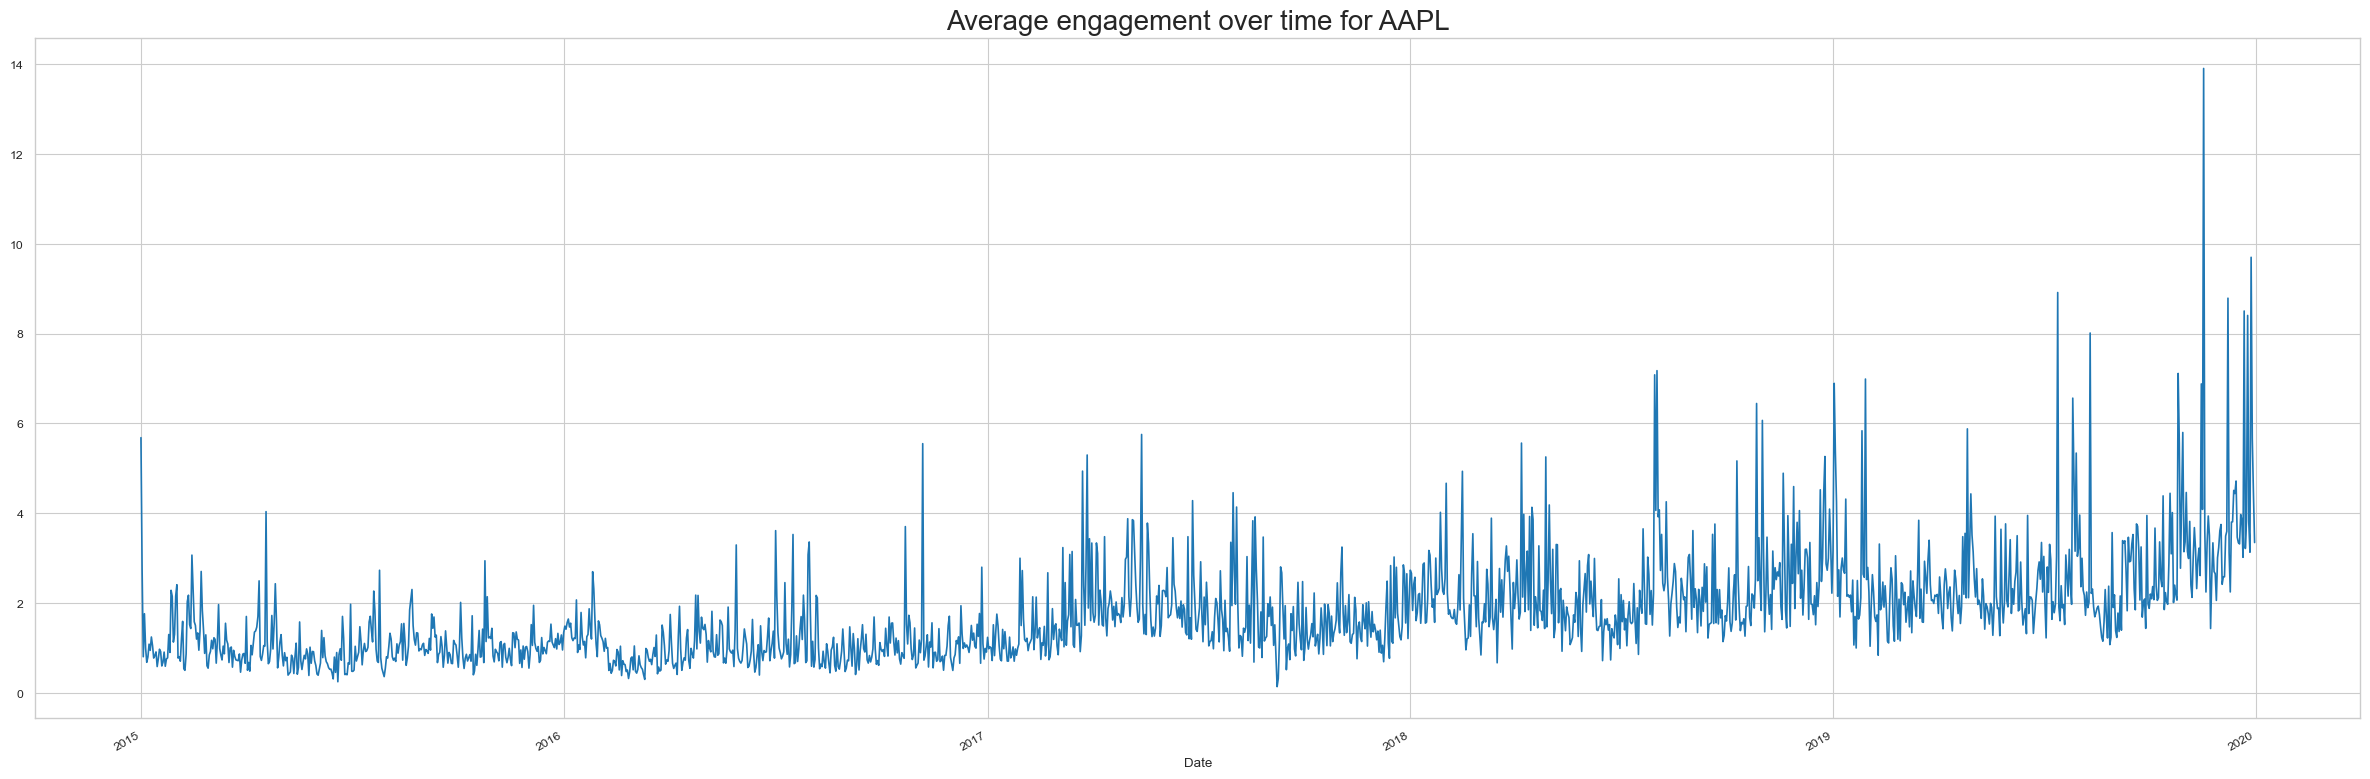

In [165]:
# total_sent_chart(appl_tweets) 
avg_sent_chart(appl_tweets)
total_eng_chart(appl_tweets)
avg_eng_chart(appl_tweets)

#### Tesla

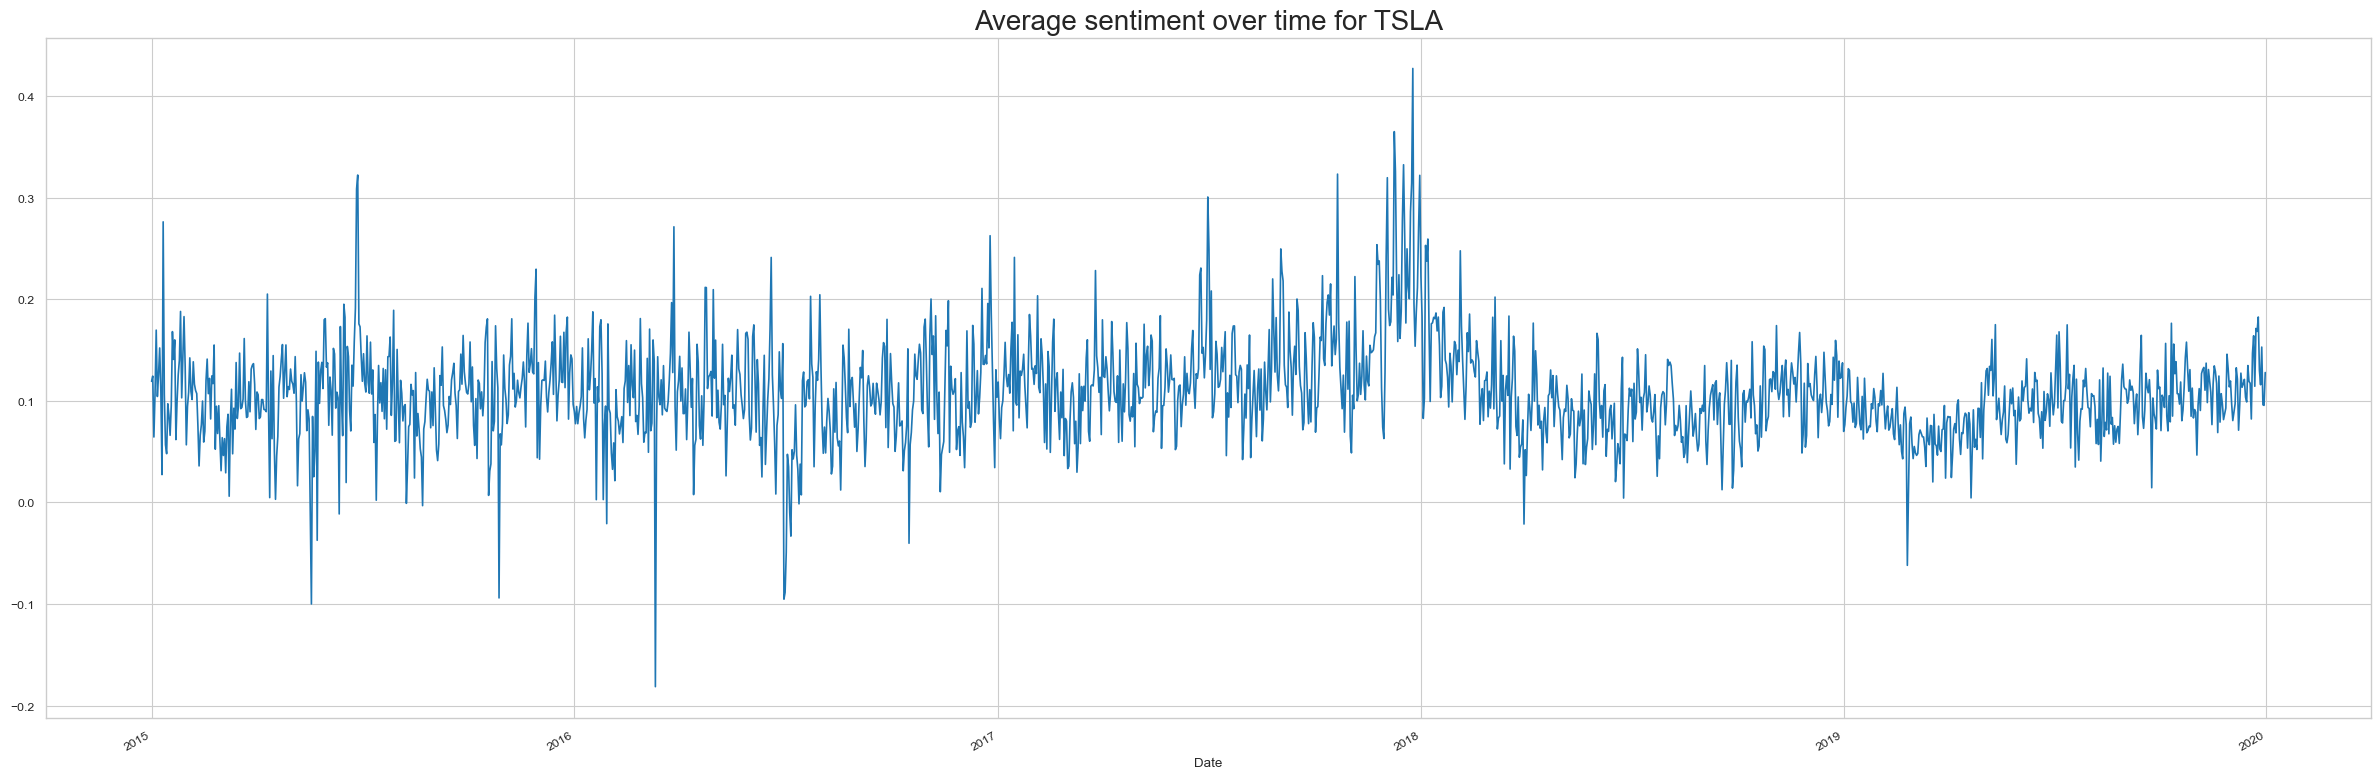

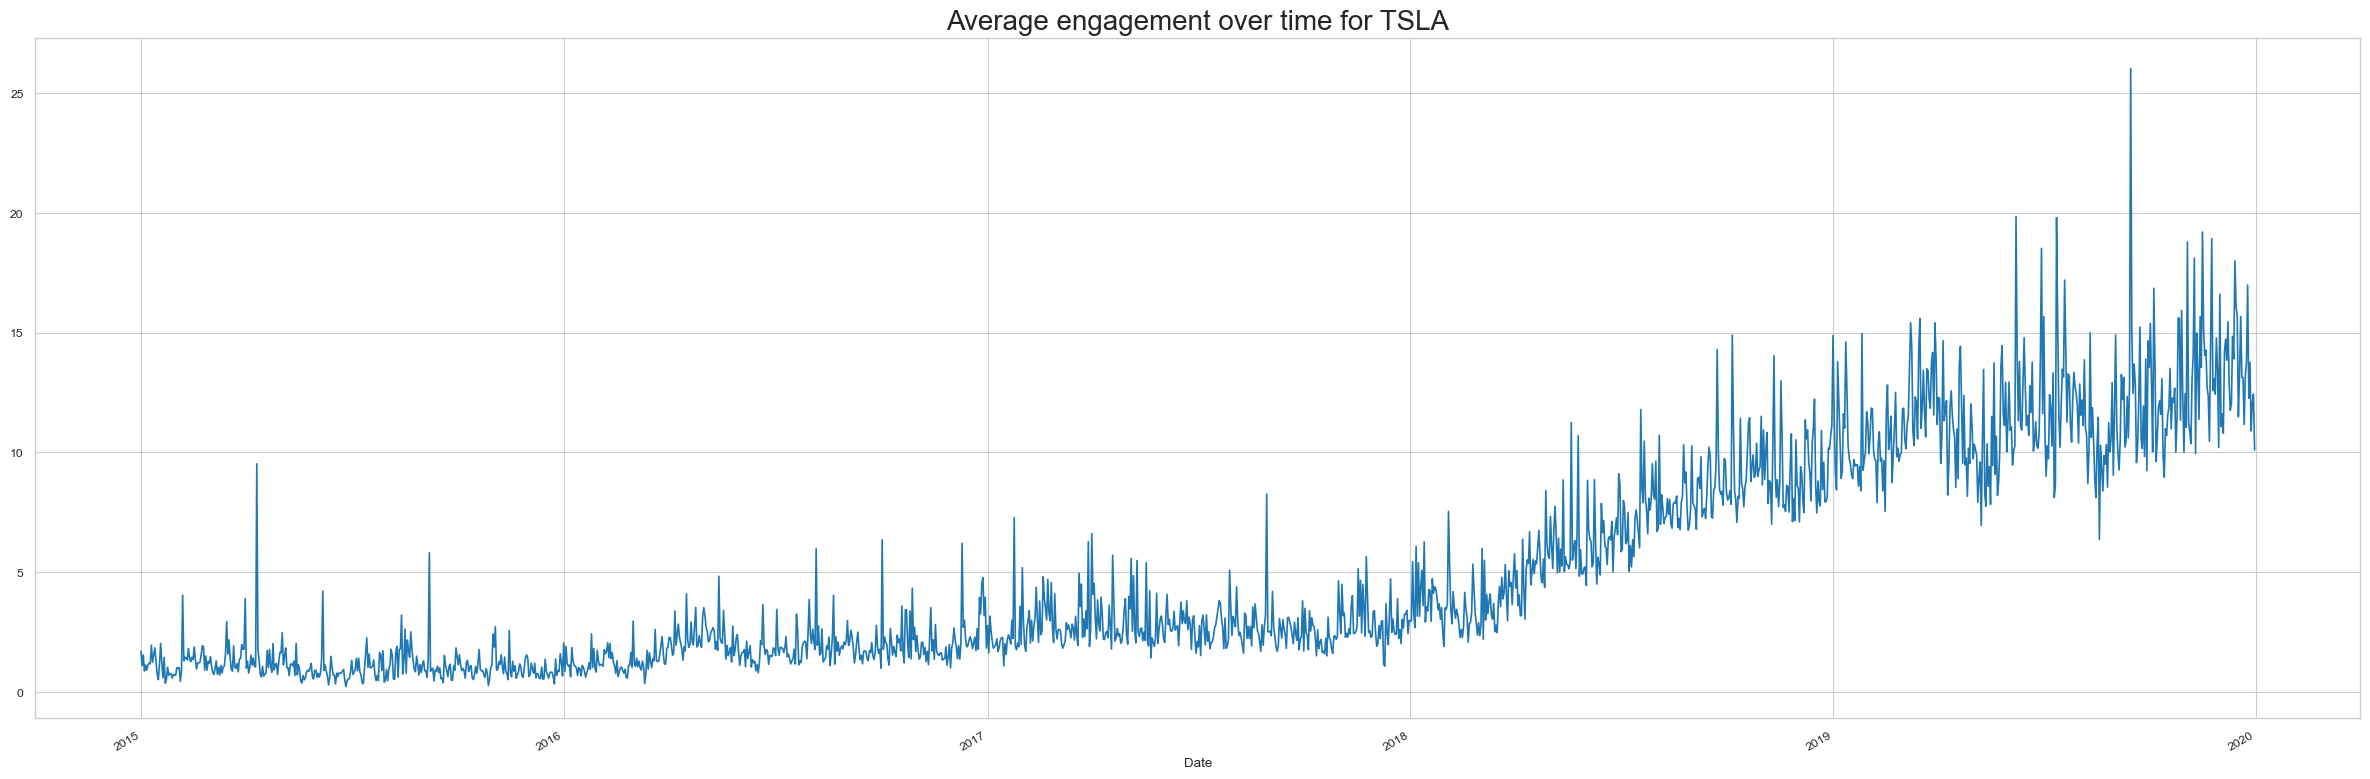

In [166]:
# total_sent_chart(tesla_tweets)
avg_sent_chart(tesla_tweets)
# total_eng_chart(tesla_tweets)
avg_eng_chart(tesla_tweets)

#### Amazon

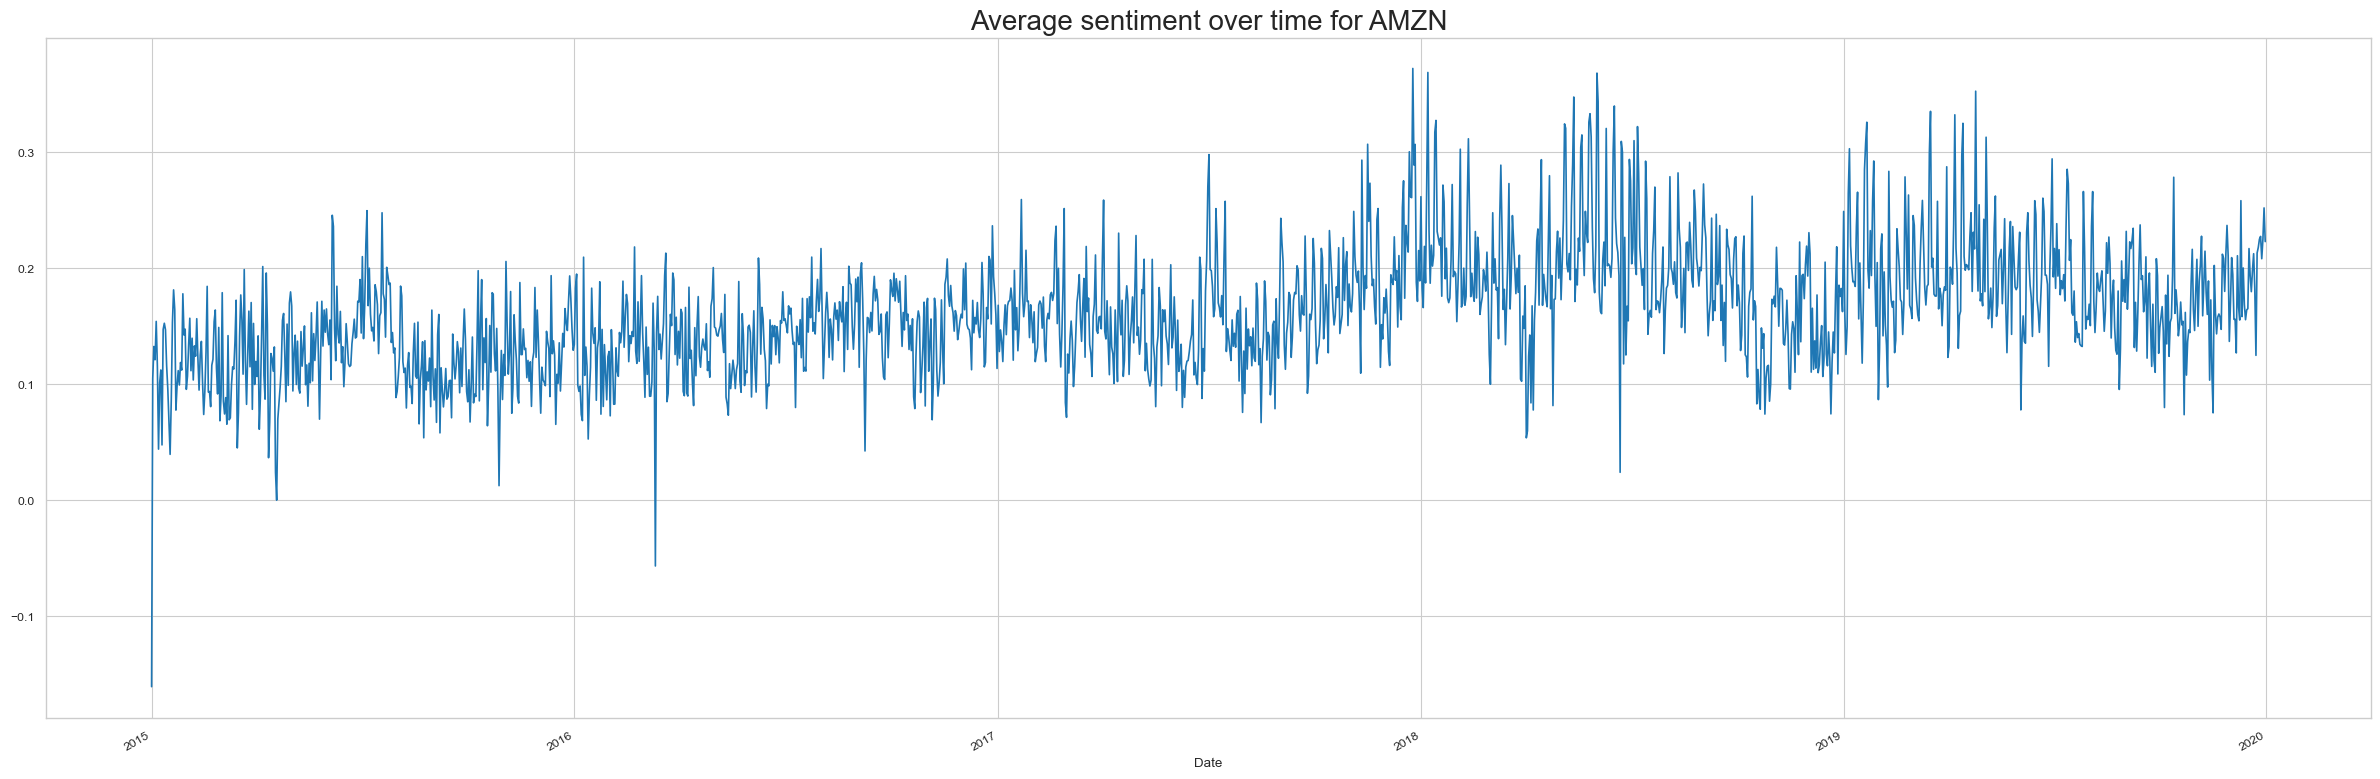

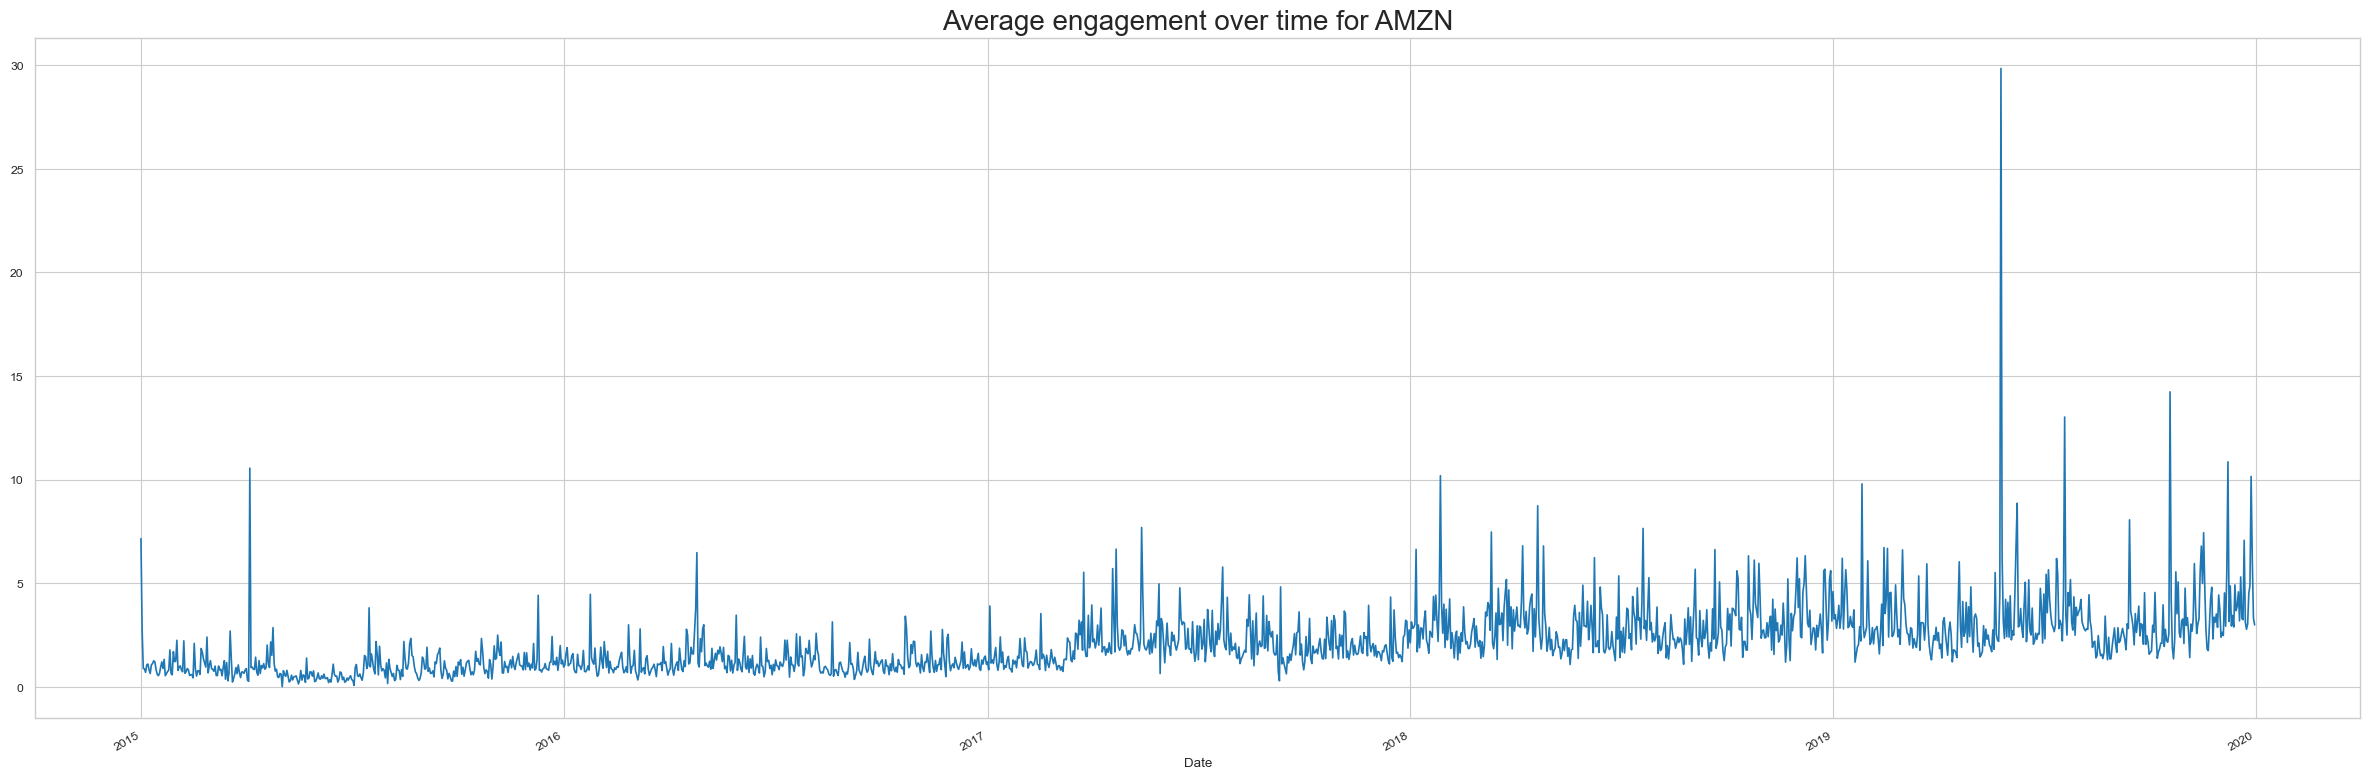

In [167]:
# total_sent_chart(amzn_tweets)
avg_sent_chart(amzn_tweets)
# total_eng_chart(amzn_tweets)
avg_eng_chart(amzn_tweets)

#### Googl

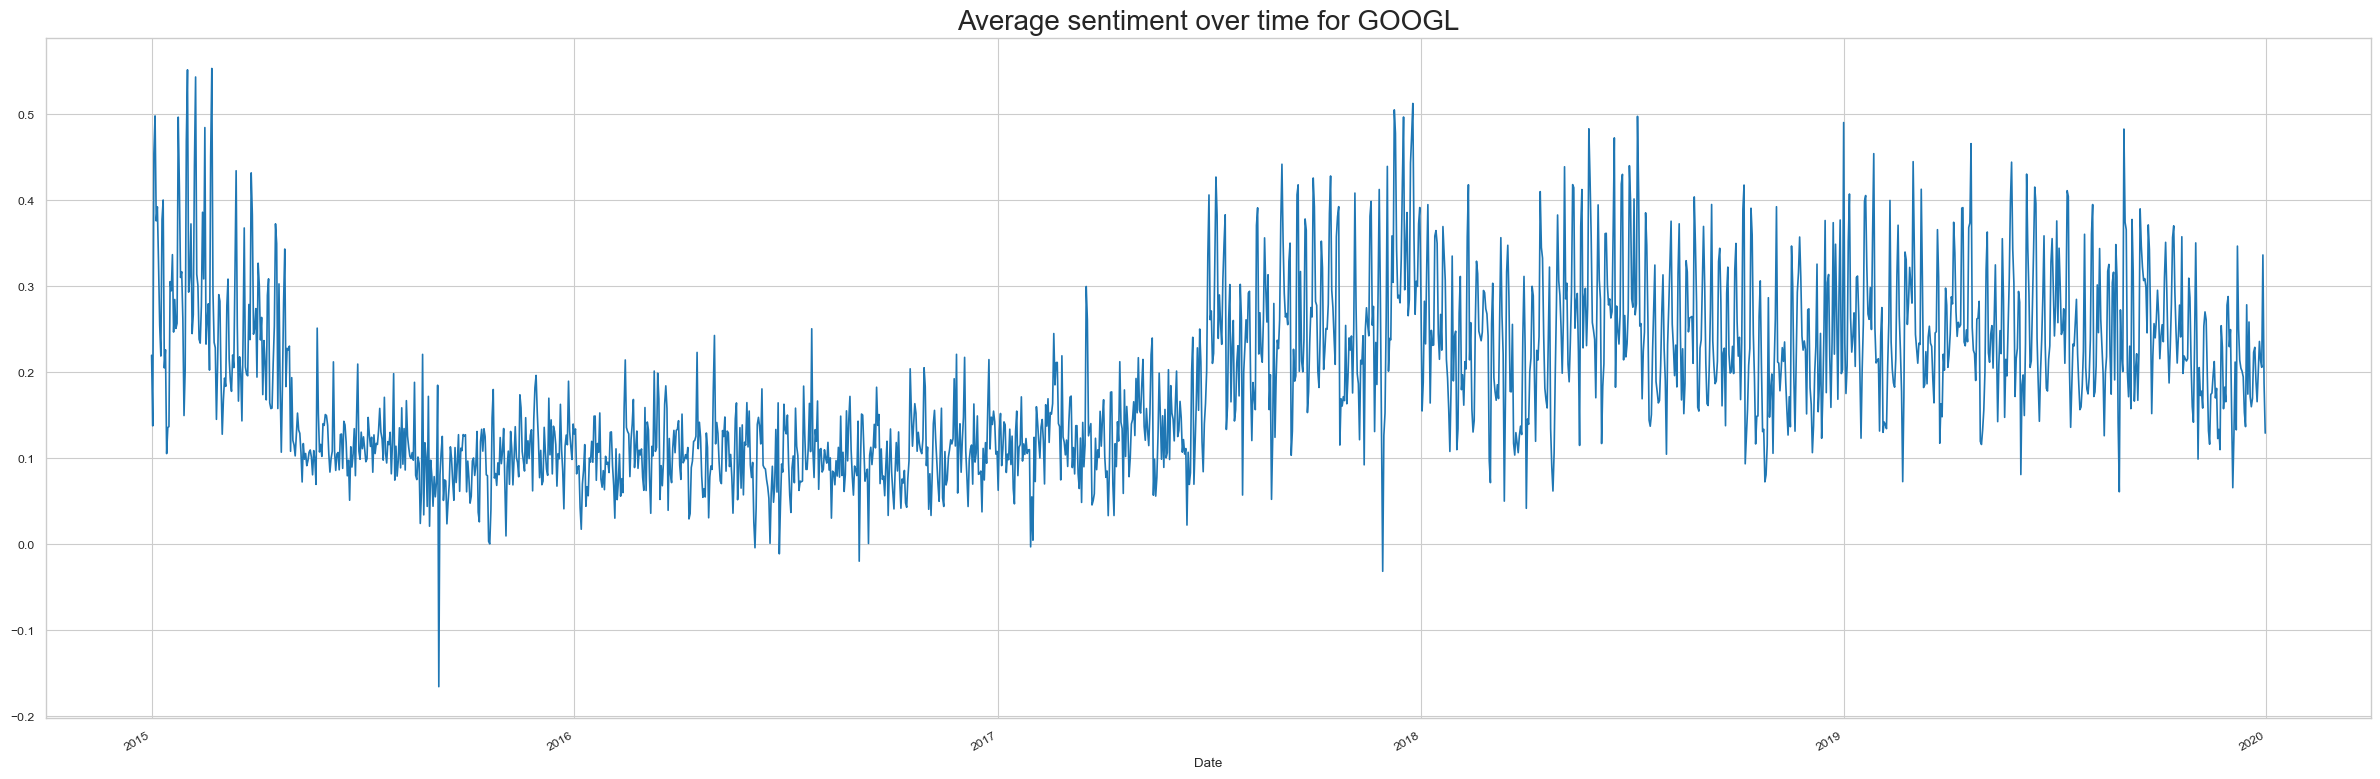

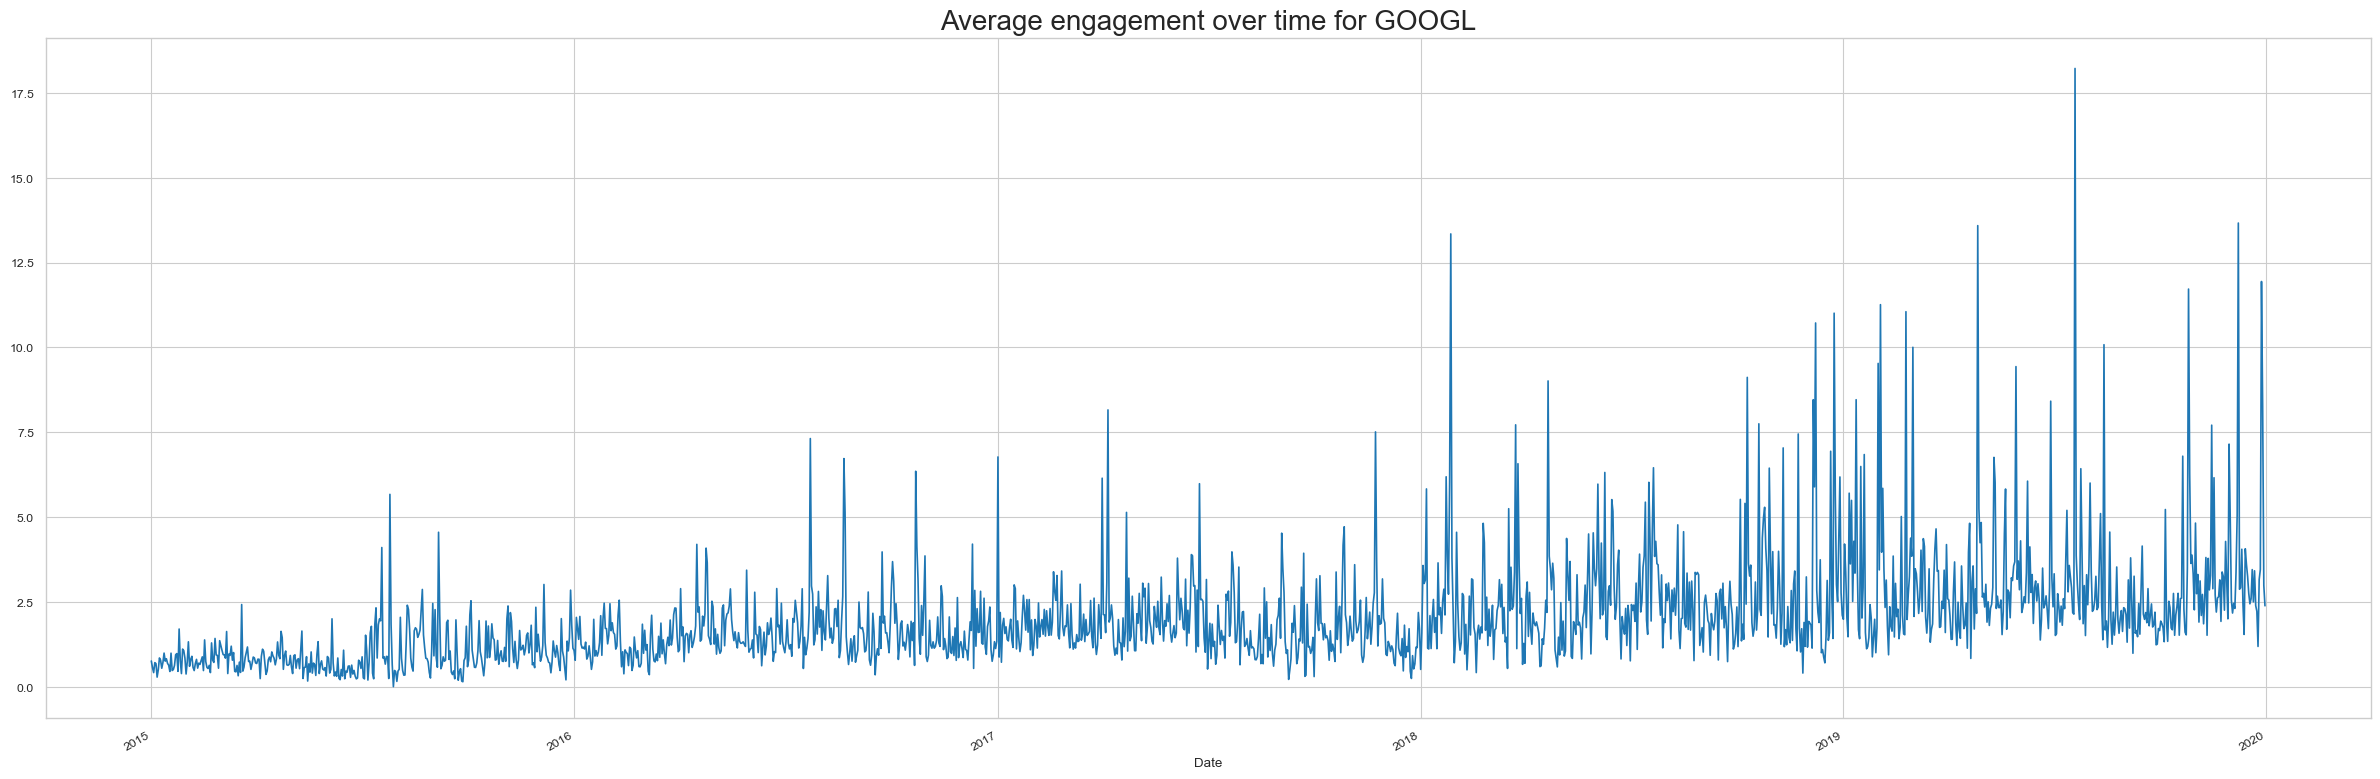

In [168]:
# total_sent_chart(googl_tweets)
avg_sent_chart(googl_tweets)
# total_eng_chart(googl_tweets)
avg_eng_chart(googl_tweets)

#### Goog

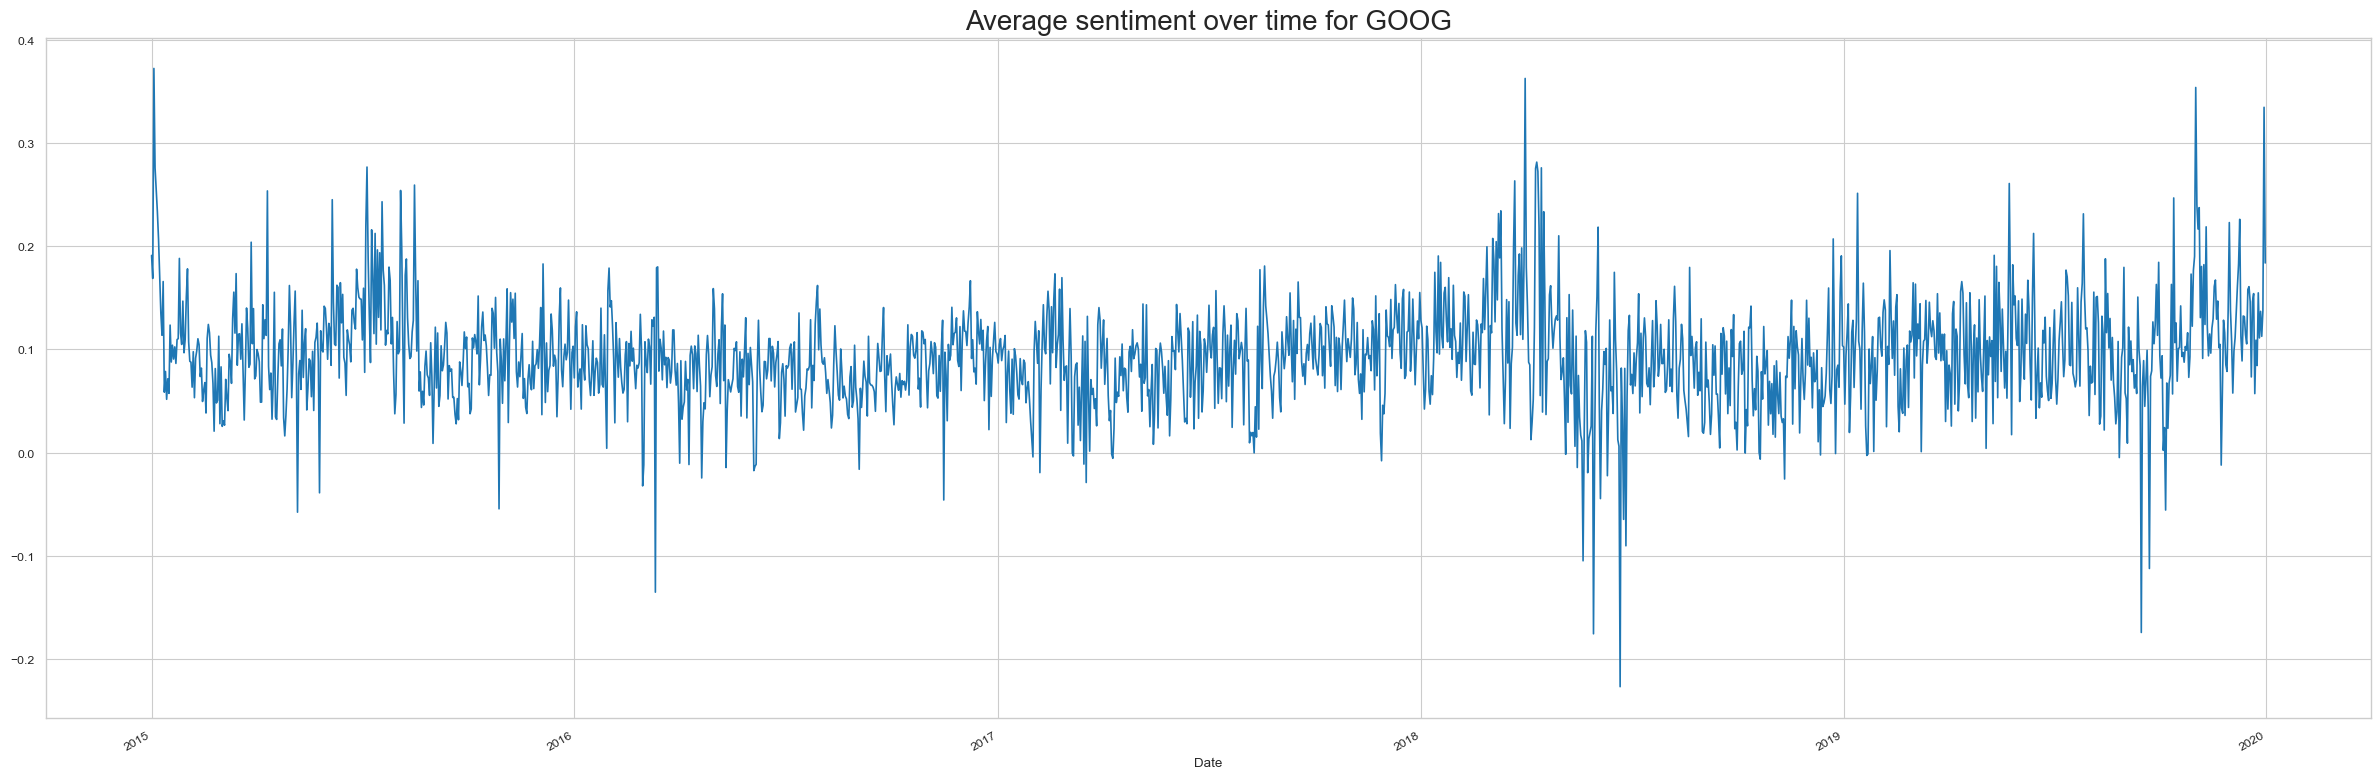

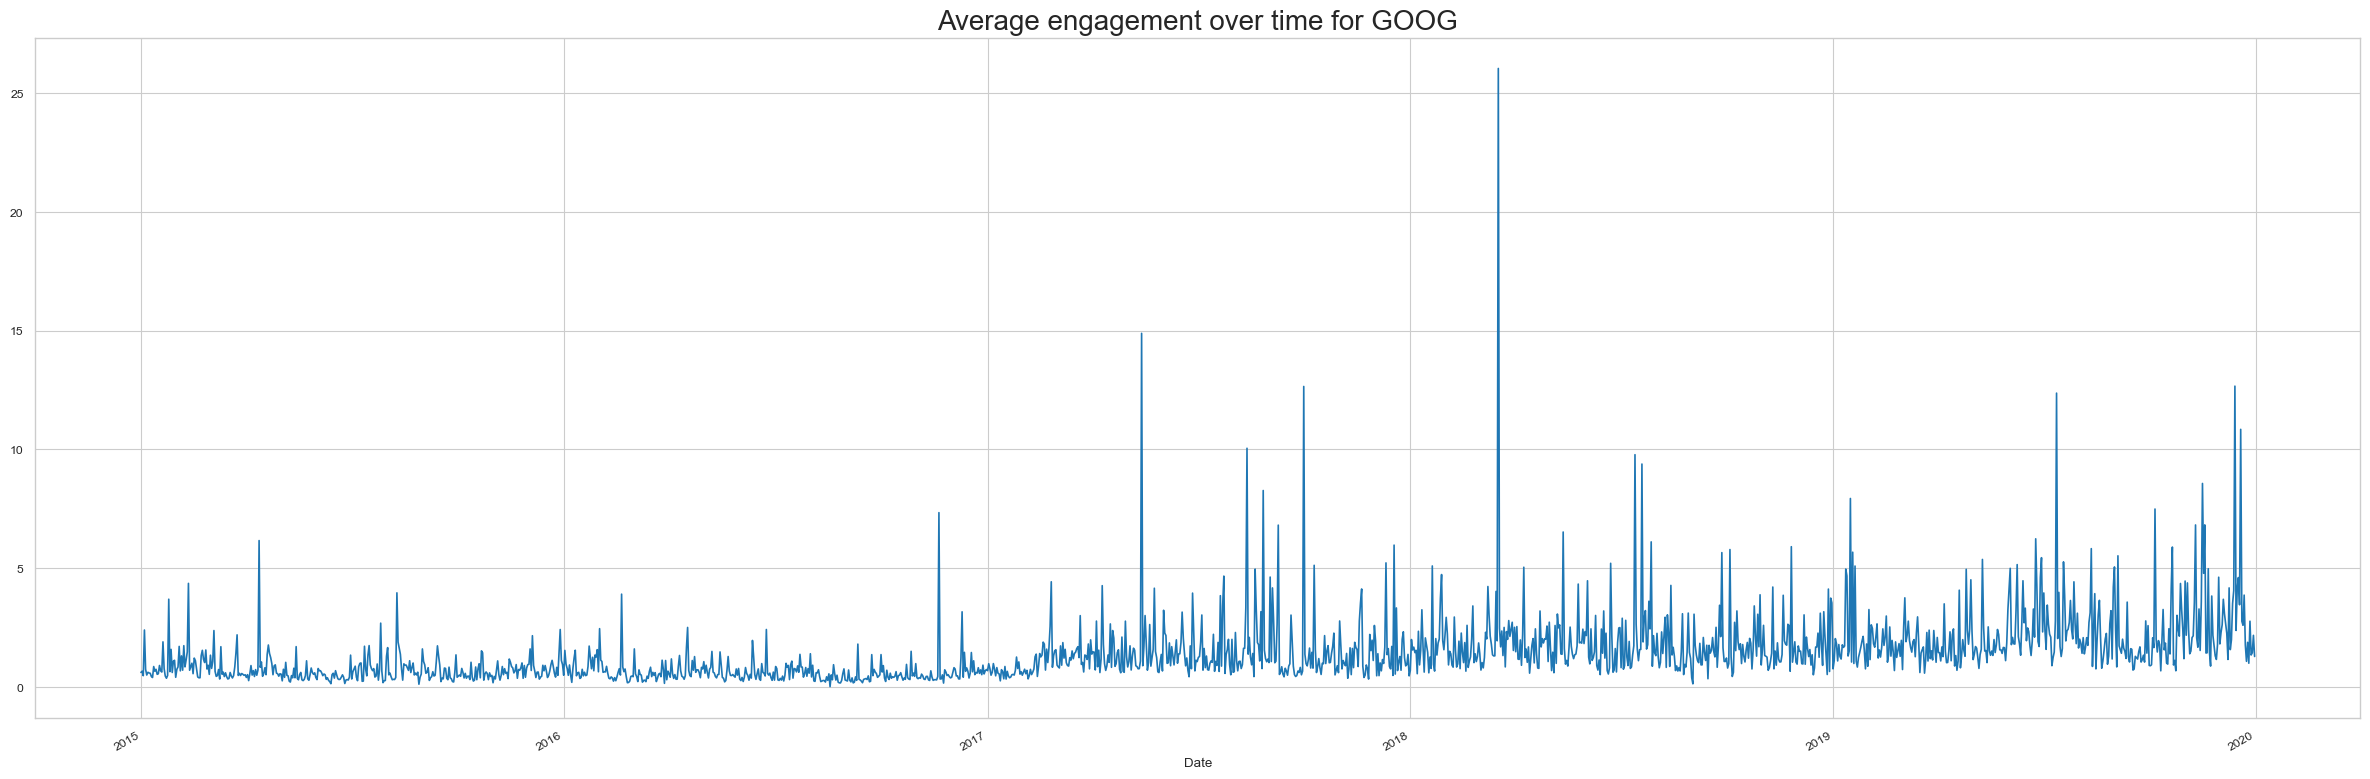

In [169]:
# total_sent_chart(goog_tweets)
avg_sent_chart(goog_tweets)
# total_eng_chart(goog_tweets)
avg_eng_chart(goog_tweets)

In [170]:
appl_tweets.nunique()

ticker_symbol       1
avg_day_sent     1819
total_sent       1819
avg_eng          1807
total_eng        1268
sent_class          2
dtype: int64

## Machine Learning with the sentiment analysis

### Joining Datasets

In [171]:
appl_tweets = resetIndex_and_changeDateType(appl_tweets)
tesla_tweets = resetIndex_and_changeDateType(tesla_tweets)
amzn_tweets = resetIndex_and_changeDateType(amzn_tweets)
googl_tweets = resetIndex_and_changeDateType(googl_tweets)
goog_tweets = resetIndex_and_changeDateType(goog_tweets)
#

In [172]:
df_appl = pd.merge(aapl, appl_tweets, on='Date')
df_tsla = pd.merge(tsla, tesla_tweets, on='Date')
df_amzn = pd.merge(amzn, amzn_tweets, on='Date')
df_goog = pd.merge(goog, goog_tweets, on='Date')
df_googl = pd.merge(googl, googl_tweets, on='Date')

In [173]:
df_appl.head()

Date       Open       High        Low      Close  Adj Close  \
0 2015-01-02  27.847500  27.860001  26.837500  27.332500  24.746000   
1 2015-01-05  27.072500  27.162500  26.352501  26.562500  24.048864   
2 2015-01-06  26.635000  26.857500  26.157499  26.565001  24.051125   
3 2015-01-07  26.799999  27.049999  26.674999  26.937500  24.388378   
4 2015-01-08  27.307501  28.037500  27.174999  27.972500  25.325432   

      Volume  prevClose    change    upDown ticker_symbol  avg_day_sent  \
0  212818400        NaN       NaN  Negative          AAPL      0.086860   
1  257142000  24.746000 -0.028172  Negative          AAPL      0.143393   
2  263188400  24.048864  0.000094  Positive          AAPL      0.161076   
3  160423600  24.051125  0.014022  Positive          AAPL      0.155337   
4  237458000  24.388378  0.038422  Positive          AAPL      0.174654   

   total_sent   avg_eng  total_eng sent_class  
0     75.3080  2.737024       2373   negative  
1    164.4715  1.003487       1151   positive  
2    191.6800  0.684874        815   positive  
3    169.9391  0.803473        879   positive  
4    261.1078  1.088294       1627   positive

C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\3401804343.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_appl.corr(), annot=True)


<AxesSubplot: >

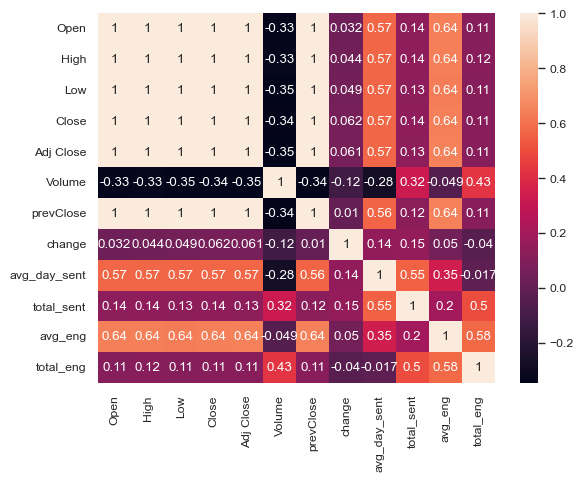

In [174]:
import seaborn as sns
sns.heatmap(df_appl.corr(), annot=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4093762728.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_tsla.corr(), annot=True)


<AxesSubplot: >

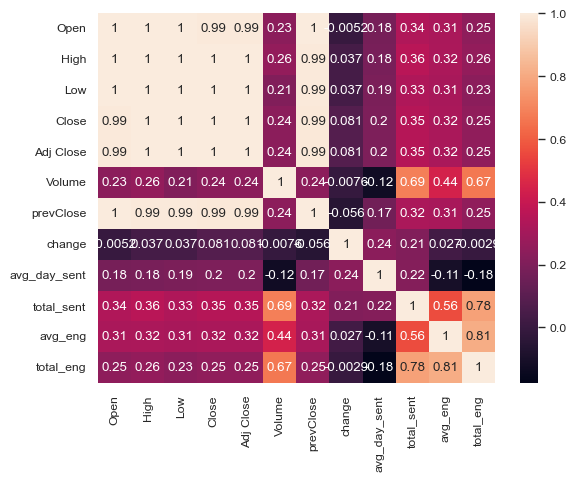

In [175]:
sns.heatmap(df_tsla.corr(), annot=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4050994262.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_amzn.corr(), annot=True)


<AxesSubplot: >

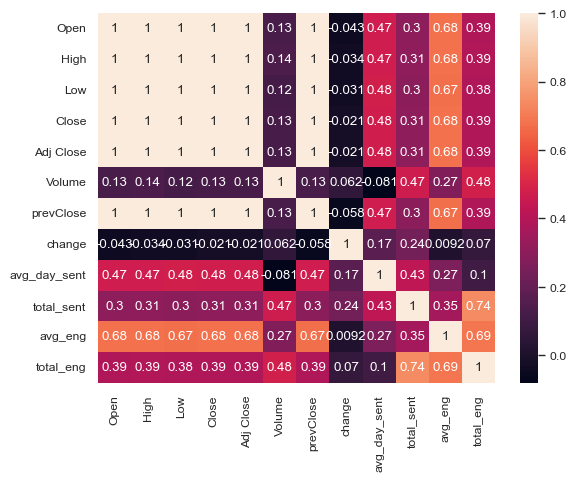

In [176]:
sns.heatmap(df_amzn.corr(), annot=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\2807144851.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_goog.corr(), annot=True)


<AxesSubplot: >

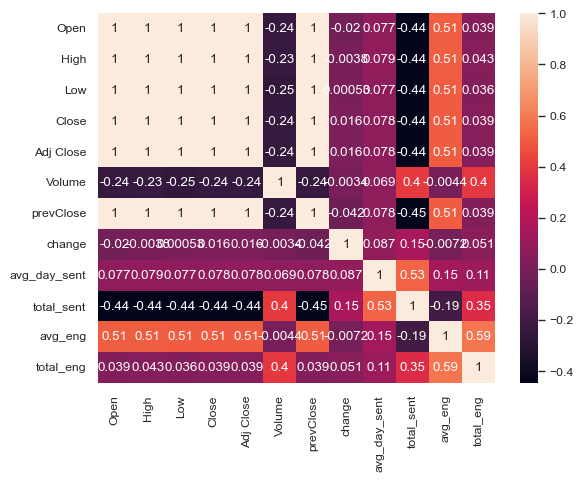

In [177]:
sns.heatmap(df_goog.corr(), annot=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\2807144851.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_goog.corr(), annot=True)


<AxesSubplot: >

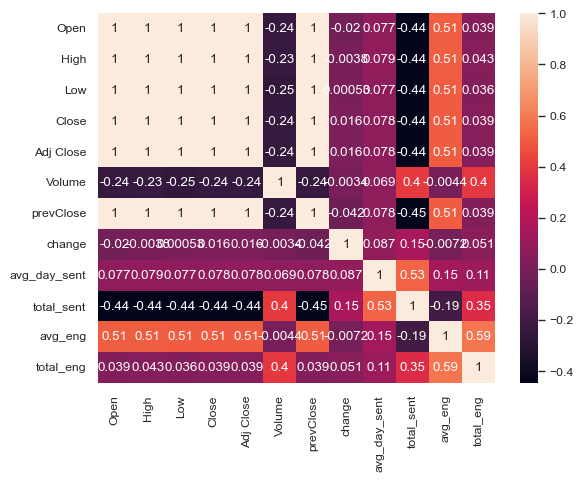

In [178]:
sns.heatmap(df_goog.corr(), annot=True)

In [179]:
df_appl.nunique()

Date             1255
Open             1185
High             1181
Low              1191
Close            1187
Adj Close        1236
Volume           1251
prevClose        1235
change           1253
upDown              2
ticker_symbol       1
avg_day_sent     1255
total_sent       1255
avg_eng          1254
total_eng         986
sent_class          2
dtype: int64

### Selecting the features with sentiment analysis

In [180]:
def onehot_encode(df, column_dict):
    df = df.copy()
    for column, prefix in column_dict.items():
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

def preprocess_inputs(df, scaler):
    df = df.copy()
    
    # One-hot encode the nominal features
    nominal_features = ['sent_class']
    df = onehot_encode(df, dict(zip(nominal_features, ['sent_class'])))
    df = df.iloc[1: , :]
    # Split df into X and y
    y = df['upDown'].copy()
    X = df.drop(columns=['upDown', 'ticker_symbol', 'Date'], axis=1).copy()
    
    # Scale and make my dataset
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    return X, y
    

In [181]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_appl, y_appl = preprocess_inputs(df_appl, MinMaxScaler())
X_tsla, y_tsla = preprocess_inputs(df_tsla, MinMaxScaler())
X_amzn, y_amzn = preprocess_inputs(df_amzn, MinMaxScaler())
X_goog, y_goog = preprocess_inputs(df_goog, MinMaxScaler())
X_googl, y_googl = preprocess_inputs(df_googl, MinMaxScaler())


In [182]:
X_appl.head()

Open      High       Low     Close  Adj Close    Volume  prevClose  \
0  0.090941  0.083935  0.079680  0.078255   0.058723  0.350849   0.073059   
1  0.082239  0.077904  0.075781  0.078304   0.058767  0.360869   0.059329   
2  0.085521  0.081710  0.086128  0.085633   0.065341  0.190553   0.059374   
3  0.095615  0.101236  0.096126  0.105996   0.083606  0.318225   0.066016   
4  0.112719  0.106673  0.103674  0.106586   0.084135  0.280670   0.084470   

     change  avg_day_sent  total_sent   avg_eng  total_eng  \
0  0.420139      0.336650    0.361574  0.122424   0.043192   
1  0.586379      0.366179    0.398901  0.077101   0.030573   
2  0.668297      0.356596    0.369075  0.093972   0.032977   
3  0.811801      0.388854    0.494149  0.134488   0.061070   
4  0.592134      0.339825    0.359583  0.114955   0.040038   

   sent_class_negative  sent_class_positive  
0                  0.0                  1.0  
1                  0.0                  1.0  
2                  0.0                  1.0  
3                  0.0                  1.0  
4                  0.0                  1.0

#### Feature Selection

In [183]:
# #Using Sent Class

# #basic features (sent category)
# def select_features(features):
#     features = features.copy()
#     features = features[['Adj Close', 'sent_class_positive', 'sent_class_negative']].copy()
#     return features

# # Complex Features (sent category)
# def select_featuresw(features):
#     features = features.copy()
#     features = features[['Adj Close', 'Open', 'High', 'Low', 'sent_class_positive', 'sent_class_negative']].copy()
#     return features

#Using avg_day_sent

# #basic features (sent value)
# def select_features(features):
#     features = features.copy()
#     features = features[['Adj Close', 'avg_day_sent']].copy()
#     return features

# # Complex Features (sent value)
# def select_featuresw(features):
#     features = features.copy()
#     features = features[['Adj Close', 'Open', 'High', 'Low', 'avg_day_sent']].copy()
#     return features

#Using total_sent

# basic features (sent value)
def select_features(features):
    features = features.copy()
    features = features[['Adj Close', 'total_sent']].copy()
    return features

# Complex Features (sent category)
def select_featuresw(features):
    features = features.copy()
    features = features[['Adj Close', 'Open', 'High', 'Low', 'total_sent']].copy()
    return features

#Using avg_eng

#basic features (sent value)
# def select_features(features):
#     features = features.copy()
#     features = features[['Adj Close', 'avg_eng']].copy()
#     return features

# # Complex Features (sent category)
# def select_featuresw(features):
#     features = features.copy()
#     features = features[['Adj Close', 'Open', 'High', 'Low', 'avg_eng']].copy()
#     return features

#Using total_eng

# #basic features (sent value)
# def select_features(features):
#     features = features.copy()
#     features = features[['Adj Close', 'total_eng']].copy()
#     return features

# # Complex Features (sent category)
# def select_featuresw(features):
#     features = features.copy()
#     features = features[['Adj Close', 'Open', 'High', 'Low', 'total_eng']].copy()
#     return features

#Using total_eng and avg day sent

# #basic features (sent value)
# def select_features(features):
#     features = features.copy()
#     features = features[['Adj Close', 'avg_day_sent', 'total_eng']].copy()
#     return features

# # Complex Features (sent category)
# def select_featuresw(features):
#     features = features.copy()
#     features = features[['Adj Close', 'Open', 'High', 'Low', 'avg_day_sent', 'total_eng']].copy()
#     return features

#Using total_eng and sent class

# #basic features (sent category)
# def select_features(features):
#     features = features.copy()
#     features = features[['Adj Close', 'sent_class_positive', 'sent_class_negative']].copy()
#     return features

# # Complex Features (sent category)
# def select_featuresw(features):
#     features = features.copy()
#     features = features[['Adj Close', 'Open', 'High', 'Low', 'sent_class_positive', 'sent_class_negative']].copy()
#     return features

In [184]:
#Basic Feature set
X_appl_withoutb = select_features(X_appl)
X_tsla_withoutb = select_features(X_tsla)
X_amzn_withoutb = select_features(X_amzn)
X_goog_withoutb = select_features(X_goog)
X_googl_withoutb = select_features(X_googl)

# Complex Feature set
X_appl_without = select_featuresw(X_appl)
X_tsla_without = select_featuresw(X_tsla)
X_amzn_without = select_featuresw(X_amzn)
X_goog_without = select_featuresw(X_goog)
X_googl_without = select_featuresw(X_googl)

In [185]:
X_appl_without.head()

Adj Close      Open      High       Low  total_sent
0   0.058723  0.090941  0.083935  0.079680    0.361574
1   0.058767  0.082239  0.077904  0.075781    0.398901
2   0.065341  0.085521  0.081710  0.086128    0.369075
3   0.083606  0.095615  0.101236  0.096126    0.494149
4   0.084135  0.112719  0.106673  0.103674    0.359583

In [186]:
X_tsla_withoutb.head()

Adj Close  total_sent
0   0.235354    0.161923
1   0.234205    0.170774
2   0.233056    0.176828
3   0.219271    0.167415
4   0.203780    0.186435

### Splitting data into train and test groups

In [187]:
# splitting my data into test and train data 
def split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=42)

    return X_train, X_test, y_train, y_test

In [188]:
# With sentiment features
X_train_applb, X_test_applb, y_train_applb, y_test_applb = split(X_appl_withoutb, y_appl)
X_train_tslab, X_test_tslab, y_train_tslab, y_test_tslab = split(X_tsla_withoutb, y_tsla)
X_train_amznb, X_test_amznb, y_train_amznb, y_test_amznb = split(X_amzn_withoutb, y_amzn)
X_train_googb, X_test_googb, y_train_googb, y_test_googb = split(X_goog_withoutb, y_goog)
X_train_googlb, X_test_googlb, y_train_googlb, y_test_googlb = split(X_googl_withoutb, y_googl)

#Complex features
X_train_applc, X_test_applc, y_train_applc, y_test_applc = split(X_appl_without, y_appl)
X_train_tslac, X_test_tslac, y_train_tslac, y_test_tslac = split(X_tsla_without, y_tsla)
X_train_amznc, X_test_amznc, y_train_amznc, y_test_amznc = split(X_amzn_without, y_amzn)
X_train_googc, X_test_googc, y_train_googc, y_test_googc = split(X_goog_without, y_goog)
X_train_googlc, X_test_googlc, y_train_googlc, y_test_googlc = split(X_googl_without, y_googl)

## Machine Learning Algorithms

#### Naive Bayes

##### Apple

Just Adj Close Feature
Sensitivity :  55.639097744360896
Specificity :  54.14364640883977
Accuracy Score:  55.00000000000001


              precision    recall  f1-score   support

    Negative       0.51      0.44      0.47       430
    Positive       0.58      0.64      0.61       510

    accuracy                           0.55       940
   macro avg       0.54      0.54      0.54       940
weighted avg       0.55      0.55      0.55       940



Average of 10 cross validation of the accuracy score:  75.75936507936507


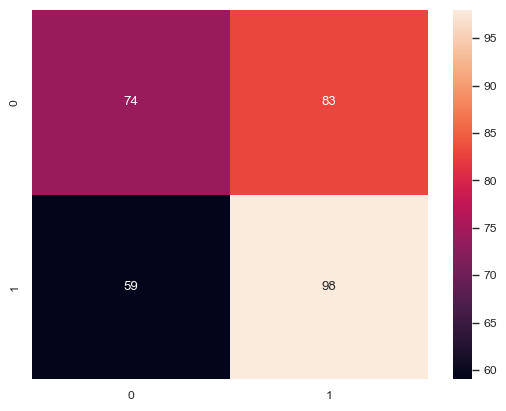

Negative AUC:  0.555397784899996


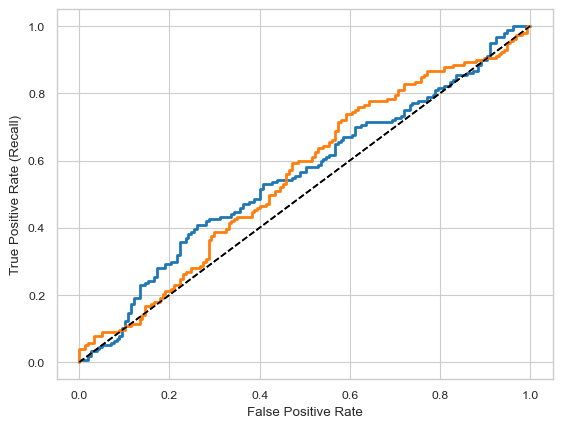

Positive AUC:  0.5553977848999959

Adj Close, Open, High, Low Features
Sensitivity :  53.57142857142857
Specificity :  52.87356321839081
Accuracy Score:  50.95744680851064


              precision    recall  f1-score   support

    Negative       0.46      0.40      0.43       430
    Positive       0.54      0.60      0.57       510

    accuracy                           0.51       940
   macro avg       0.50      0.50      0.50       940
weighted avg       0.50      0.51      0.51       940



Average of 10 cross validation of the accuracy score:  75.75936507936507


Negative AUC:  0.5629842995659053


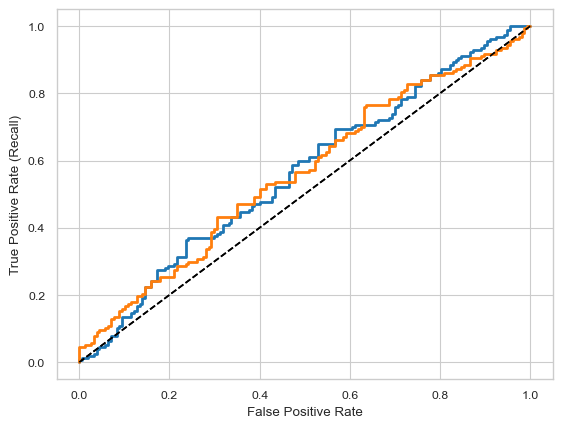

Positive AUC:  0.5629842995659055


50.95744680851064

In [189]:
print('Just Adj Close Feature')
alg(X_appl, y_appl, X_train_applb, X_test_applb, y_train_applb, y_test_applb, gnb)
print()
print('Adj Close, Open, High, Low Features')
alg(X_appl, y_appl, X_train_applc, X_test_applc, y_train_applc, y_test_applc, gnb)


##### Tesla

Just Adj Close Feature
Sensitivity :  48.41269841269841
Specificity :  74.19354838709677
Accuracy Score:  54.03397027600849


              precision    recall  f1-score   support

    Negative       0.53      0.81      0.64       483
    Positive       0.56      0.25      0.35       459

    accuracy                           0.54       942
   macro avg       0.55      0.53      0.50       942
weighted avg       0.55      0.54      0.50       942



Average of 10 cross validation of the accuracy score:  81.46603174603175


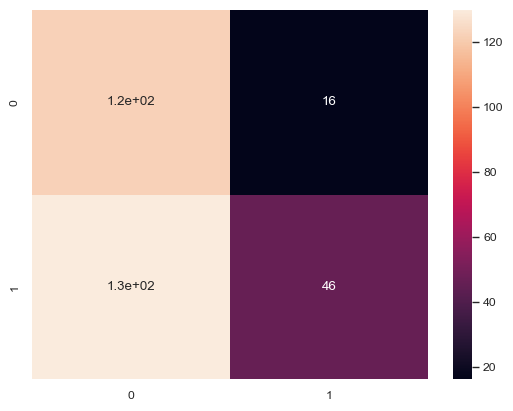

Negative AUC:  0.5680171277997366


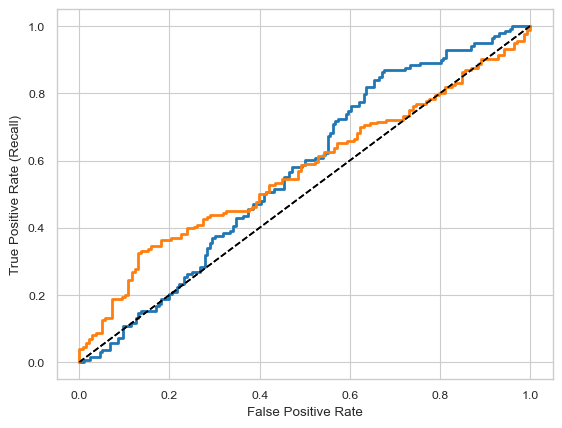

Positive AUC:  0.5680171277997366

Adj Close, Open, High, Low Features
Sensitivity :  47.674418604651166
Specificity :  73.21428571428571
Accuracy Score:  52.547770700636946


              precision    recall  f1-score   support

    Negative       0.52      0.80      0.63       483
    Positive       0.53      0.24      0.33       459

    accuracy                           0.53       942
   macro avg       0.53      0.52      0.48       942
weighted avg       0.53      0.53      0.48       942



Average of 10 cross validation of the accuracy score:  81.46603174603175


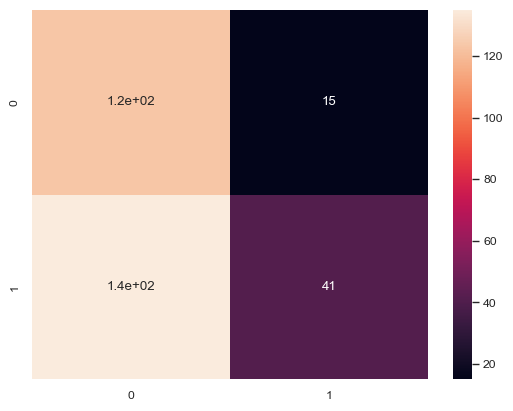

Negative AUC:  0.5884387351778655


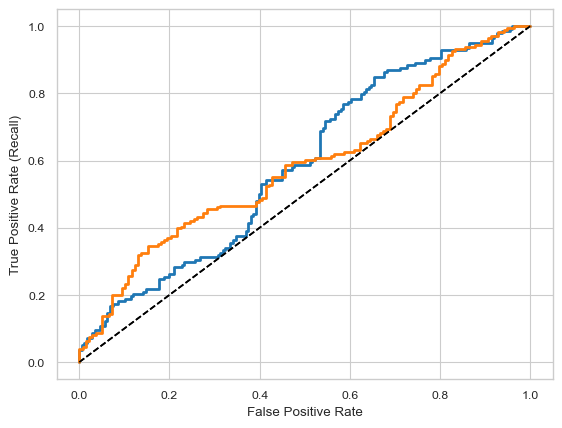

Positive AUC:  0.5884387351778657


52.547770700636946

In [190]:
print('Just Adj Close Feature')
alg(X_tsla, y_tsla, X_train_tslab, X_test_tslab, y_train_tslab, y_test_tslab, gnb)
print()
print('Adj Close, Open, High, Low Features')
alg(X_tsla, y_tsla, X_train_tslac, X_test_tslac, y_train_tslac, y_test_tslac, gnb)


##### Amazon

Just Adj Close Feature
Sensitivity :  48.53801169590643
Specificity :  61.53846153846154
Accuracy Score:  52.653927813163484


              precision    recall  f1-score   support

    Negative       0.48      0.44      0.46       428
    Positive       0.56      0.60      0.58       514

    accuracy                           0.53       942
   macro avg       0.52      0.52      0.52       942
weighted avg       0.52      0.53      0.52       942



Average of 10 cross validation of the accuracy score:  83.9111111111111


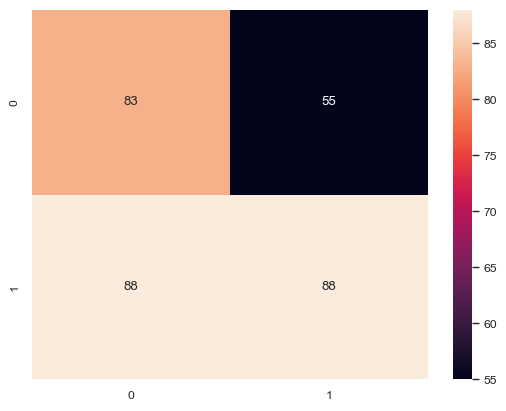

Negative AUC:  0.5664937417654808


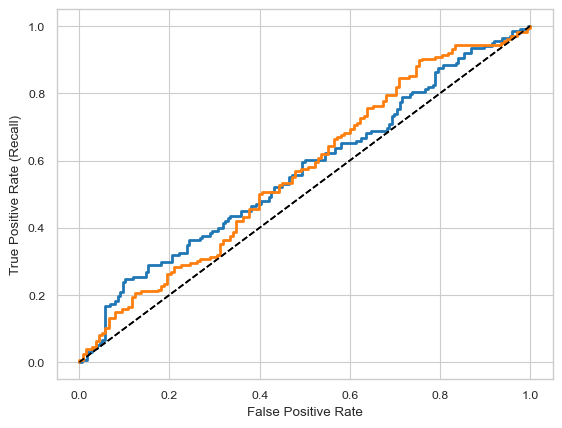

Positive AUC:  0.566493741765481

Adj Close, Open, High, Low Features
Sensitivity :  50.609756097560975
Specificity :  63.33333333333333
Accuracy Score:  50.955414012738856


              precision    recall  f1-score   support

    Negative       0.46      0.50      0.48       428
    Positive       0.55      0.52      0.54       514

    accuracy                           0.51       942
   macro avg       0.51      0.51      0.51       942
weighted avg       0.51      0.51      0.51       942



Average of 10 cross validation of the accuracy score:  83.9111111111111


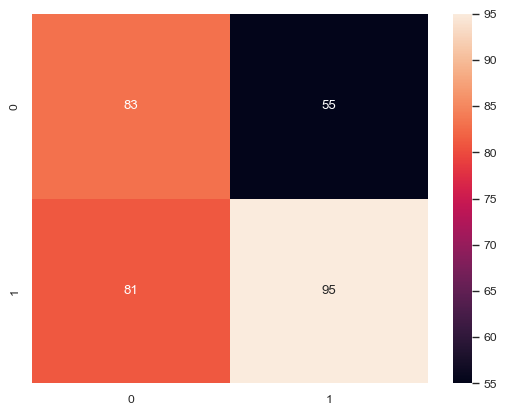

Negative AUC:  0.5739459815546771


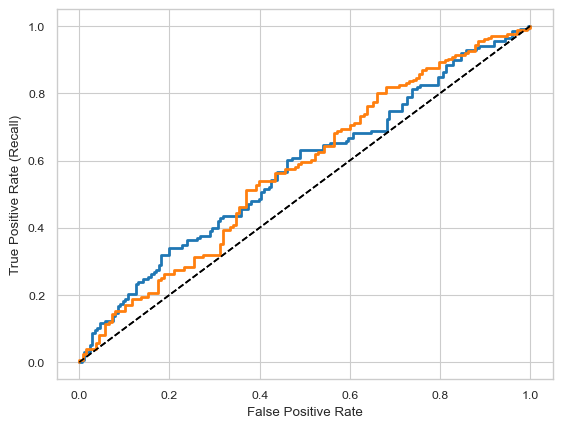

Positive AUC:  0.5739459815546772


50.955414012738856

In [191]:
print('Just Adj Close Feature')
alg(X_amzn, y_amzn, X_train_amznb, X_test_amznb, y_train_amznb, y_test_amznb, gnb)
print()
print('Adj Close, Open, High, Low Features')
alg(X_amzn, y_amzn, X_train_amznc, X_test_amznc, y_train_amznc, y_test_amznc, gnb)


##### Goog

Just Adj Close Feature
Sensitivity :  45.54973821989529
Specificity :  55.28455284552846
Accuracy Score:  50.05313496280552


              precision    recall  f1-score   support

    Negative       0.48      0.48      0.48       449
    Positive       0.52      0.52      0.52       492

    accuracy                           0.50       941
   macro avg       0.50      0.50      0.50       941
weighted avg       0.50      0.50      0.50       941



Average of 10 cross validation of the accuracy score:  91.63174603174603


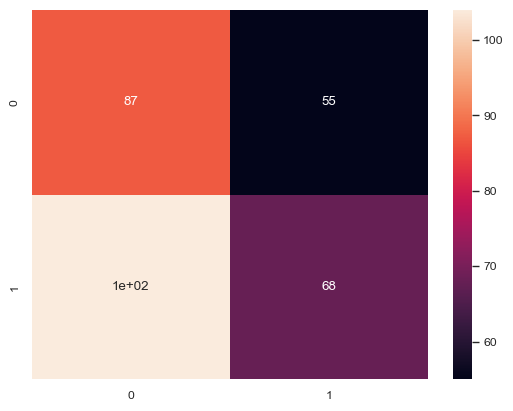

Negative AUC:  0.5284556174254831


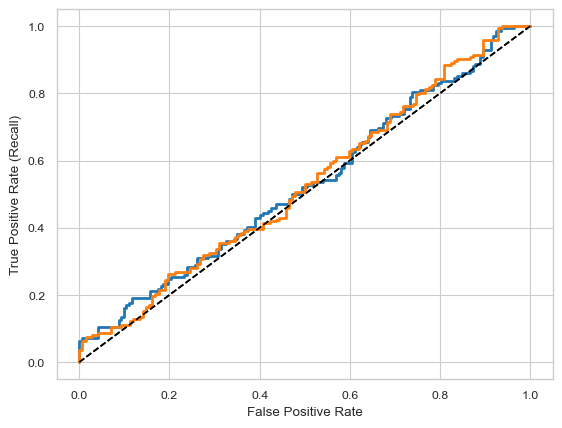

Positive AUC:  0.5284556174254831

Adj Close, Open, High, Low Features
Sensitivity :  45.33333333333333
Specificity :  54.87804878048781
Accuracy Score:  51.64718384697131


              precision    recall  f1-score   support

    Negative       0.49      0.37      0.42       449
    Positive       0.53      0.65      0.59       492

    accuracy                           0.52       941
   macro avg       0.51      0.51      0.50       941
weighted avg       0.51      0.52      0.51       941



Average of 10 cross validation of the accuracy score:  91.63174603174603


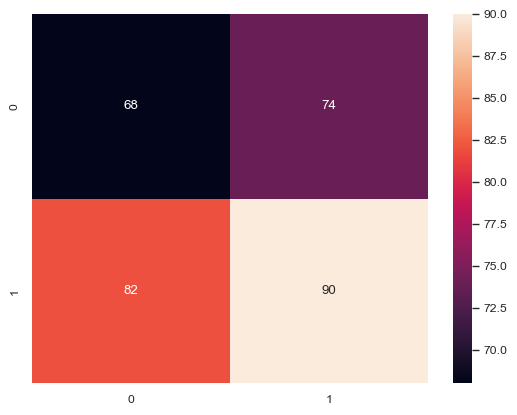

Negative AUC:  0.5229282672780871


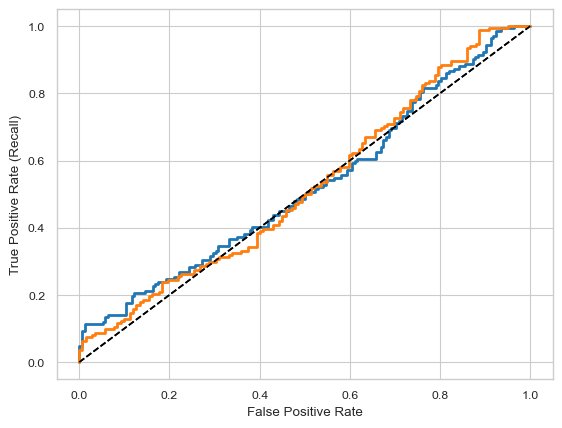

Positive AUC:  0.5229282672780873


51.64718384697131

In [192]:
print('Just Adj Close Feature')
alg(X_goog, y_goog, X_train_googb, X_test_googb, y_train_googb, y_test_googb, gnb)
print()
print('Adj Close, Open, High, Low Features')
alg(X_goog, y_goog, X_train_googc, X_test_googc, y_train_googc, y_test_googc, gnb)

##### Googl

Just Adj Close Feature
Sensitivity :  46.15384615384615
Specificity :  46.236559139784944
Accuracy Score:  50.74309978768577


              precision    recall  f1-score   support

    Negative       0.48      0.68      0.56       440
    Positive       0.56      0.36      0.44       502

    accuracy                           0.51       942
   macro avg       0.52      0.52      0.50       942
weighted avg       0.52      0.51      0.50       942



Average of 10 cross validation of the accuracy score:  83.05396825396825


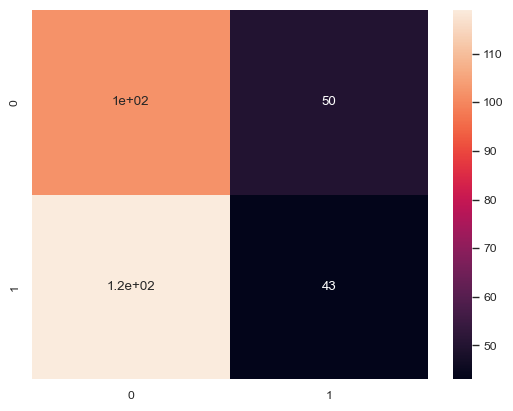

Negative AUC:  0.4243827160493828


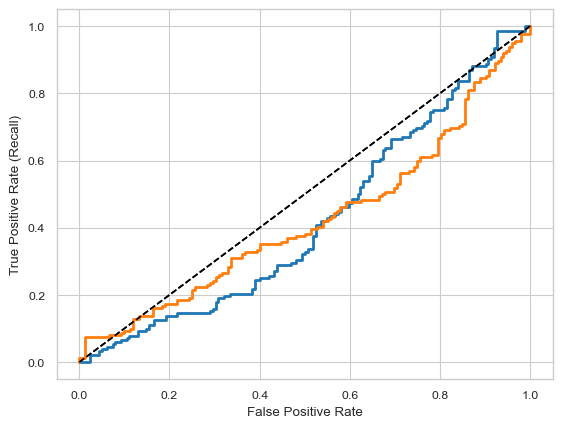

Positive AUC:  0.4243827160493827

Adj Close, Open, High, Low Features
Sensitivity :  44.54545454545455
Specificity :  42.5531914893617
Accuracy Score:  49.044585987261144


              precision    recall  f1-score   support

    Negative       0.47      0.62      0.53       440
    Positive       0.53      0.38      0.44       502

    accuracy                           0.49       942
   macro avg       0.50      0.50      0.49       942
weighted avg       0.50      0.49      0.48       942



Average of 10 cross validation of the accuracy score:  83.05396825396825


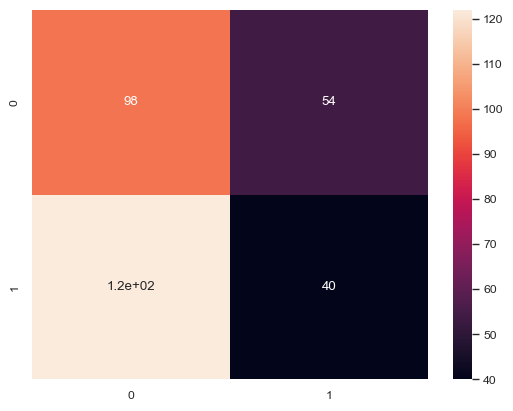

Negative AUC:  0.4357537361923327


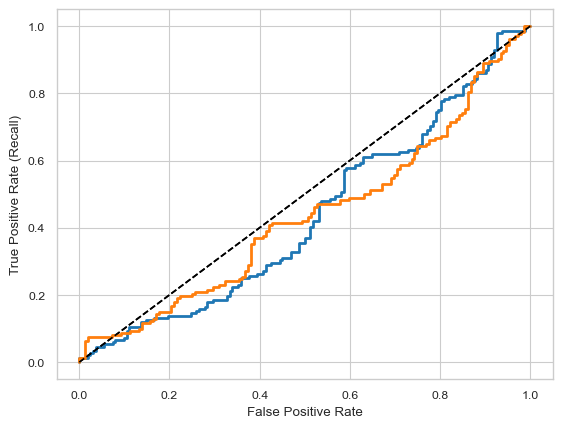

Positive AUC:  0.4357537361923327


49.044585987261144

In [193]:
print('Just Adj Close Feature')
alg(X_googl, y_googl, X_train_googlb, X_test_googlb, y_train_googlb, y_test_googlb, gnb)
print()
print('Adj Close, Open, High, Low Features')
alg(X_googl, y_googl, X_train_googlc, X_test_googlc, y_train_googlc, y_test_googlc, gnb)


#### Decision Trees

##### Apple

Just Adj Close Feature
Sensitivity :  50.931677018633536
Specificity :  50.98039215686274
Accuracy Score:  52.4468085106383


              precision    recall  f1-score   support

    Negative       0.48      0.50      0.49       430
    Positive       0.56      0.54      0.55       510

    accuracy                           0.52       940
   macro avg       0.52      0.52      0.52       940
weighted avg       0.53      0.52      0.53       940



Average of 10 cross validation of the accuracy score:  100.0


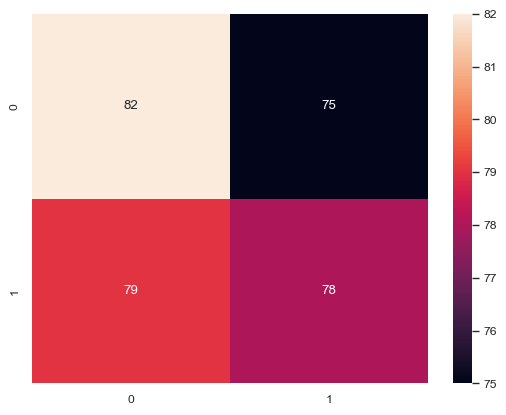

Negative AUC:  0.5095541401273885


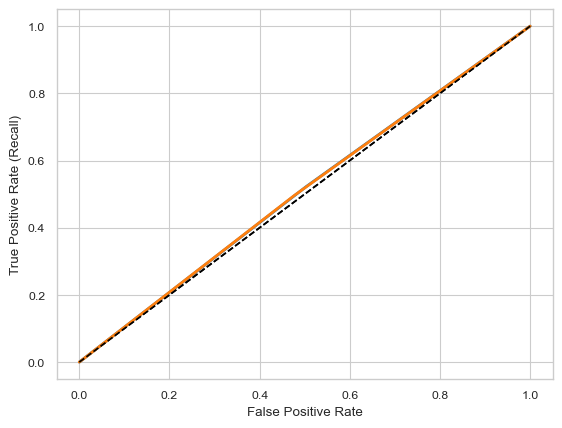

Positive AUC:  0.5095541401273885

Adj Close, Open, High, Low Features
Sensitivity :  54.87804878048781
Specificity :  55.333333333333336
Accuracy Score:  55.00000000000001


              precision    recall  f1-score   support

    Negative       0.51      0.50      0.50       430
    Positive       0.58      0.59      0.59       510

    accuracy                           0.55       940
   macro avg       0.55      0.55      0.55       940
weighted avg       0.55      0.55      0.55       940



Average of 10 cross validation of the accuracy score:  100.0


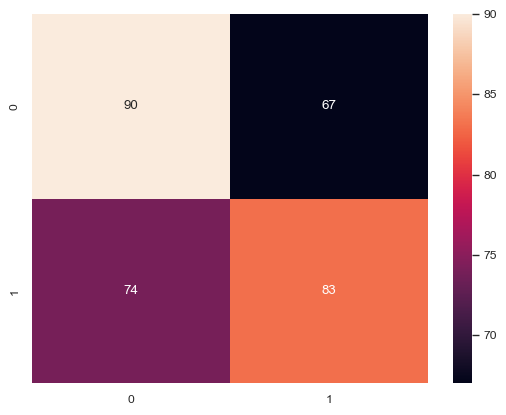

Negative AUC:  0.5509554140127388


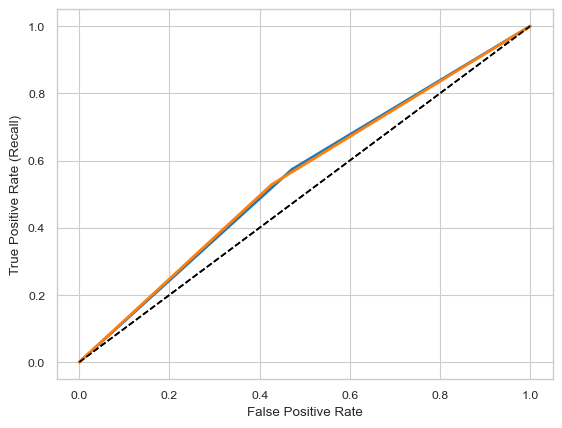

Positive AUC:  0.5509554140127388


55.00000000000001

In [194]:
print('Just Adj Close Feature')
alg(X_appl, y_appl, X_train_applb, X_test_applb, y_train_applb, y_test_applb, dt)
print()
print('Adj Close, Open, High, Low Features')
alg(X_appl, y_appl, X_train_applc, X_test_applc, y_train_applc, y_test_applc, dt)

##### Tesla

Just Adj Close Feature
Sensitivity :  47.43589743589743
Specificity :  59.49367088607595
Accuracy Score:  51.910828025477706


              precision    recall  f1-score   support

    Negative       0.53      0.53      0.53       483
    Positive       0.51      0.51      0.51       459

    accuracy                           0.52       942
   macro avg       0.52      0.52      0.52       942
weighted avg       0.52      0.52      0.52       942



Average of 10 cross validation of the accuracy score:  100.0


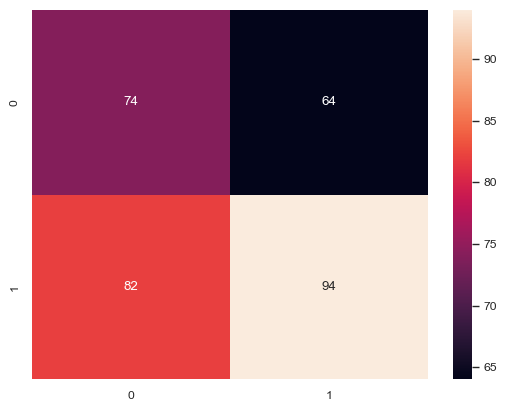

Negative AUC:  0.5351613965744402


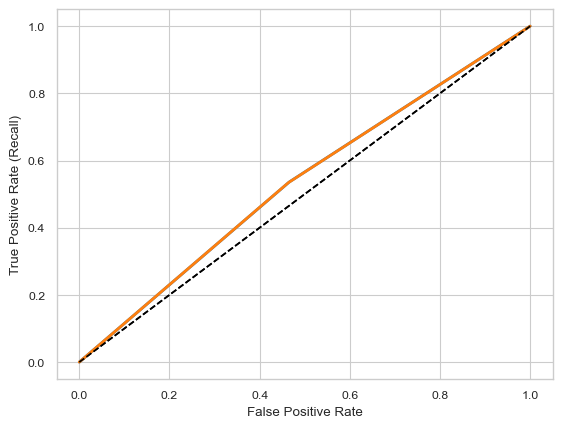

Positive AUC:  0.5351613965744401
Index(['Adj Close', 'total_sent'], dtype='object')

Adj Close, Open, High, Low Features
Sensitivity :  67.62589928057554
Specificity :  74.85714285714286
Accuracy Score:  65.49893842887474


              precision    recall  f1-score   support

    Negative       0.66      0.67      0.67       483
    Positive       0.65      0.64      0.64       459

    accuracy                           0.65       942
   macro avg       0.65      0.65      0.65       942
weighted avg       0.65      0.65      0.65       942



Average of 10 cross validation of the accuracy score:  100.0


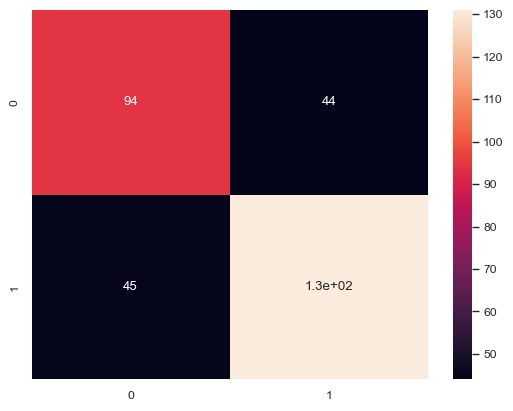

Negative AUC:  0.7127388010540184


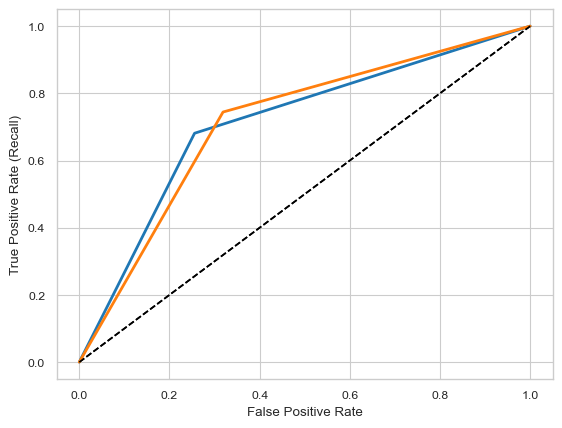

Positive AUC:  0.7127388010540184


65.49893842887474

In [195]:
print('Just Adj Close Feature')
alg(X_tsla, y_tsla, X_train_tslab, X_test_tslab, y_train_tslab, y_test_tslab, dt)
print(X_train_tslab.columns)
print()
print('Adj Close, Open, High, Low Features')
alg(X_tsla, y_tsla, X_train_tslac, X_test_tslac, y_train_tslac, y_test_tslac, dt)


##### Amazon

Just Adj Close Feature
Sensitivity :  44.370860927152314
Specificity :  56.44171779141104
Accuracy Score:  50.74309978768577


              precision    recall  f1-score   support

    Negative       0.46      0.48      0.47       428
    Positive       0.55      0.53      0.54       514

    accuracy                           0.51       942
   macro avg       0.51      0.51      0.51       942
weighted avg       0.51      0.51      0.51       942



Average of 10 cross validation of the accuracy score:  99.92000000000002


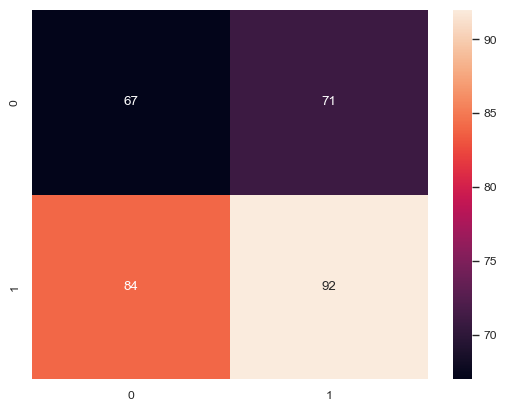

Negative AUC:  0.5041172595520421


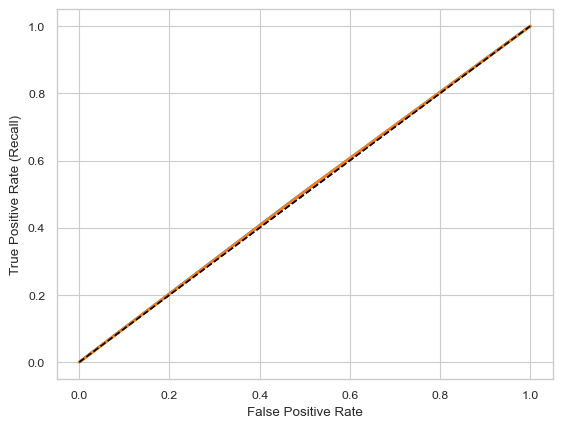

Positive AUC:  0.5041172595520422

Adj Close, Open, High, Low Features
Sensitivity :  56.11510791366906
Specificity :  65.71428571428571
Accuracy Score:  57.00636942675159


              precision    recall  f1-score   support

    Negative       0.53      0.55      0.54       428
    Positive       0.61      0.59      0.60       514

    accuracy                           0.57       942
   macro avg       0.57      0.57      0.57       942
weighted avg       0.57      0.57      0.57       942



Average of 10 cross validation of the accuracy score:  99.92000000000002


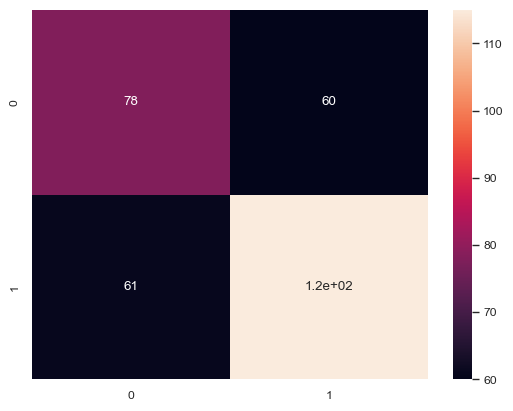

Negative AUC:  0.6093132411067192


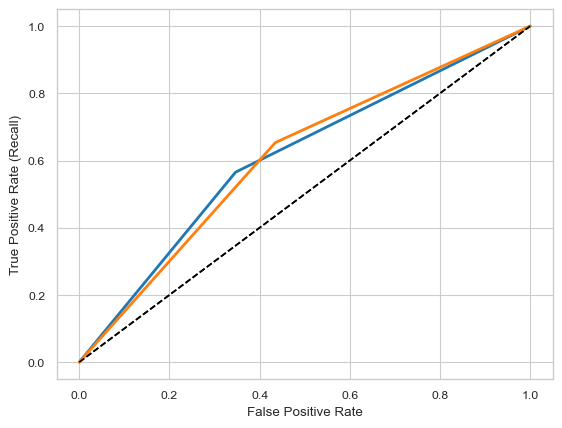

Positive AUC:  0.6093132411067194


57.00636942675159

In [196]:
print('Just Adj Close Feature')
alg(X_amzn, y_amzn, X_train_amznb, X_test_amznb, y_train_amznb, y_test_amznb, dt)
print()
print('Adj Close, Open, High, Low Features')
alg(X_amzn, y_amzn, X_train_amznc, X_test_amznc, y_train_amznc, y_test_amznc, dt)


##### Goog

Just Adj Close Feature
Sensitivity :  41.05960264900662
Specificity :  50.920245398773
Accuracy Score:  50.58448459086079


              precision    recall  f1-score   support

    Negative       0.48      0.46      0.47       449
    Positive       0.53      0.55      0.54       492

    accuracy                           0.51       941
   macro avg       0.50      0.50      0.50       941
weighted avg       0.50      0.51      0.51       941



Average of 10 cross validation of the accuracy score:  100.0


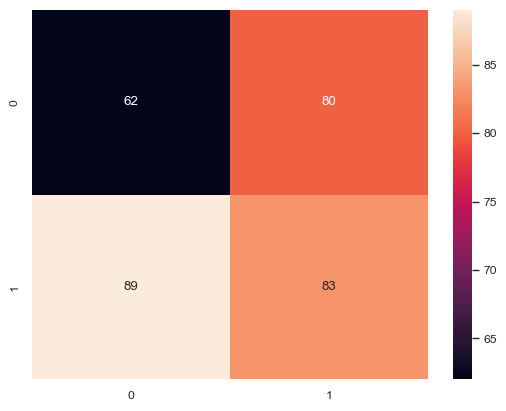

Negative AUC:  0.4595889289223714


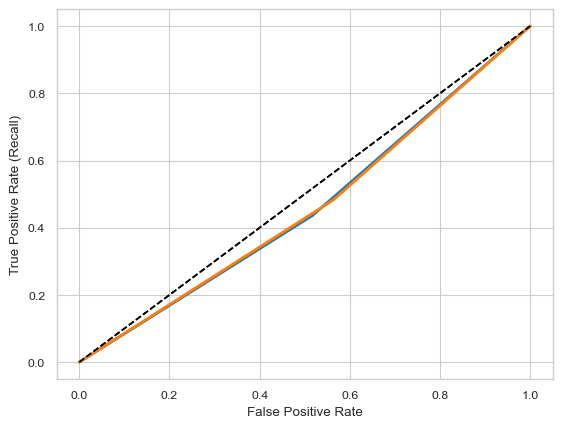

Positive AUC:  0.4595889289223714

Adj Close, Open, High, Low Features
Sensitivity :  55.4054054054054
Specificity :  63.85542168674698
Accuracy Score:  58.76726886291179


              precision    recall  f1-score   support

    Negative       0.57      0.58      0.57       449
    Positive       0.61      0.59      0.60       492

    accuracy                           0.59       941
   macro avg       0.59      0.59      0.59       941
weighted avg       0.59      0.59      0.59       941



Average of 10 cross validation of the accuracy score:  100.0


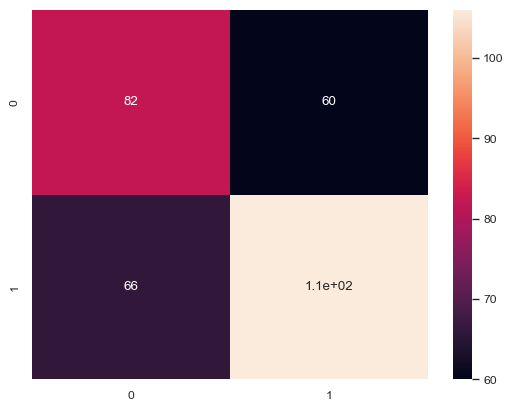

Negative AUC:  0.5968719292499182


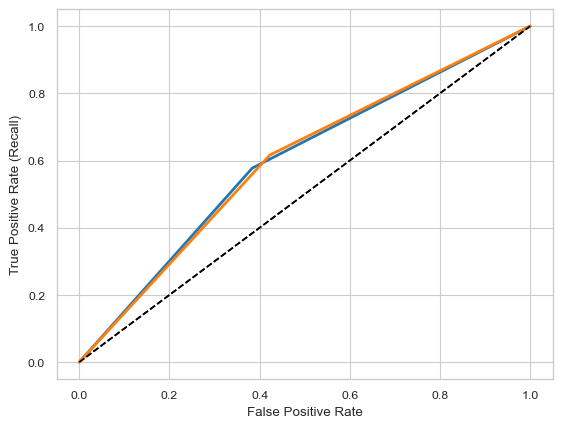

Positive AUC:  0.596871929249918


58.76726886291179

In [197]:
print('Just Adj Close Feature')
alg(X_goog, y_goog, X_train_googb, X_test_googb, y_train_googb, y_test_googb, dt)
print()
print('Adj Close, Open, High, Low Features')
alg(X_goog, y_goog, X_train_googc, X_test_googc, y_train_googc, y_test_googc, dt)

##### Googl

Just Adj Close Feature
Sensitivity :  50.69444444444444
Specificity :  53.529411764705884
Accuracy Score:  52.4416135881104


              precision    recall  f1-score   support

    Negative       0.49      0.50      0.50       440
    Positive       0.56      0.54      0.55       502

    accuracy                           0.52       942
   macro avg       0.52      0.52      0.52       942
weighted avg       0.53      0.52      0.52       942



Average of 10 cross validation of the accuracy score:  99.92063492063492


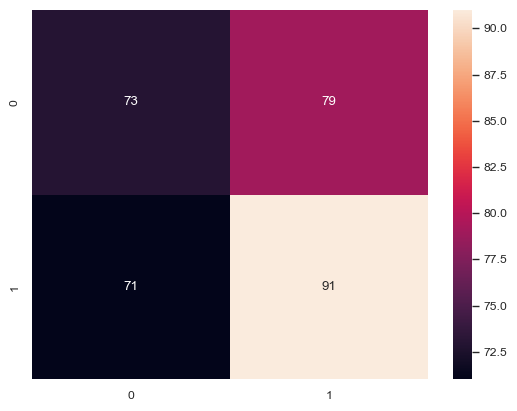

Negative AUC:  0.5209957764782326


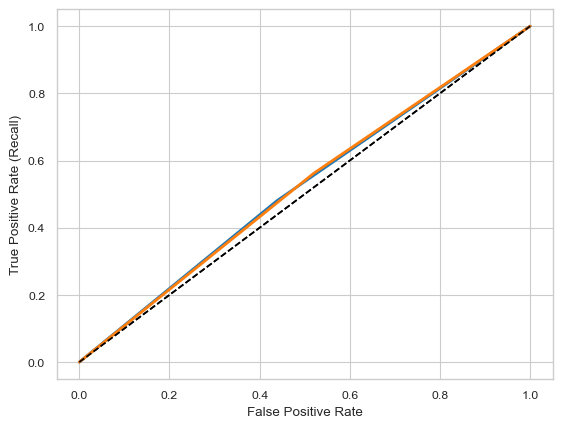

Positive AUC:  0.5209957764782327

Adj Close, Open, High, Low Features
Sensitivity :  64.58333333333334
Specificity :  65.29411764705883
Accuracy Score:  60.403397027600846


              precision    recall  f1-score   support

    Negative       0.57      0.58      0.58       440
    Positive       0.63      0.62      0.63       502

    accuracy                           0.60       942
   macro avg       0.60      0.60      0.60       942
weighted avg       0.60      0.60      0.60       942



Average of 10 cross validation of the accuracy score:  99.92063492063492


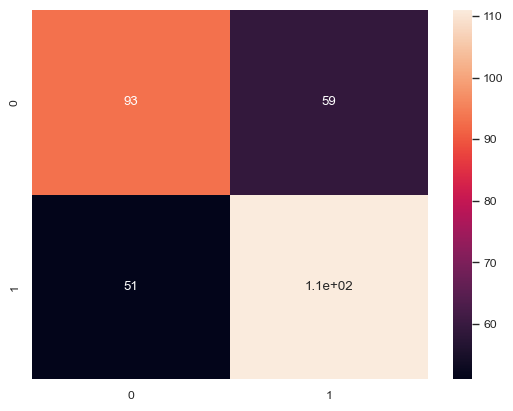

Negative AUC:  0.6485136452241714


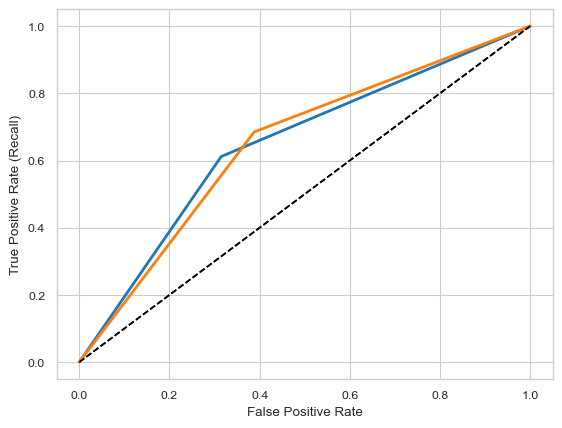

Positive AUC:  0.6485136452241715


60.403397027600846

In [198]:
print('Just Adj Close Feature')
alg(X_googl, y_googl, X_train_googlb, X_test_googlb, y_train_googlb, y_test_googlb, dt)
print()
print('Adj Close, Open, High, Low Features')
alg(X_googl, y_googl, X_train_googlc, X_test_googlc, y_train_googlc, y_test_googlc, dt)


#### SVM

##### Apple

Just Adj Close Feature
Sensitivity :  53.38983050847458
Specificity :  52.04081632653062
Accuracy Score:  54.36170212765957


              precision    recall  f1-score   support

    Negative       0.50      0.36      0.42       430
    Positive       0.56      0.70      0.63       510

    accuracy                           0.54       940
   macro avg       0.53      0.53      0.52       940
weighted avg       0.54      0.54      0.53       940



Average of 10 cross validation of the accuracy score:  89.71809523809524


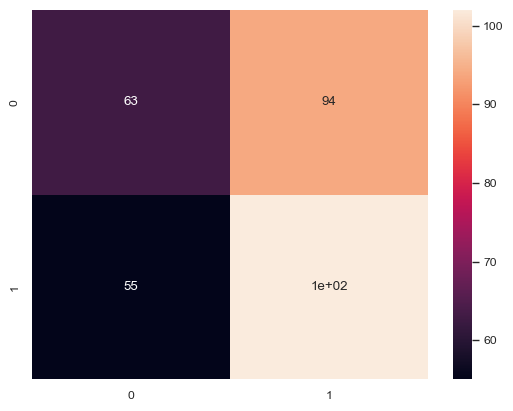

Negative AUC:  0.5271613452878412


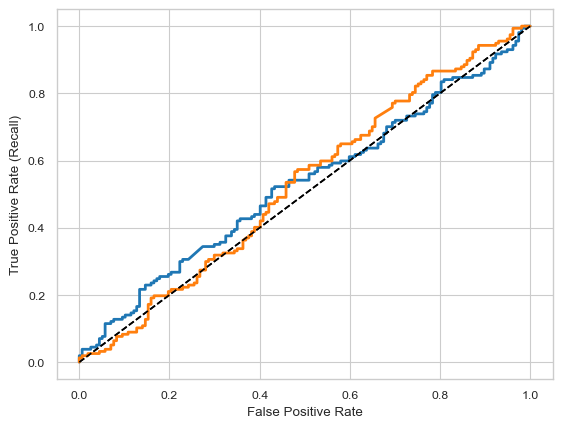

Positive AUC:  0.5271613452878413

Adj Close, Open, High, Low Features
Sensitivity :  55.714285714285715
Specificity :  51.63934426229508
Accuracy Score:  53.61702127659574


              precision    recall  f1-score   support

    Negative       0.48      0.23      0.31       430
    Positive       0.55      0.80      0.65       510

    accuracy                           0.54       940
   macro avg       0.52      0.51      0.48       940
weighted avg       0.52      0.54      0.49       940



Average of 10 cross validation of the accuracy score:  89.71809523809524


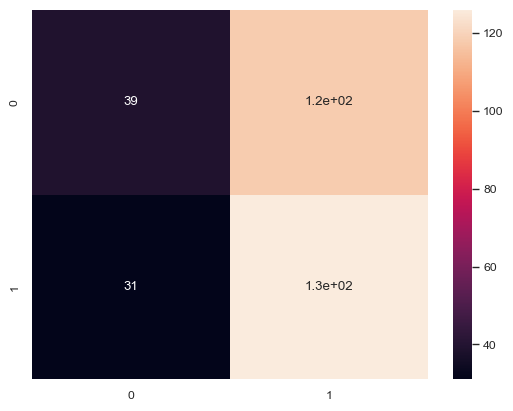

Negative AUC:  0.5403870339567528


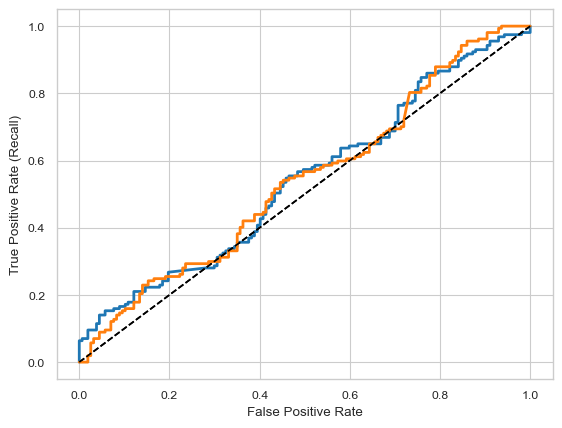

Positive AUC:  0.5403870339567528


53.61702127659574

In [199]:
print('Just Adj Close Feature')
alg(X_appl, y_appl, X_train_applb, X_test_applb, y_train_applb, y_test_applb, svm)
print()
print('Adj Close, Open, High, Low Features')
alg(X_appl, y_appl, X_train_applc, X_test_applc, y_train_applc, y_test_applc, svm)

##### Tesla

Just Adj Close Feature
Sensitivity :  48.20717131474104
Specificity :  73.01587301587301
Accuracy Score:  53.609341825902334


              precision    recall  f1-score   support

    Negative       0.53      0.82      0.64       483
    Positive       0.56      0.24      0.34       459

    accuracy                           0.54       942
   macro avg       0.54      0.53      0.49       942
weighted avg       0.54      0.54      0.49       942



Average of 10 cross validation of the accuracy score:  88.84698412698413


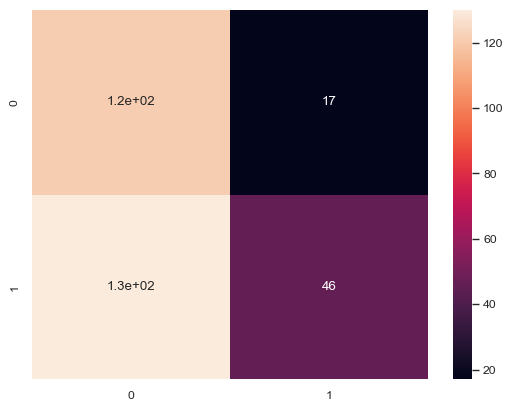

Negative AUC:  0.6173007246376812


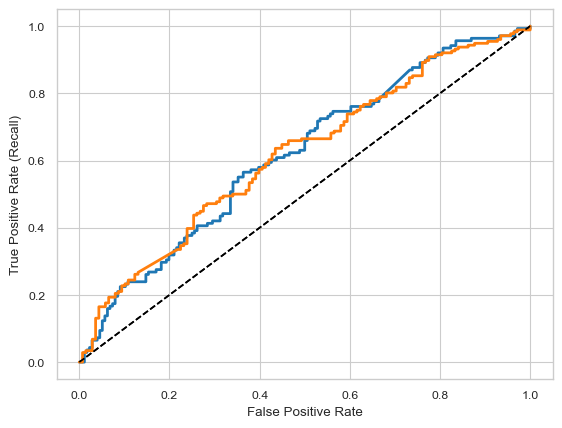

Positive AUC:  0.6173007246376812

Adj Close, Open, High, Low Features
Sensitivity :  59.45945945945946
Specificity :  93.47826086956522
Accuracy Score:  65.28662420382165


              precision    recall  f1-score   support

    Negative       0.62      0.81      0.71       483
    Positive       0.71      0.49      0.58       459

    accuracy                           0.65       942
   macro avg       0.67      0.65      0.64       942
weighted avg       0.67      0.65      0.64       942



Average of 10 cross validation of the accuracy score:  88.84698412698413


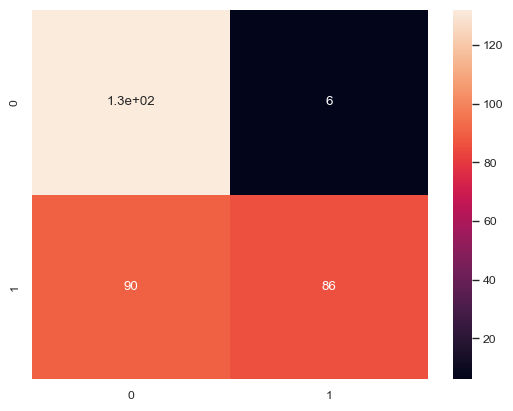

Negative AUC:  0.8542695981554679


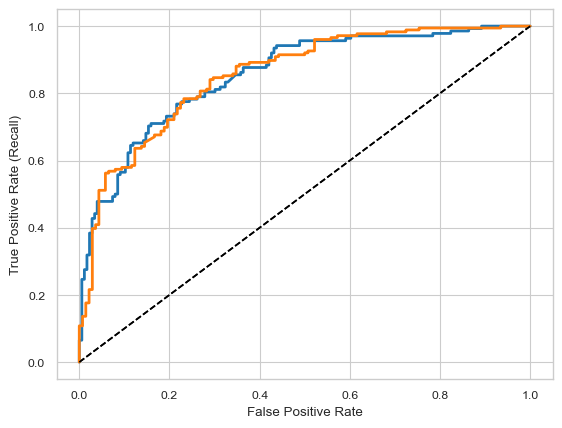

Positive AUC:  0.8542695981554677


65.28662420382165

In [200]:
print('Just Adj Close Feature')
alg(X_tsla, y_tsla, X_train_tslab, X_test_tslab, y_train_tslab, y_test_tslab, svm)
print()
print('Adj Close, Open, High, Low Features')
alg(X_tsla, y_tsla, X_train_tslac, X_test_tslac, y_train_tslac, y_test_tslac, svm)

##### Amazon

Just Adj Close Feature


C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4058824074.py:16: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])


Sensitivity :  nan
Specificity :  56.05095541401274
Accuracy Score:  53.92781316348195


              precision    recall  f1-score   support

    Negative       0.39      0.03      0.05       428
    Positive       0.54      0.97      0.70       514

    accuracy                           0.54       942
   macro avg       0.47      0.50      0.37       942
weighted avg       0.48      0.54      0.40       942



Average of 10 cross validation of the accuracy score:  87.41142857142856


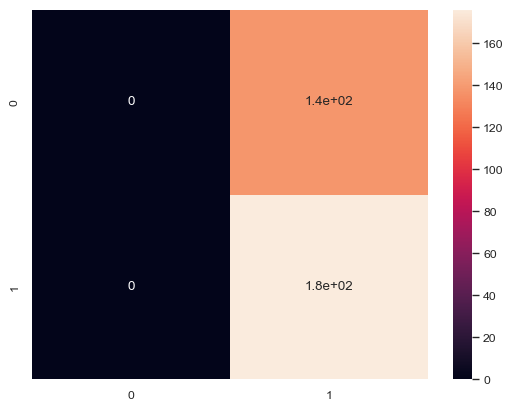

Negative AUC:  0.48649538866930175


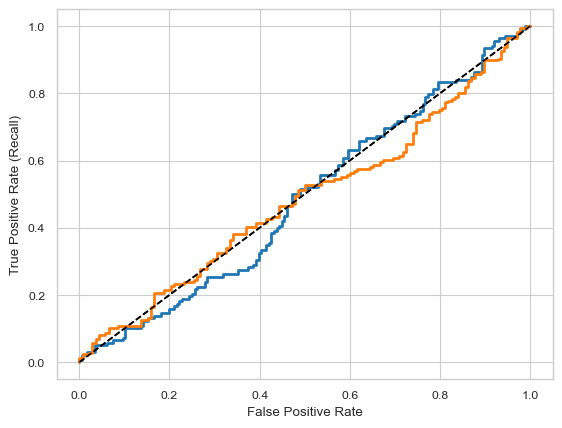

Positive AUC:  0.48649538866930164

Adj Close, Open, High, Low Features


C:\Users\harsh\AppData\Local\Temp\ipykernel_22500\4058824074.py:16: RuntimeWarning: invalid value encountered in scalar divide
  sensitivity = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[1,0])


Sensitivity :  nan
Specificity :  56.05095541401274
Accuracy Score:  53.92781316348195


              precision    recall  f1-score   support

    Negative       0.31      0.01      0.02       428
    Positive       0.54      0.98      0.70       514

    accuracy                           0.54       942
   macro avg       0.43      0.50      0.36       942
weighted avg       0.44      0.54      0.39       942



Average of 10 cross validation of the accuracy score:  87.41142857142856


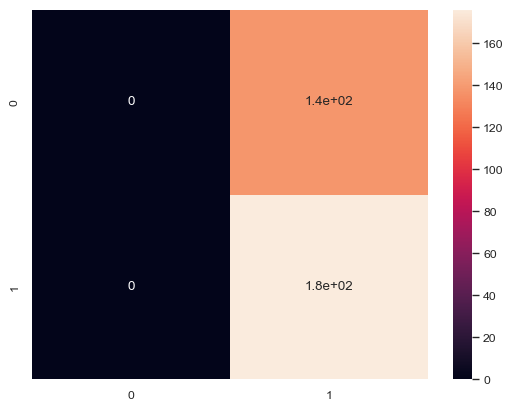

Negative AUC:  0.7765974967061924


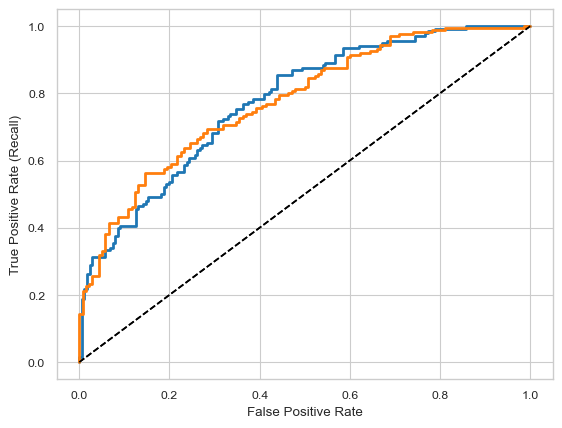

Positive AUC:  0.7765974967061924


53.92781316348195

In [201]:
print('Just Adj Close Feature')
alg(X_amzn, y_amzn, X_train_amznb, X_test_amznb, y_train_amznb, y_test_amznb, svm)
print()
print('Adj Close, Open, High, Low Features')
alg(X_amzn, y_amzn, X_train_amznc, X_test_amznc, y_train_amznc, y_test_amznc, svm)


##### Goog

Just Adj Close Feature
Sensitivity :  36.84210526315789
Specificity :  54.23728813559322
Accuracy Score:  51.32837407013815


              precision    recall  f1-score   support

    Negative       0.47      0.16      0.24       449
    Positive       0.52      0.83      0.64       492

    accuracy                           0.51       941
   macro avg       0.50      0.50      0.44       941
weighted avg       0.50      0.51      0.45       941



Average of 10 cross validation of the accuracy score:  84.69587301587302


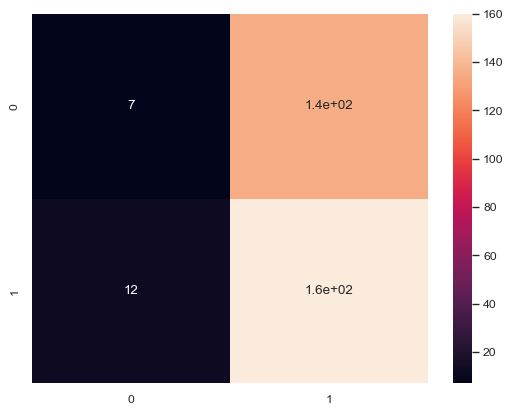

Negative AUC:  0.5174213887979038


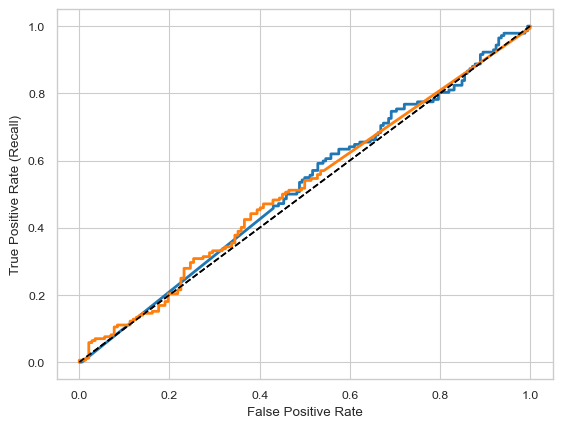

Positive AUC:  0.5174213887979038

Adj Close, Open, High, Low Features
Sensitivity :  75.0
Specificity :  55.16129032258065
Accuracy Score:  53.13496280552603


              precision    recall  f1-score   support

    Negative       0.57      0.08      0.13       449
    Positive       0.53      0.95      0.68       492

    accuracy                           0.53       941
   macro avg       0.55      0.51      0.41       941
weighted avg       0.55      0.53      0.42       941



Average of 10 cross validation of the accuracy score:  84.69587301587302


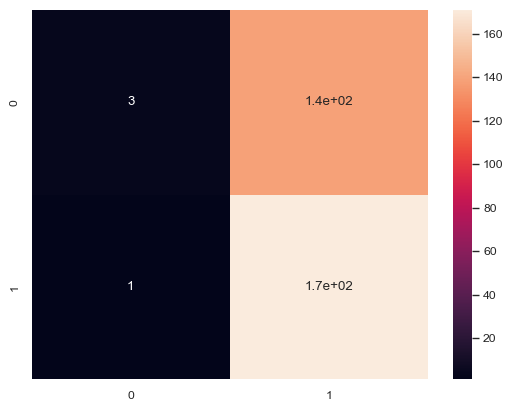

Negative AUC:  0.7056993121519817


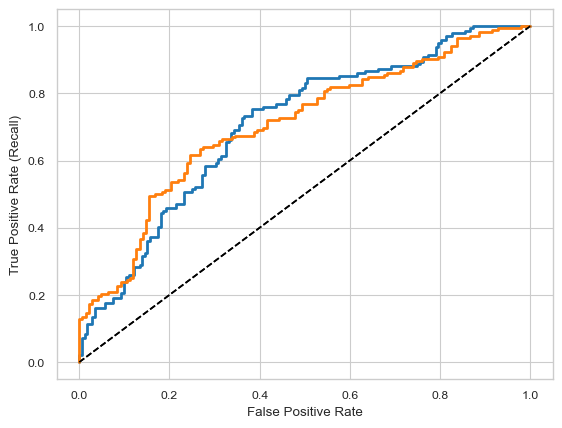

Positive AUC:  0.7056993121519817


53.13496280552603

In [202]:
print('Just Adj Close Feature')
alg(X_goog, y_goog, X_train_googb, X_test_googb, y_train_googb, y_test_googb, svm)
print()
print('Adj Close, Open, High, Low Features')
alg(X_goog, y_goog, X_train_googc, X_test_googc, y_train_googc, y_test_googc, svm)

##### Googl

Just Adj Close Feature
Sensitivity :  52.112676056338024
Specificity :  52.674897119341566
Accuracy Score:  51.59235668789809


              precision    recall  f1-score   support

    Negative       0.43      0.12      0.19       440
    Positive       0.53      0.86      0.66       502

    accuracy                           0.52       942
   macro avg       0.48      0.49      0.42       942
weighted avg       0.48      0.52      0.44       942



Average of 10 cross validation of the accuracy score:  80.67365079365078


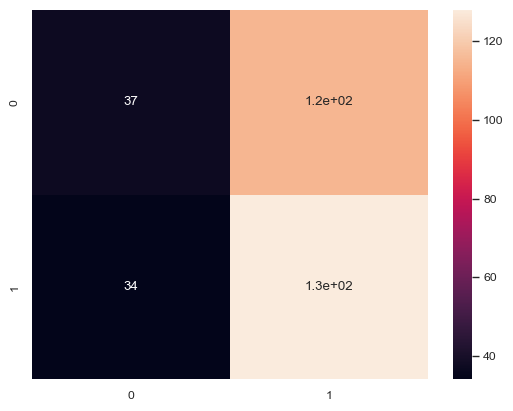

Negative AUC:  0.4739684860298895


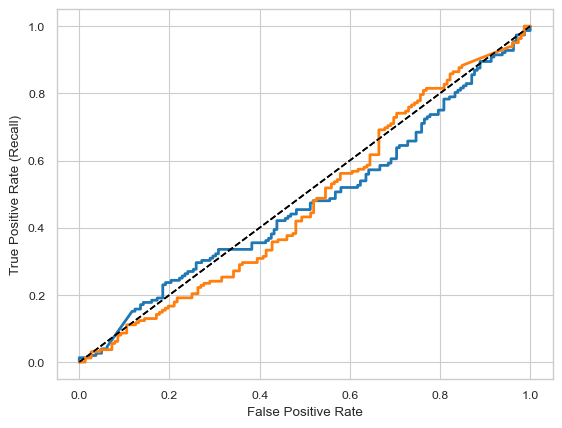

Positive AUC:  0.4739684860298895

Adj Close, Open, High, Low Features
Sensitivity :  75.0
Specificity :  52.64900662251656
Accuracy Score:  51.48619957537155


              precision    recall  f1-score   support

    Negative       0.44      0.13      0.20       440
    Positive       0.53      0.85      0.65       502

    accuracy                           0.51       942
   macro avg       0.48      0.49      0.43       942
weighted avg       0.48      0.51      0.44       942



Average of 10 cross validation of the accuracy score:  80.67365079365078


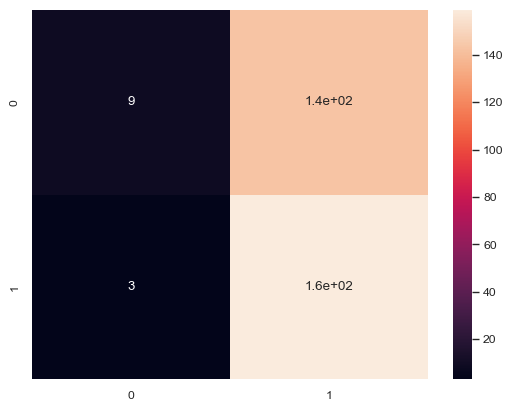

Negative AUC:  0.63182261208577


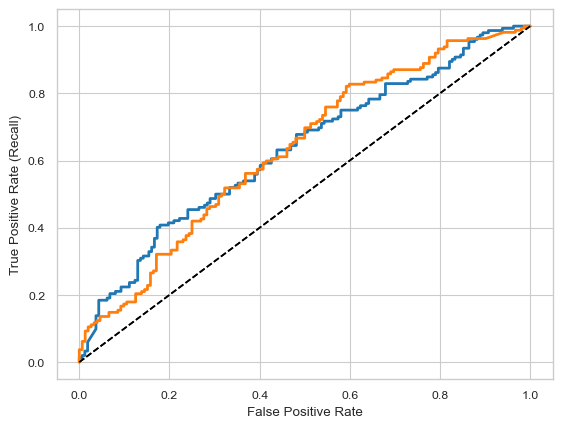

Positive AUC:  0.63182261208577


51.48619957537155

In [203]:
print('Just Adj Close Feature')
alg(X_googl, y_googl, X_train_googlb, X_test_googlb, y_train_googlb, y_test_googlb, svm)
print()
print('Adj Close, Open, High, Low Features')
alg(X_googl, y_googl, X_train_googlc, X_test_googlc, y_train_googlc, y_test_googlc, svm)

#### Gradient Boosting Classifier

In [204]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=5, learning_rate=1.0, max_depth=1, random_state=0)

##### Apple

Just Adj Close Feature
Sensitivity :  55.4140127388535
Specificity :  55.4140127388535
Accuracy Score:  56.48936170212766


              precision    recall  f1-score   support

    Negative       0.53      0.37      0.44       430
    Positive       0.58      0.73      0.64       510

    accuracy                           0.56       940
   macro avg       0.56      0.55      0.54       940
weighted avg       0.56      0.56      0.55       940



Average of 10 cross validation of the accuracy score:  100.0


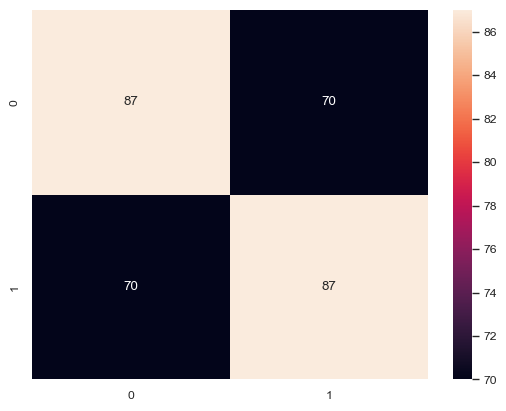

Negative AUC:  0.5435514625339771


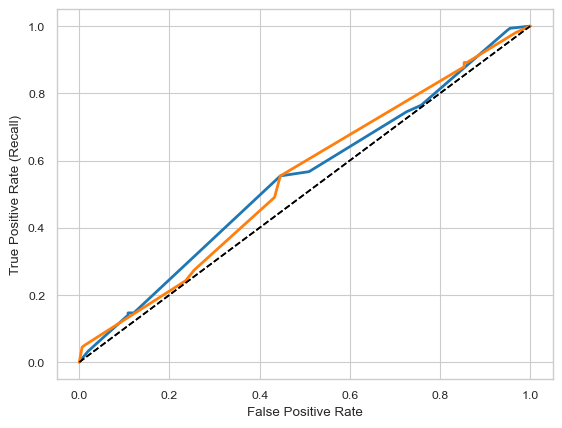

Positive AUC:  0.543551462533977

Adj Close, Open, High, Low Features
Sensitivity :  54.268292682926834
Specificity :  54.666666666666664
Accuracy Score:  55.53191489361702


              precision    recall  f1-score   support

    Negative       0.52      0.31      0.39       430
    Positive       0.57      0.76      0.65       510

    accuracy                           0.56       940
   macro avg       0.55      0.54      0.52       940
weighted avg       0.55      0.56      0.53       940



Average of 10 cross validation of the accuracy score:  100.0


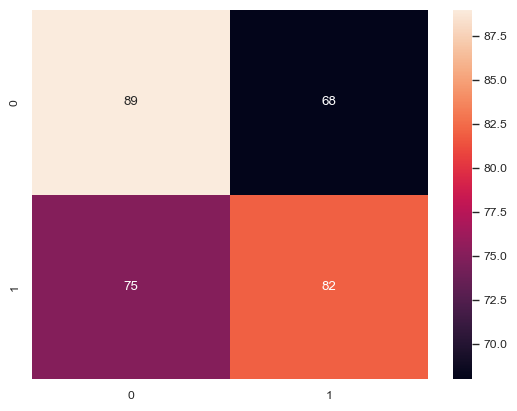

Negative AUC:  0.5408535843239076


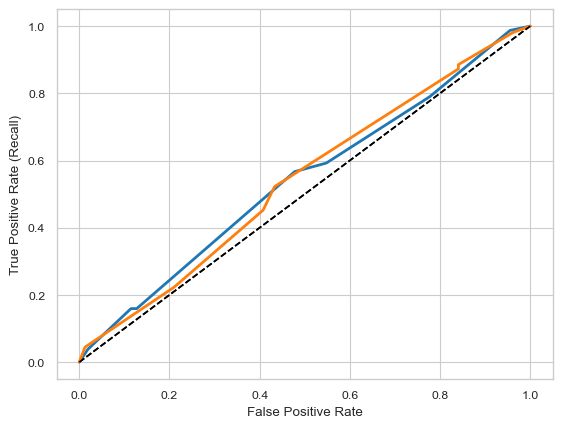

Positive AUC:  0.5408535843239076


55.53191489361702

In [205]:
print('Just Adj Close Feature')
alg(X_appl, y_appl, X_train_applb, X_test_applb, y_train_applb, y_test_applb, gbc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_appl, y_appl, X_train_applc, X_test_applc, y_train_applc, y_test_applc, gbc)

##### Tesla

Just Adj Close Feature
Sensitivity :  51.2
Specificity :  60.84656084656085
Accuracy Score:  54.45859872611465


              precision    recall  f1-score   support

    Negative       0.54      0.71      0.62       483
    Positive       0.55      0.37      0.44       459

    accuracy                           0.54       942
   macro avg       0.55      0.54      0.53       942
weighted avg       0.55      0.54      0.53       942



Average of 10 cross validation of the accuracy score:  100.0


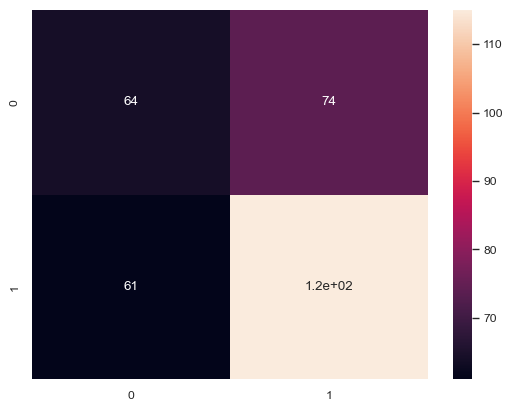

Negative AUC:  0.598917160737813


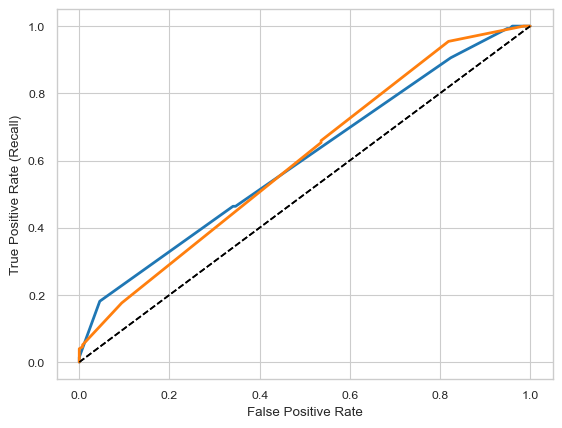

Positive AUC:  0.598917160737813

Adj Close, Open, High, Low Features
Sensitivity :  46.236559139784944
Specificity :  57.01357466063348
Accuracy Score:  55.20169851380042


              precision    recall  f1-score   support

    Negative       0.55      0.73      0.63       483
    Positive       0.56      0.36      0.44       459

    accuracy                           0.55       942
   macro avg       0.55      0.55      0.53       942
weighted avg       0.55      0.55      0.54       942



Average of 10 cross validation of the accuracy score:  100.0


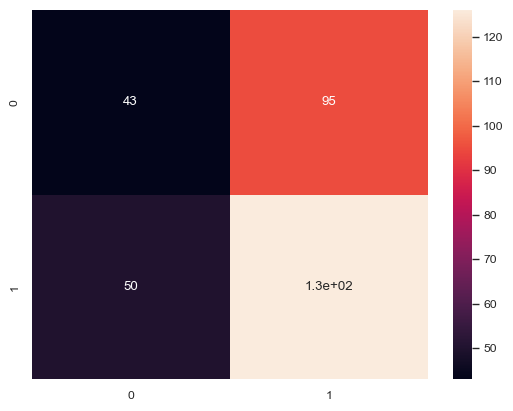

Negative AUC:  0.5346261528326746


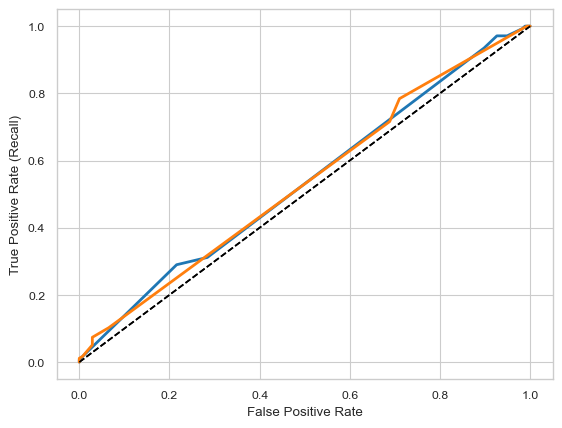

Positive AUC:  0.5346261528326747


55.20169851380042

In [206]:
print('Just Adj Close Feature')
alg(X_tsla, y_tsla, X_train_tslab, X_test_tslab, y_train_tslab, y_test_tslab, gbc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_tsla, y_tsla, X_train_tslac, X_test_tslac, y_train_tslac, y_test_tslac, gbc)


##### Amazon

Just Adj Close Feature
Sensitivity :  46.808510638297875
Specificity :  56.55430711610487
Accuracy Score:  50.424628450106155


              precision    recall  f1-score   support

    Negative       0.44      0.35      0.39       428
    Positive       0.54      0.64      0.58       514

    accuracy                           0.50       942
   macro avg       0.49      0.49      0.49       942
weighted avg       0.49      0.50      0.49       942



Average of 10 cross validation of the accuracy score:  99.92000000000002


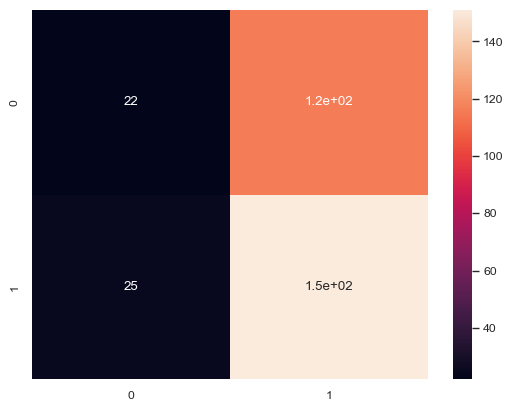

Negative AUC:  0.535449604743083


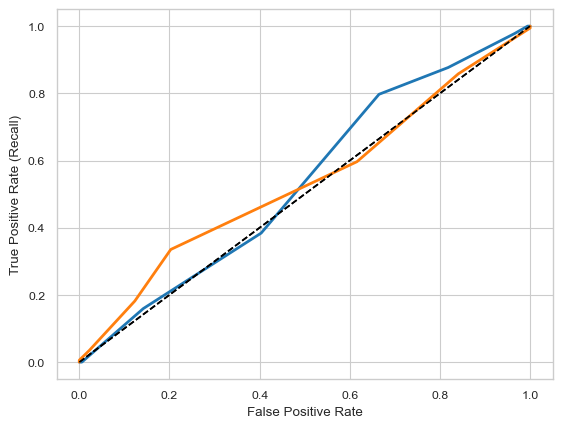

Positive AUC:  0.535449604743083

Adj Close, Open, High, Low Features
Sensitivity :  49.166666666666664
Specificity :  59.27835051546392
Accuracy Score:  52.22929936305732


              precision    recall  f1-score   support

    Negative       0.46      0.32      0.38       428
    Positive       0.55      0.69      0.61       514

    accuracy                           0.52       942
   macro avg       0.51      0.51      0.49       942
weighted avg       0.51      0.52      0.51       942



Average of 10 cross validation of the accuracy score:  99.92000000000002


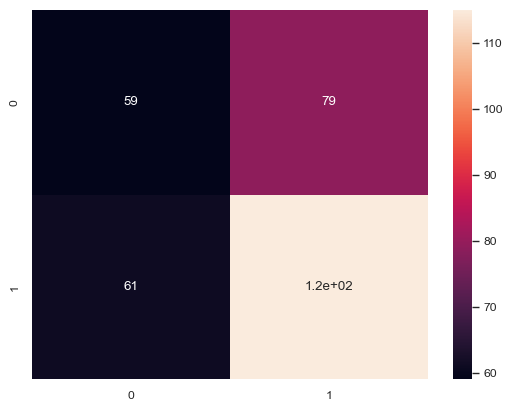

Negative AUC:  0.5289237483530962


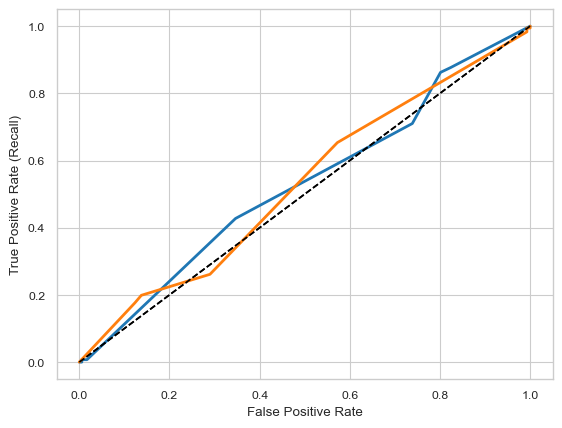

Positive AUC:  0.5289237483530961


52.22929936305732

In [207]:
print('Just Adj Close Feature')
alg(X_amzn, y_amzn, X_train_amznb, X_test_amznb, y_train_amznb, y_test_amznb, gbc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_amzn, y_amzn, X_train_amznc, X_test_amznc, y_train_amznc, y_test_amznc, gbc)


##### Goog

Just Adj Close Feature
Sensitivity :  44.5945945945946
Specificity :  54.58333333333333
Accuracy Score:  49.734325185972374


              precision    recall  f1-score   support

    Negative       0.44      0.20      0.28       449
    Positive       0.51      0.76      0.61       492

    accuracy                           0.50       941
   macro avg       0.48      0.48      0.45       941
weighted avg       0.48      0.50      0.45       941



Average of 10 cross validation of the accuracy score:  100.0


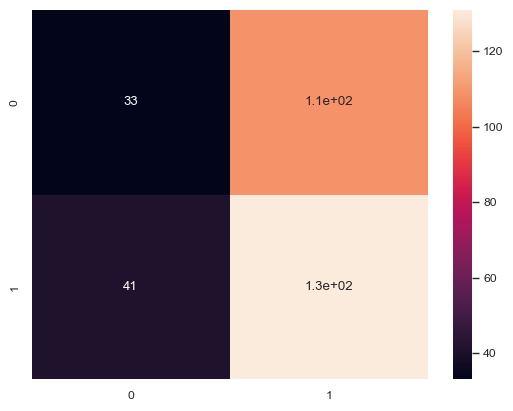

Negative AUC:  0.49809613494923033


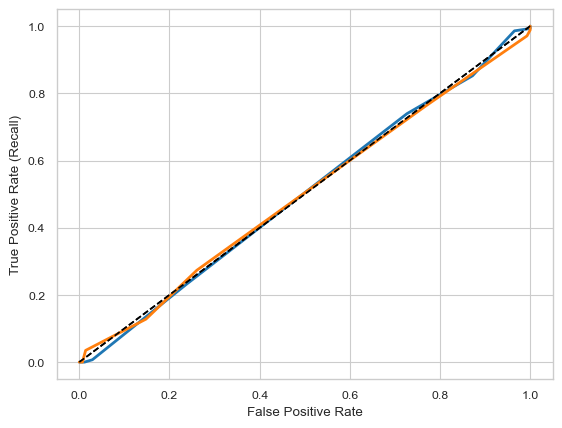

Positive AUC:  0.4980961349492303

Adj Close, Open, High, Low Features
Sensitivity :  45.97701149425287
Specificity :  55.06607929515418
Accuracy Score:  48.14027630180659


              precision    recall  f1-score   support

    Negative       0.44      0.35      0.39       449
    Positive       0.50      0.61      0.55       492

    accuracy                           0.48       941
   macro avg       0.47      0.48      0.47       941
weighted avg       0.48      0.48      0.47       941



Average of 10 cross validation of the accuracy score:  100.0


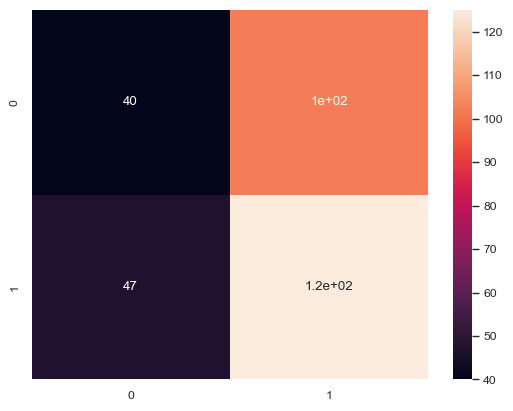

Negative AUC:  0.5035825417622012


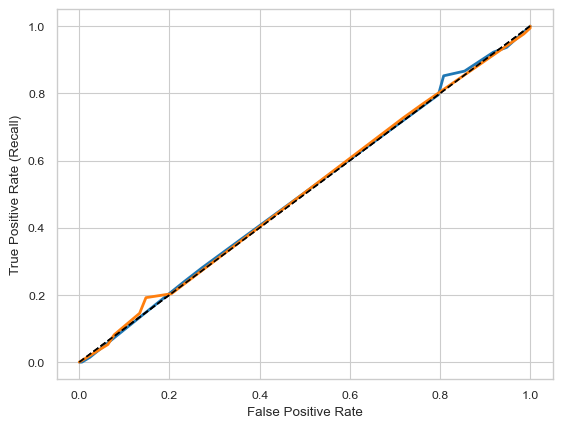

Positive AUC:  0.5035825417622011


48.14027630180659

In [208]:
print('Just Adj Close Feature')
alg(X_goog, y_goog, X_train_googb, X_test_googb, y_train_googb, y_test_googb, gbc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_goog, y_goog, X_train_googc, X_test_googc, y_train_googc, y_test_googc, gbc)

##### Googl

Just Adj Close Feature
Sensitivity :  60.0
Specificity :  53.53159851301115
Accuracy Score:  53.71549893842887


              precision    recall  f1-score   support

    Negative       0.51      0.24      0.33       440
    Positive       0.54      0.80      0.65       502

    accuracy                           0.54       942
   macro avg       0.53      0.52      0.49       942
weighted avg       0.53      0.54      0.50       942



Average of 10 cross validation of the accuracy score:  99.92063492063492


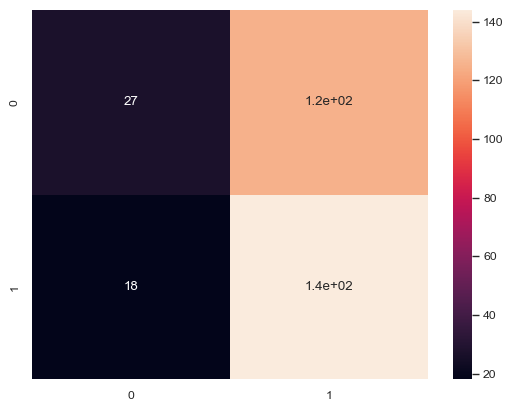

Negative AUC:  0.5406513970110461


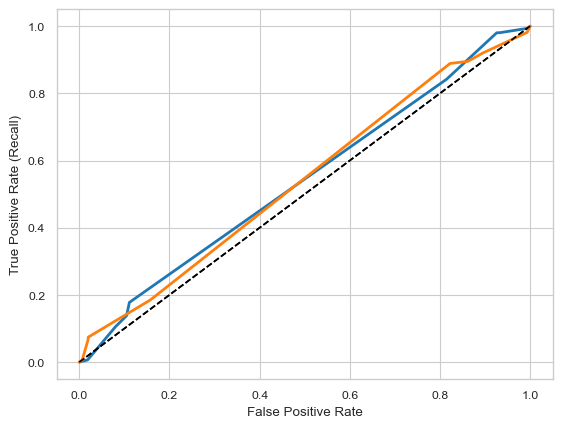

Positive AUC:  0.5406513970110461

Adj Close, Open, High, Low Features
Sensitivity :  58.333333333333336
Specificity :  52.87769784172662
Accuracy Score:  54.03397027600849


              precision    recall  f1-score   support

    Negative       0.52      0.22      0.31       440
    Positive       0.55      0.82      0.66       502

    accuracy                           0.54       942
   macro avg       0.53      0.52      0.48       942
weighted avg       0.53      0.54      0.49       942



Average of 10 cross validation of the accuracy score:  99.92063492063492


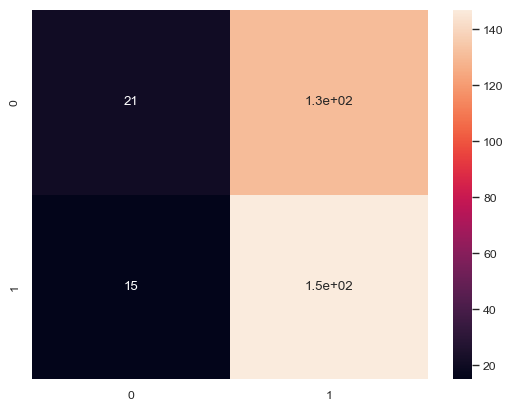

Negative AUC:  0.5399204028589994


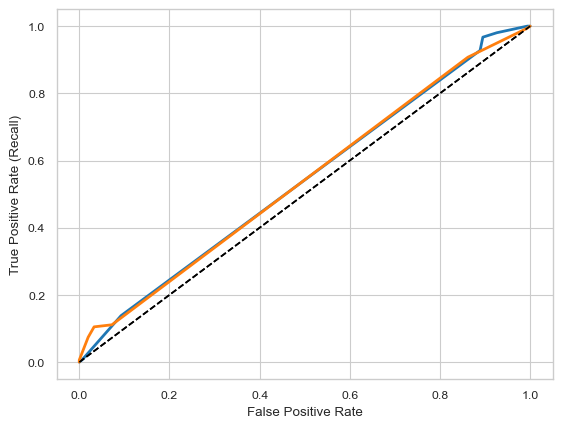

Positive AUC:  0.5399204028589994


54.03397027600849

In [209]:
print('Just Adj Close Feature')
alg(X_googl, y_googl, X_train_googlb, X_test_googlb, y_train_googlb, y_test_googlb, gbc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_googl, y_googl, X_train_googlc, X_test_googlc, y_train_googlc, y_test_googlc, gbc)


#### Random Forest Classifier

In [210]:
rfc = RandomForestClassifier(n_estimators=3, random_state=0)

##### Apple

Just Adj Close Feature
Sensitivity :  53.02013422818792
Specificity :  52.72727272727272
Accuracy Score:  51.59574468085106


              precision    recall  f1-score   support

    Negative       0.47      0.50      0.48       430
    Positive       0.56      0.53      0.54       510

    accuracy                           0.52       940
   macro avg       0.51      0.51      0.51       940
weighted avg       0.52      0.52      0.52       940



Average of 10 cross validation of the accuracy score:  99.36317460317461


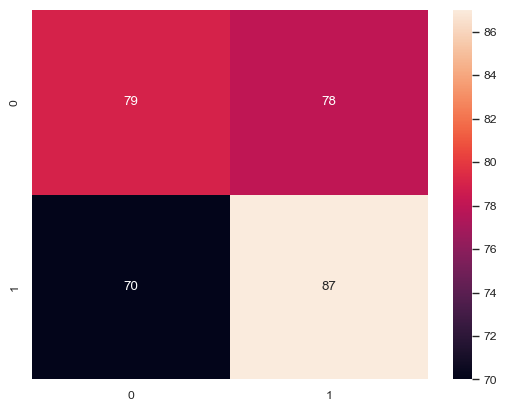

Negative AUC:  0.5271816300864133


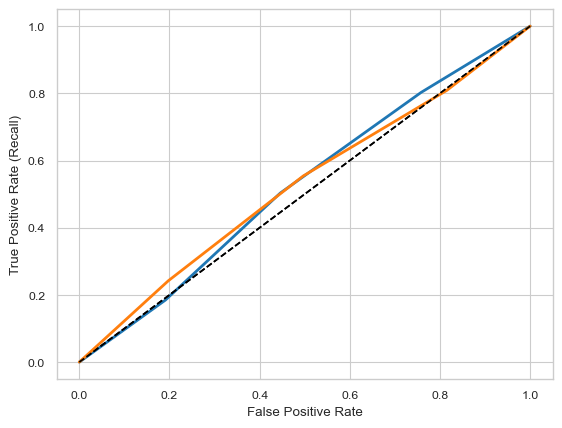

Positive AUC:  0.5271816300864132

Adj Close, Open, High, Low Features
Sensitivity :  54.3046357615894
Specificity :  53.987730061349694
Accuracy Score:  55.638297872340424


              precision    recall  f1-score   support

    Negative       0.51      0.54      0.53       430
    Positive       0.60      0.57      0.58       510

    accuracy                           0.56       940
   macro avg       0.55      0.56      0.55       940
weighted avg       0.56      0.56      0.56       940



Average of 10 cross validation of the accuracy score:  99.36317460317461


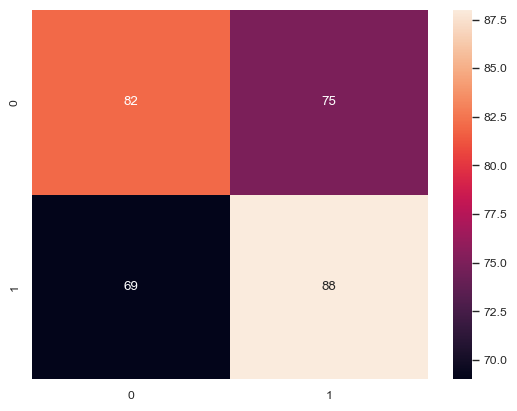

Negative AUC:  0.5403870339567528


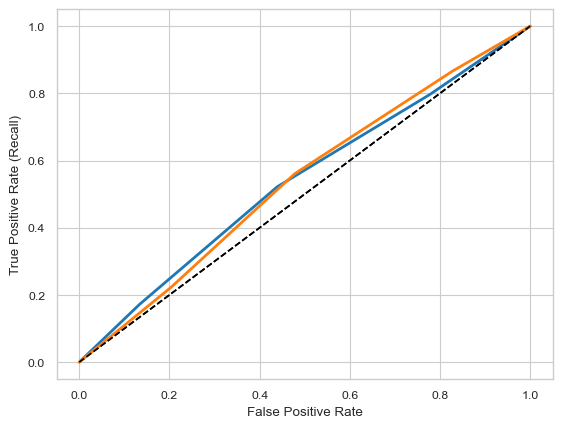

Positive AUC:  0.5403870339567528


55.638297872340424

In [211]:
print('Just Adj Close Feature')
alg(X_appl, y_appl, X_train_applb, X_test_applb, y_train_applb, y_test_applb, rfc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_appl, y_appl, X_train_applc, X_test_applc, y_train_applc, y_test_applc, rfc)

##### Tesla

Just Adj Close Feature
Sensitivity :  45.20547945205479
Specificity :  57.14285714285714
Accuracy Score:  50.955414012738856


              precision    recall  f1-score   support

    Negative       0.52      0.52      0.52       483
    Positive       0.50      0.49      0.50       459

    accuracy                           0.51       942
   macro avg       0.51      0.51      0.51       942
weighted avg       0.51      0.51      0.51       942



Average of 10 cross validation of the accuracy score:  98.80698412698415


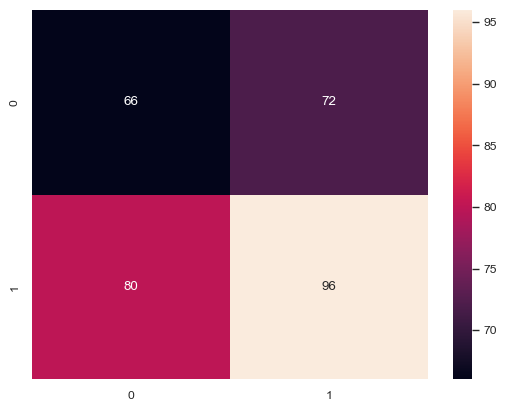

Negative AUC:  0.5003705533596838


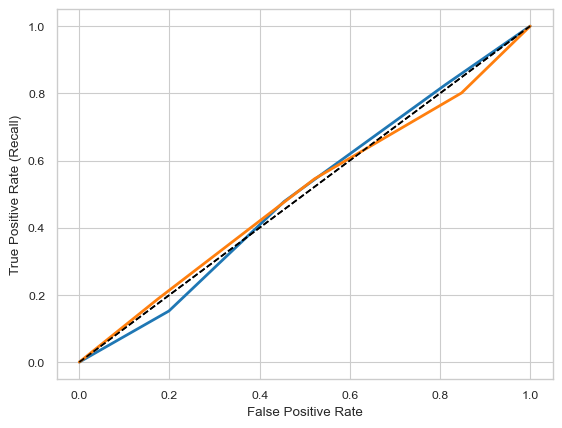

Positive AUC:  0.5003705533596838

Adj Close, Open, High, Low Features
Sensitivity :  64.13793103448275
Specificity :  73.37278106508876
Accuracy Score:  65.49893842887474


              precision    recall  f1-score   support

    Negative       0.66      0.69      0.67       483
    Positive       0.65      0.62      0.64       459

    accuracy                           0.65       942
   macro avg       0.65      0.65      0.65       942
weighted avg       0.65      0.65      0.65       942



Average of 10 cross validation of the accuracy score:  98.80698412698415


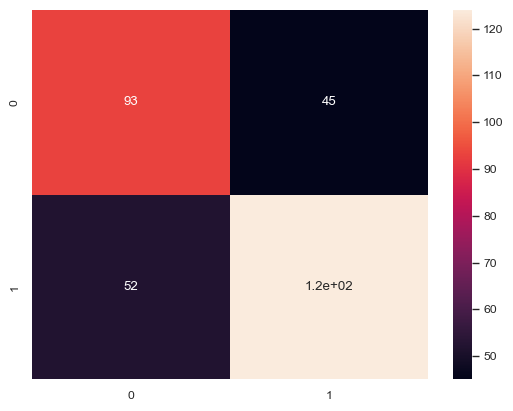

Negative AUC:  0.7483736824769434


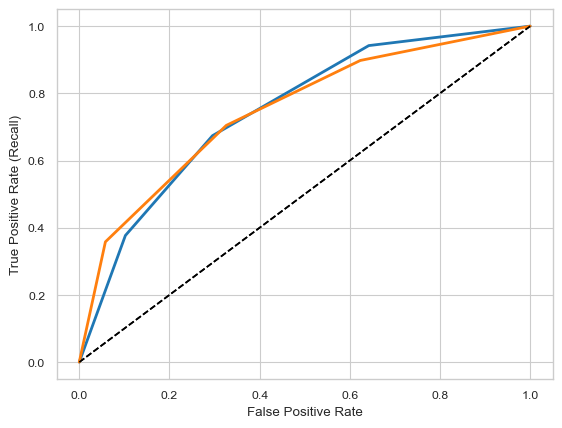

Positive AUC:  0.7483736824769434


65.49893842887474

In [212]:
print('Just Adj Close Feature')
alg(X_tsla, y_tsla, X_train_tslab, X_test_tslab, y_train_tslab, y_test_tslab, rfc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_tsla, y_tsla, X_train_tslac, X_test_tslac, y_train_tslac, y_test_tslac, rfc)


##### Amazon

Just Adj Close Feature
Sensitivity :  41.42857142857143
Specificity :  54.02298850574713
Accuracy Score:  51.69851380042463


              precision    recall  f1-score   support

    Negative       0.47      0.44      0.45       428
    Positive       0.55      0.58      0.57       514

    accuracy                           0.52       942
   macro avg       0.51      0.51      0.51       942
weighted avg       0.51      0.52      0.52       942



Average of 10 cross validation of the accuracy score:  95.78857142857143


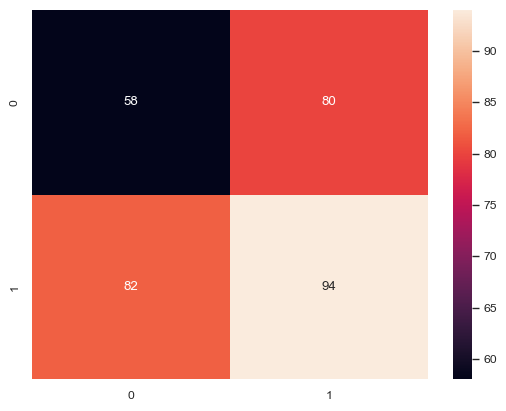

Negative AUC:  0.47167325428194995


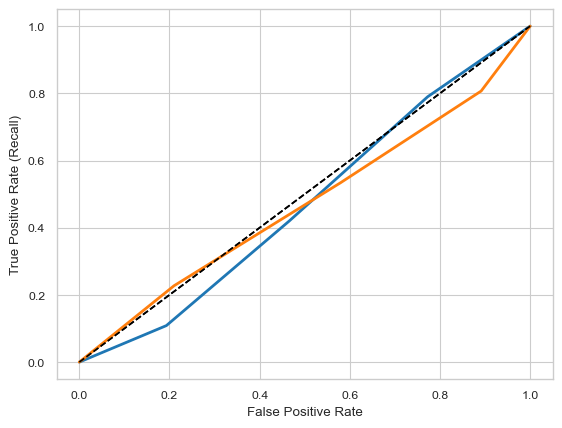

Positive AUC:  0.47167325428194995

Adj Close, Open, High, Low Features
Sensitivity :  51.96850393700787
Specificity :  61.49732620320856
Accuracy Score:  53.92781316348195


              precision    recall  f1-score   support

    Negative       0.49      0.46      0.48       428
    Positive       0.57      0.61      0.59       514

    accuracy                           0.54       942
   macro avg       0.53      0.53      0.53       942
weighted avg       0.54      0.54      0.54       942



Average of 10 cross validation of the accuracy score:  95.78857142857143


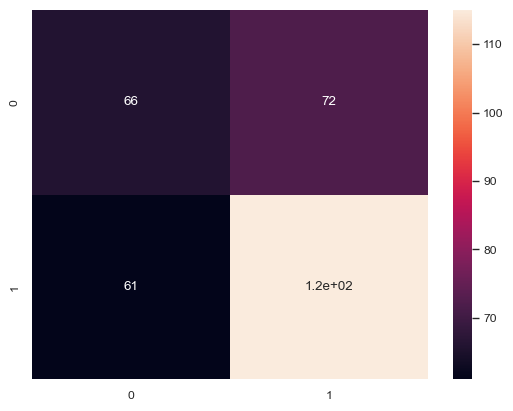

Negative AUC:  0.5946969696969697


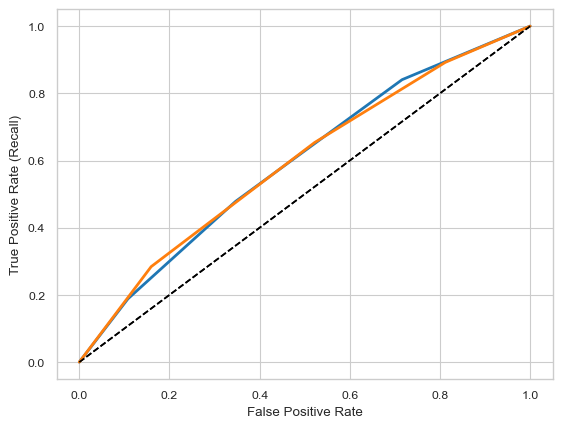

Positive AUC:  0.5946969696969697


53.92781316348195

In [213]:
print('Just Adj Close Feature')
alg(X_amzn, y_amzn, X_train_amznb, X_test_amznb, y_train_amznb, y_test_amznb, rfc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_amzn, y_amzn, X_train_amznc, X_test_amznc, y_train_amznc, y_test_amznc, rfc)


##### Goog

Just Adj Close Feature
Sensitivity :  48.10126582278481
Specificity :  57.692307692307686
Accuracy Score:  48.88416578108396


              precision    recall  f1-score   support

    Negative       0.46      0.46      0.46       449
    Positive       0.51      0.52      0.51       492

    accuracy                           0.49       941
   macro avg       0.49      0.49      0.49       941
weighted avg       0.49      0.49      0.49       941



Average of 10 cross validation of the accuracy score:  99.20253968253967


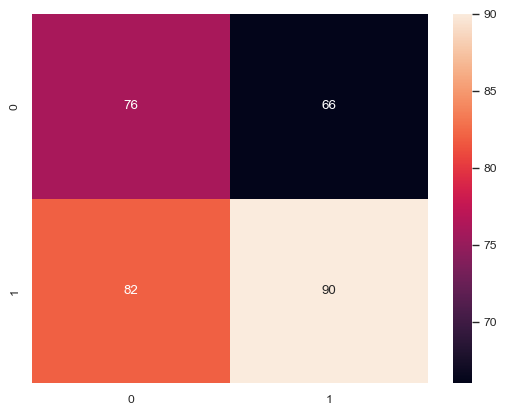

Negative AUC:  0.5220275139207338


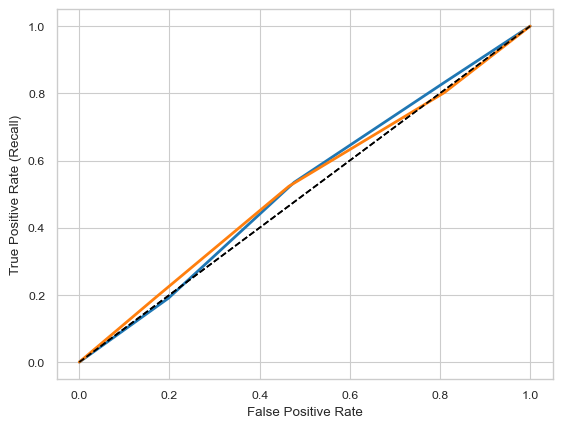

Positive AUC:  0.5220275139207338

Adj Close, Open, High, Low Features
Sensitivity :  56.32183908045977
Specificity :  68.57142857142857
Accuracy Score:  58.87353878852285


              precision    recall  f1-score   support

    Negative       0.57      0.57      0.57       449
    Positive       0.61      0.60      0.61       492

    accuracy                           0.59       941
   macro avg       0.59      0.59      0.59       941
weighted avg       0.59      0.59      0.59       941



Average of 10 cross validation of the accuracy score:  99.20253968253967


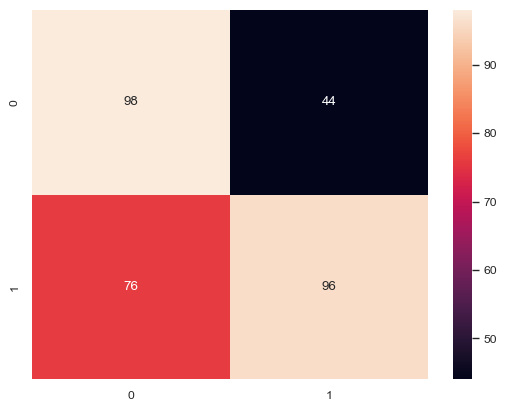

Negative AUC:  0.6622993776613166


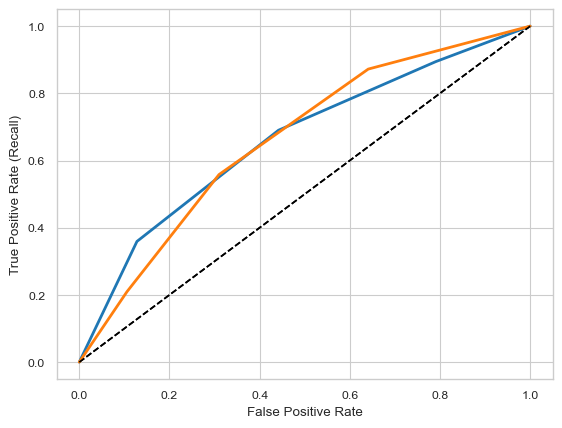

Positive AUC:  0.6622993776613166


58.87353878852285

In [214]:
print('Just Adj Close Feature')
alg(X_goog, y_goog, X_train_googb, X_test_googb, y_train_googb, y_test_googb, rfc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_goog, y_goog, X_train_googc, X_test_googc, y_train_googc, y_test_googc, rfc)

Googl

Just Adj Close Feature
Sensitivity :  43.38235294117647
Specificity :  47.752808988764045
Accuracy Score:  53.71549893842887


              precision    recall  f1-score   support

    Negative       0.50      0.51      0.51       440
    Positive       0.57      0.56      0.56       502

    accuracy                           0.54       942
   macro avg       0.54      0.54      0.54       942
weighted avg       0.54      0.54      0.54       942



Average of 10 cross validation of the accuracy score:  98.80507936507937


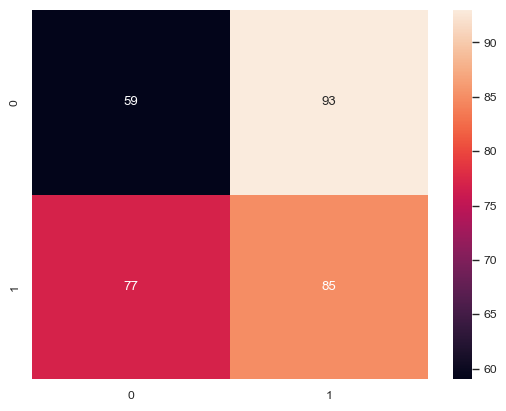

Negative AUC:  0.46584632878492527


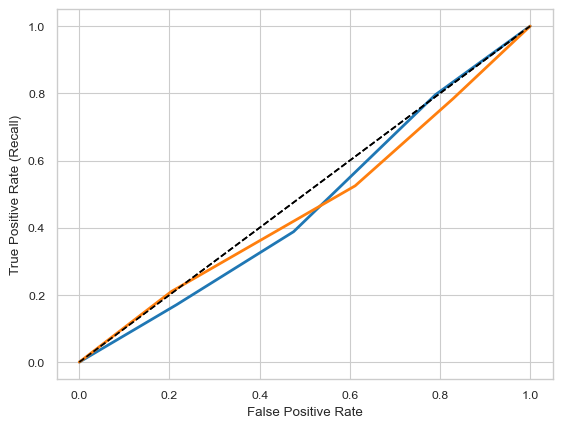

Positive AUC:  0.46584632878492527

Adj Close, Open, High, Low Features
Sensitivity :  59.74842767295597
Specificity :  63.2258064516129
Accuracy Score:  60.72186836518046


              precision    recall  f1-score   support

    Negative       0.58      0.57      0.57       440
    Positive       0.63      0.64      0.64       502

    accuracy                           0.61       942
   macro avg       0.61      0.60      0.60       942
weighted avg       0.61      0.61      0.61       942



Average of 10 cross validation of the accuracy score:  98.80507936507937


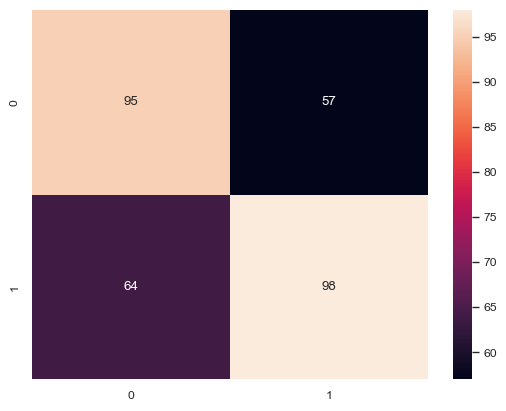

Negative AUC:  0.6533057179987005


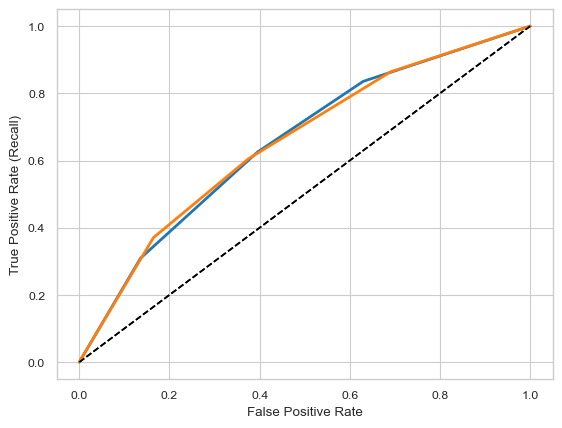

Positive AUC:  0.6533057179987004


60.72186836518046

In [215]:
print('Just Adj Close Feature')
alg(X_googl, y_googl, X_train_googlb, X_test_googlb, y_train_googlb, y_test_googlb, rfc)
print()
print('Adj Close, Open, High, Low Features')
alg(X_googl, y_googl, X_train_googlc, X_test_googlc, y_train_googlc, y_test_googlc, rfc)
